# Dane techniczne sprzƒôtu

Obliczenia zosta≈Çy wykonane na komputerze o nastƒôpujƒÖcych parametrach:

- Procesor: AMD Ryzen $7$ $4700$U ($8$ rdzeni, $8$ wƒÖtk√≥w),

- Pamiƒôƒá RAM: $16$ GB $3200$ MHz

# Biblioteki

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import random
import time
from math import sqrt

In [2]:
sns.set(rc={"figure.dpi": 200, 'savefig.dpi': 200})

# Pomocnicze funkcje

## Obliczenia

### Budowanie macierzy wype≈Çnionej zgodnie ze wzorem

#### Macierz kwadratowa

In [3]:
def create_matrix(fn, n, m, dtype=np.float64):
    A = np.empty((n, m), dtype)
    
    for i in range(n):
        for j in range(m):
            A[i, j] = fn(i + 1, j + 1)
            
    return A

### Tworzenie wektor√≥w

#### Tworzenie wektora wype≈Çnionego warto≈õciami zgodnie z zadanƒÖ funkcjƒÖ

In [4]:
def create_vector(fn, n, dtype=np.float64):
    return np.array([fn(i) for i in range(n)], dtype)

### Pomiar czasu wykonywania kodu

#### Dekorator, pozwalajƒÖcy na pomiar czasu wykonania kodu

In [5]:
def print_duration(sec):
    t = int(sec)
    ms = int((sec - t) * 1000)
    s = t % 60
    t //= 60
    m = t % 60
    t //= 60
    print(f'≈ÅƒÖczny czas wykonania: {t:>02}:{m:>02}:{s:>02}.{ms:<03}')

def timed(*, save_fn=None, save_dict=None):
    def decorator(fn):
        def inner(*args, **kwargs):
            start_time = time.perf_counter()
            res = fn(*args, **kwargs)
            duration = time.perf_counter() - start_time
    
            if save_dict is not None and save_fn: 
                save_dict[save_fn(*args, **kwargs)] = duration
            return res
        
        return inner
    return decorator

## Tworzenie wykres√≥w

### Tworzenie wykresu *Heatmap*

In [6]:
def show_heatmap(df, annot=True, norm=None, xlabel='x', ylabel='y', title='', **kwargs):
    ax = plt.figure(figsize=(15, 10))
    s = sns.heatmap(df, cmap="YlGnBu", annot=annot, norm=norm, mask=df.isnull(), **kwargs)
    s.set_xlabel(xlabel, fontsize=16)
    s.set_ylabel(ylabel, fontsize=16)
    plt.title(title, fontsize=20, y=1.025)
    plt.show()

# Wstƒôp

Dany jest uk≈Çad r√≥wna≈Ñ liniowych $Ax=b$. 

Elementy macierzy $A$ sƒÖ zadane wzorem ($m,k$ - parametry zadania podane indywidualnie):

$
\begin{cases} 
    a_{i, i} = k \\ 
    a_{i, j} = (-1)^j \frac{m}{j} & dla & j > 1 \\
    a_{i, i-1} = \frac{m}{i} \\
    a_{i, j} = 0 & dla & j < i - 1 \\
\end{cases}
$

gdzie $k=11, m=2$

Przyjmij wektor $x$ jako dowolnƒÖ n-elementowƒÖ permutacjƒô ze zbioru $\{1, -1\}$ i oblicz wektor $b$. 

## Implementacja funkcji wyznaczajƒÖcej elementy macierzy

In [7]:
k = 11
m = 2

def fn(i, j):
    if i == j: return k
    if j > i: return (-1)**j * m / j
    if j == i - 1: return m / i
    return 0

## Tworzenie macierzy $A$

Poni≈ºsza funkcja ma jedynie na celu u≈Çatwienie tworzenia macierzy $A$ (≈ºeby za ka≈ºdym razem nie trzeba by≈Ço przekazywaƒá wszystkich parametr√≥w).

In [8]:
create_A_matrix = lambda n, dtype=np.float64: create_matrix(fn, n, n, dtype)

###### Testy

In [9]:
create_A_matrix(5)

array([[11.        ,  1.        , -0.66666667,  0.5       , -0.4       ],
       [ 1.        , 11.        , -0.66666667,  0.5       , -0.4       ],
       [ 0.        ,  0.66666667, 11.        ,  0.5       , -0.4       ],
       [ 0.        ,  0.        ,  0.5       , 11.        , -0.4       ],
       [ 0.        ,  0.        ,  0.        ,  0.4       , 11.        ]])

## Wyznaczanie wektora $x$

Poniewa≈º, jako wektor $x$, bƒôdƒÖcy rozwiƒÖzaniem uk≈Çadu r√≥wna≈Ñ $Ax=b$, mo≈ºemy przyjƒÖƒá wektor o wsp√≥≈Çrzƒôdnych, bƒôdƒÖcych dowolnƒÖ $n$-elementowƒÖ permutacjƒÖ liczb ze zbioru $\{-1, 1\}$, przyjmujƒô, ≈ºe wektor $x$ bƒôdzie postaci $[-1, 1, -1, 1, ...]$ (na przemian bƒôdƒÖ wystƒôpowa≈Çy liczby $-1$ oraz $1$, rozpoczynajƒÖc siƒô od $-1$)

In [10]:
create_x_vector = lambda n, dtype=np.float64: create_vector(lambda i: (-1)**(i + 1), n, dtype)

###### Test

In [11]:
create_x_vector(5)

array([-1.,  1., -1.,  1., -1.])

## Obliczanie wektora $b$

Poniewa≈º nie znamy wektora $b$, w celu jego obliczenia dla danego $n$, konieczne jest najpierw wyznaczenie wektora $x$, kt√≥ry ma byƒá rozwiƒÖzaniem uk≈Çadu r√≥wna≈Ñ. Nastƒôpnie, korzystajƒÖc z tego wektora, nale≈ºy obliczyƒá wektor $b$. W p√≥≈∫niejszych obliczeniach bƒôdziemy ten wektor wykorzystywaƒá wraz z macierzƒÖ $A$ do obliczenia wektora $x$, po czym, por√≥wnamy warto≈õƒá obliczonego w ten spos√≥b wektora $x$ z warto≈õciƒÖ wektora $x$ wcze≈õniej przyjƒôtego jako rozwiƒÖzanie uk≈Çadu.

In [12]:
n = 5
A = create_A_matrix(n)
x_solution = create_x_vector(n, A.dtype)
b = A @ x_solution
b

array([ -8.43333333,  11.56666667,  -9.43333333,  10.9       ,
       -10.6       ])

# Zadanie 1

## Opis zadania

MetodƒÖ Jacobiego rozwiƒÖ≈º uk≈Çad r√≥wna≈Ñ liniowych $Ax=b$ (przyjmujƒÖc jako niewiadomƒÖ wektor $x$), 
przyjmujƒÖc kolejno kryterium stopu: 

- $||x^{(i+1)} - x^{(i)}|| < \rho$

- $||Ax^{(i)} - b|| < \rho$

Obliczenia wykonaj dla r√≥≈ºnych rozmiar√≥w uk≈Çadu $n$, dla r√≥≈ºnych wektor√≥w poczƒÖtkowych, a tak≈ºe 
r√≥≈ºnych warto≈õci $\rho$ w kryteriach stopu. (*Podaj, jak liczono normƒô.*) Wyznacz liczbƒô iteracji oraz 
sprawd≈∫ r√≥≈ºnicƒô w czasie oblicze≈Ñ dla obu kryteri√≥w stopu. 
Sprawd≈∫ dok≈Çadno≈õƒá oblicze≈Ñ. 

## Kryteria stopu

### Spos√≥b obliczania normy

Przy obliczaniu kryteri√≥w stopu, wykorzysta≈Çem normƒô euklidesowƒÖ. Skorzysta≈Çem z funkcji `linalg.norm` z biblioteki `numpy`, kt√≥ra domy≈õlnie oblicza normƒô euklidesowƒÖ. Wz√≥r, opisujƒÖcy spos√≥b obliczania normy euklidesowej, ma postaƒá:

$||x|| = \sqrt{\sum_{i}^{n} x_i^2}$

### Kryteria

#### Dekorator, u≈ÇatwiajƒÖcy korzystanie z kryteri√≥w

In [13]:
def apply_function_args(fn):
    def inner(**kwargs):
        arg_names = fn.__code__.co_varnames
        return fn(**{k: kwargs[k] for k in arg_names})
    return inner

#### 1. Kryterium

$||x^{(i+1)} - x^{(i)}|| < \rho$

In [14]:
@apply_function_args
def progressive_difference(x_curr, x_next, ùúå):
    return np.linalg.norm(x_next - x_curr) < ùúå

###### Test

In [15]:
progressive_difference(
    foo=12412312,  # @apply_function_args decorator ensures that redundant parameters will be filtered out
    x_curr=np.array([3, 3, 3]),
    x_next=np.array([1, 1, 1]),
    ùúå=5.1
)

True

#### 2. Kryterium

$||Ax^{(i)} - b|| < \rho$

In [16]:
@apply_function_args
def solution_difference(x_curr, A, b, ùúå):
    return np.linalg.norm(A @ x_curr - b) < ùúå

###### Test

In [17]:
solution_difference(
    x_curr=np.array([3, 3, 3]),
    A=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
    b=np.array([1, 1, 1]),
    ùúå=123
)

True

## Wyznaczanie b≈Çƒôd√≥w oblicze≈Ñ

### Norma maksimum

Do wyznaczania b≈Çƒôd√≥w ponownie wykorzysta≈Çem normƒô euklidesowƒÖ.

In [18]:
max_err = lambda x1, x2: np.linalg.norm(x1 - x2)

###### Test

In [19]:
max_err(np.array([2, 2, 2]), np.array([1, 1, 1]))

1.7320508075688772

## Metoda Jacobiego

Umieszczony poni≈ºej s≈Çownik s≈Çu≈ºy do zapisywania czas√≥w wykonywanych oblicze≈Ñ.

In [20]:
times = {}

### Implementacja

In [21]:
@timed(
    save_fn=lambda A, *args, **kwargs: len(A),
    save_dict=times
)
def jacobi(A, b, start_vector, *, stop_criterion=progressive_difference, ùúå=1e-6, dtype=np.float64, max_iters=1000):
    n = len(A)
    D = np.diag(A)
    R = A - np.diagflat(D)
    x_curr = start_vector
    iters = 0
    
    while iters < max_iters:
        x_next = (b - (R @ x_curr)) / D
        iters += 1
        if stop_criterion(A=A, b=b, x_next=x_next, x_curr=x_curr, ùúå=ùúå): break
        x_curr = x_next
    else:
        iters = -1
        
    return x_next, iters

###### Testy

Jak mo≈ºemy zauwa≈ºyƒá, wyb√≥r wektora poczƒÖtkowego ma znikome znaczenie

In [22]:
n = 10
A = create_A_matrix(n)
x_solution = create_x_vector(n)
b = A @ x_solution
x_start = np.array([0] * n)

x, iters = jacobi(A, b, x_start, stop_criterion=solution_difference)
x_start, x, iters

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([-0.99999999,  1.        , -1.        ,  1.        , -1.        ,
         1.        , -1.        ,  1.        , -1.        ,  1.        ]),
 8)

## RozwiƒÖzanie

In [23]:
times.clear()

### Pomocnicza funkcja

In [24]:
@timed(
    save_fn=lambda *args, **kwargs: 'total',
    save_dict=times
)
def calculate(n_list, ùúå_list, start_vector_fn, stop_criterion, dtype=np.float64, max_iters=1000, log_every=25):
    results = {}
    
    vectors = [[None] * len(ùúå_list) for _ in range(len(n_list))]  # Calculated vectors
    errors = np.empty((len(n_list), len(ùúå_list)), dtype)
    iters = np.empty((len(n_list), len(ùúå_list)), int)
    times_ = np.empty((len(n_list), len(ùúå_list)), dtype)
    
    for i, n in enumerate(n_list):
        A = create_A_matrix(n, dtype)
        x_start = create_vector(start_vector_fn, n)  # Initial x vector
        x_solution = create_x_vector(n, dtype)  # Expected solution
        b = A @ x_solution

        for j, ùúå in enumerate(ùúå_list):
            x, it = jacobi(A, b, x_start, stop_criterion=stop_criterion, ùúå=ùúå, dtype=dtype, max_iters=max_iters)
            if it >= 0:
                vectors[i][j] = x
                errors[i, j] = max_err(x, x_solution)
                iters[i, j] = it
                times_[i, j] = times[n]
            else:
                vectors[i][j] = np.nan
                errors[i, j] = np.nan
                iters[i, j] = -1
                times_[i, j] = np.nan
            
        if not (i + 1) % log_every:
            print(f'Obliczono uk≈Çady r√≥wna≈Ñ dla {i + 1} warto≈õci n')
            
    if (i + 1) % log_every:
        print(f'Obliczono uk≈Çady r√≥wna≈Ñ dla {i + 1} warto≈õci n')
        
    # Save results
    for key, data in zip(
        ('vectors', 'errors', 'iters', 'times'), 
        (vectors, errors, iters, times_)
    ):
        results[key] = pd.DataFrame(data, index=n_list, columns=ùúå_list)
            
    return results

###### Testy

In [25]:
n_list = [10, 25, 100]
start_vector_fn = lambda i: random.randint(-10e10, 10e10)
ùúå_list = [
    1e-5,
    1e-10,
    1e-15
]
stop_criterion = progressive_difference

results = calculate(n_list, ùúå_list, start_vector_fn, stop_criterion)

Obliczono uk≈Çady r√≥wna≈Ñ dla 3 warto≈õci n


In [26]:
results['iters']

1.000000e-05  1.000000e-10  1.000000e-15
10             17            21            26
25             16            21            26
100            17            21            26

In [27]:
results['errors']

1.000000e-05  1.000000e-10  1.000000e-15
10   1.096288e-07  7.480548e-12  3.330669e-16
25   1.007402e-06  6.230174e-12  5.874748e-16
100  1.048147e-07  7.141809e-12  1.518207e-15

In [28]:
results['times']

1.000000e-05  1.000000e-10  1.000000e-15
10       0.000375      0.000343      0.000542
25       0.000744      0.000500      0.000556
100      0.003046      0.003185      0.004325

In [29]:
results['vectors']

1.000000e-05  \
10   [-1.0000000874757546, 1.0000000457215035, -1.0...   
25   [-0.9999991966793664, 0.999999585526437, -0.99...   
100  [-0.9999999159490087, 0.9999999569890083, -0.9...   

                                          1.000000e-10  \
10   [-1.0000000000059766, 1.0000000000031208, -1.0...   
25   [-0.9999999999950205, 0.9999999999974182, -0.9...   
100  [-0.9999999999942961, 0.9999999999970256, -0.9...   

                                          1.000000e-15  
10   [-1.0, 1.0000000000000002, -1.0, 1.0, -1.0, 1....  
25   [-1.0000000000000002, 1.0, -1.0, 1.0, -1.00000...  
100  [-1.0000000000000002, 0.9999999999999999, -1.0...

### Dla ustalonego wektora poczƒÖtkowego oraz r√≥≈ºnych $n$ i r√≥≈ºnych $\rho$

W poni≈ºszych obliczeniach, jako wektor poczƒÖtkowy, przyjmujƒô wektor $n$-elementowy z≈Ço≈ºony z samych zer.

#### Dla 1. kryterium stopu

In [30]:
n_list = list(range(2, 501))
start_vector_fn = lambda _: 0
ùúå_list = [
    1e-1,
    1e-2,
    1e-3,
    1e-5,
    1e-10,
    1e-15
]
stop_criterion = progressive_difference

results1 = calculate(n_list, ùúå_list, start_vector_fn, stop_criterion)
print_duration(times['total'])

Obliczono uk≈Çady r√≥wna≈Ñ dla 25 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 50 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 75 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 100 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 125 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 150 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 175 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 200 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 225 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 250 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 275 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 300 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 325 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 350 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 375 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 400 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 425 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 450 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 475 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 499 warto≈õci n
≈ÅƒÖczny czas wykonania: 00:00:25.291


##### Liczby iteracji

Widzimy, ≈ºe liczba iteracji prawie siƒô nie zmienia, podczas zwiƒôkszania $n$, natomiast, zmniejszanie warto≈õci $\rho$ do≈õƒá znaczƒÖco wp≈Çywa na wzrost liczby iteracji.

In [31]:
df_iters1 = results1['iters']
df_iters1

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2               3             4             4             6            11   
3               3             4             5             6            11   
4               3             4             5             6            11   
5               3             4             5             6            11   
6               3             4             5             6            11   
..            ...           ...           ...           ...           ...   
496             4             4             5             7            11   
497             4             4             5             7            11   
498             4             4             5             7            11   
499             4             4             5             7            11   
500             4             4             5             7            11   

     1.000000e-15  
2              16  
3              16  
4              16  
5              16  
6              16  
..            ...  
496            16  
497            16  
498            16  
499            16  
500            16  

[499 rows x 6 columns]

In [32]:
min_n = 2
interval = 15
ns = [0, *range(interval - min_n, len(df_iters1), interval)]
if ns[-1] != len(df_iters1): ns.append(len(df_iters1) - 1)
df_iters1_part = df_iters1.iloc[ns]
df_iters1_part.to_excel('zad1-iters1-part.xlsx')
df_iters1_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2               3             4             4             6            11   
15              3             4             5             6            11   
30              3             4             5             6            11   
45              3             4             5             7            11   
60              3             4             5             7            11   
75              3             4             5             7            11   
90              3             4             5             7            11   
105             3             4             5             7            11   
120             3             4             5             7            11   
135             3             4             5             7            11   
150             3             4             5             7            11   
165             3             4             5             7            11   
180             3             4             5             7            11   
195             3             4             5             7            11   
210             3             4             5             7            11   
225             3             4             5             7            11   
240             3             4             5             7            11   
255             3             4             5             7            11   
270             3             4             5             7            11   
285             3             4             5             7            11   
300             3             4             5             7            11   
315             3             4             5             7            11   
330             3             4             5             7            11   
345             3             4             5             7            11   
360             3             4             5             7            11   
375             3             4             5             7            11   
390             3             4             5             7            11   
405             4             4             5             7            11   
420             4             4             5             7            11   
435             4             4             5             7            11   
450             4             4             5             7            11   
465             4             4             5             7            11   
480             4             4             5             7            11   
495             4             4             5             7            11   
500             4             4             5             7            11   

     1.000000e-15  
2              16  
15             16  
30             16  
45             16  
60             16  
75             16  
90             16  
105            16  
120            16  
135            16  
150            16  
165            16  
180            16  
195            16  
210            16  
225            16  
240            16  
255            16  
270            16  
285            16  
300            16  
315            16  
330            16  
345            16  
360            16  
375            16  
390            16  
405            16  
420            16  
435            16  
450            16  
465            16  
480            16  
495            16  
500            16

Bardzo dobrze pokazuje to poni≈ºszy wykres.

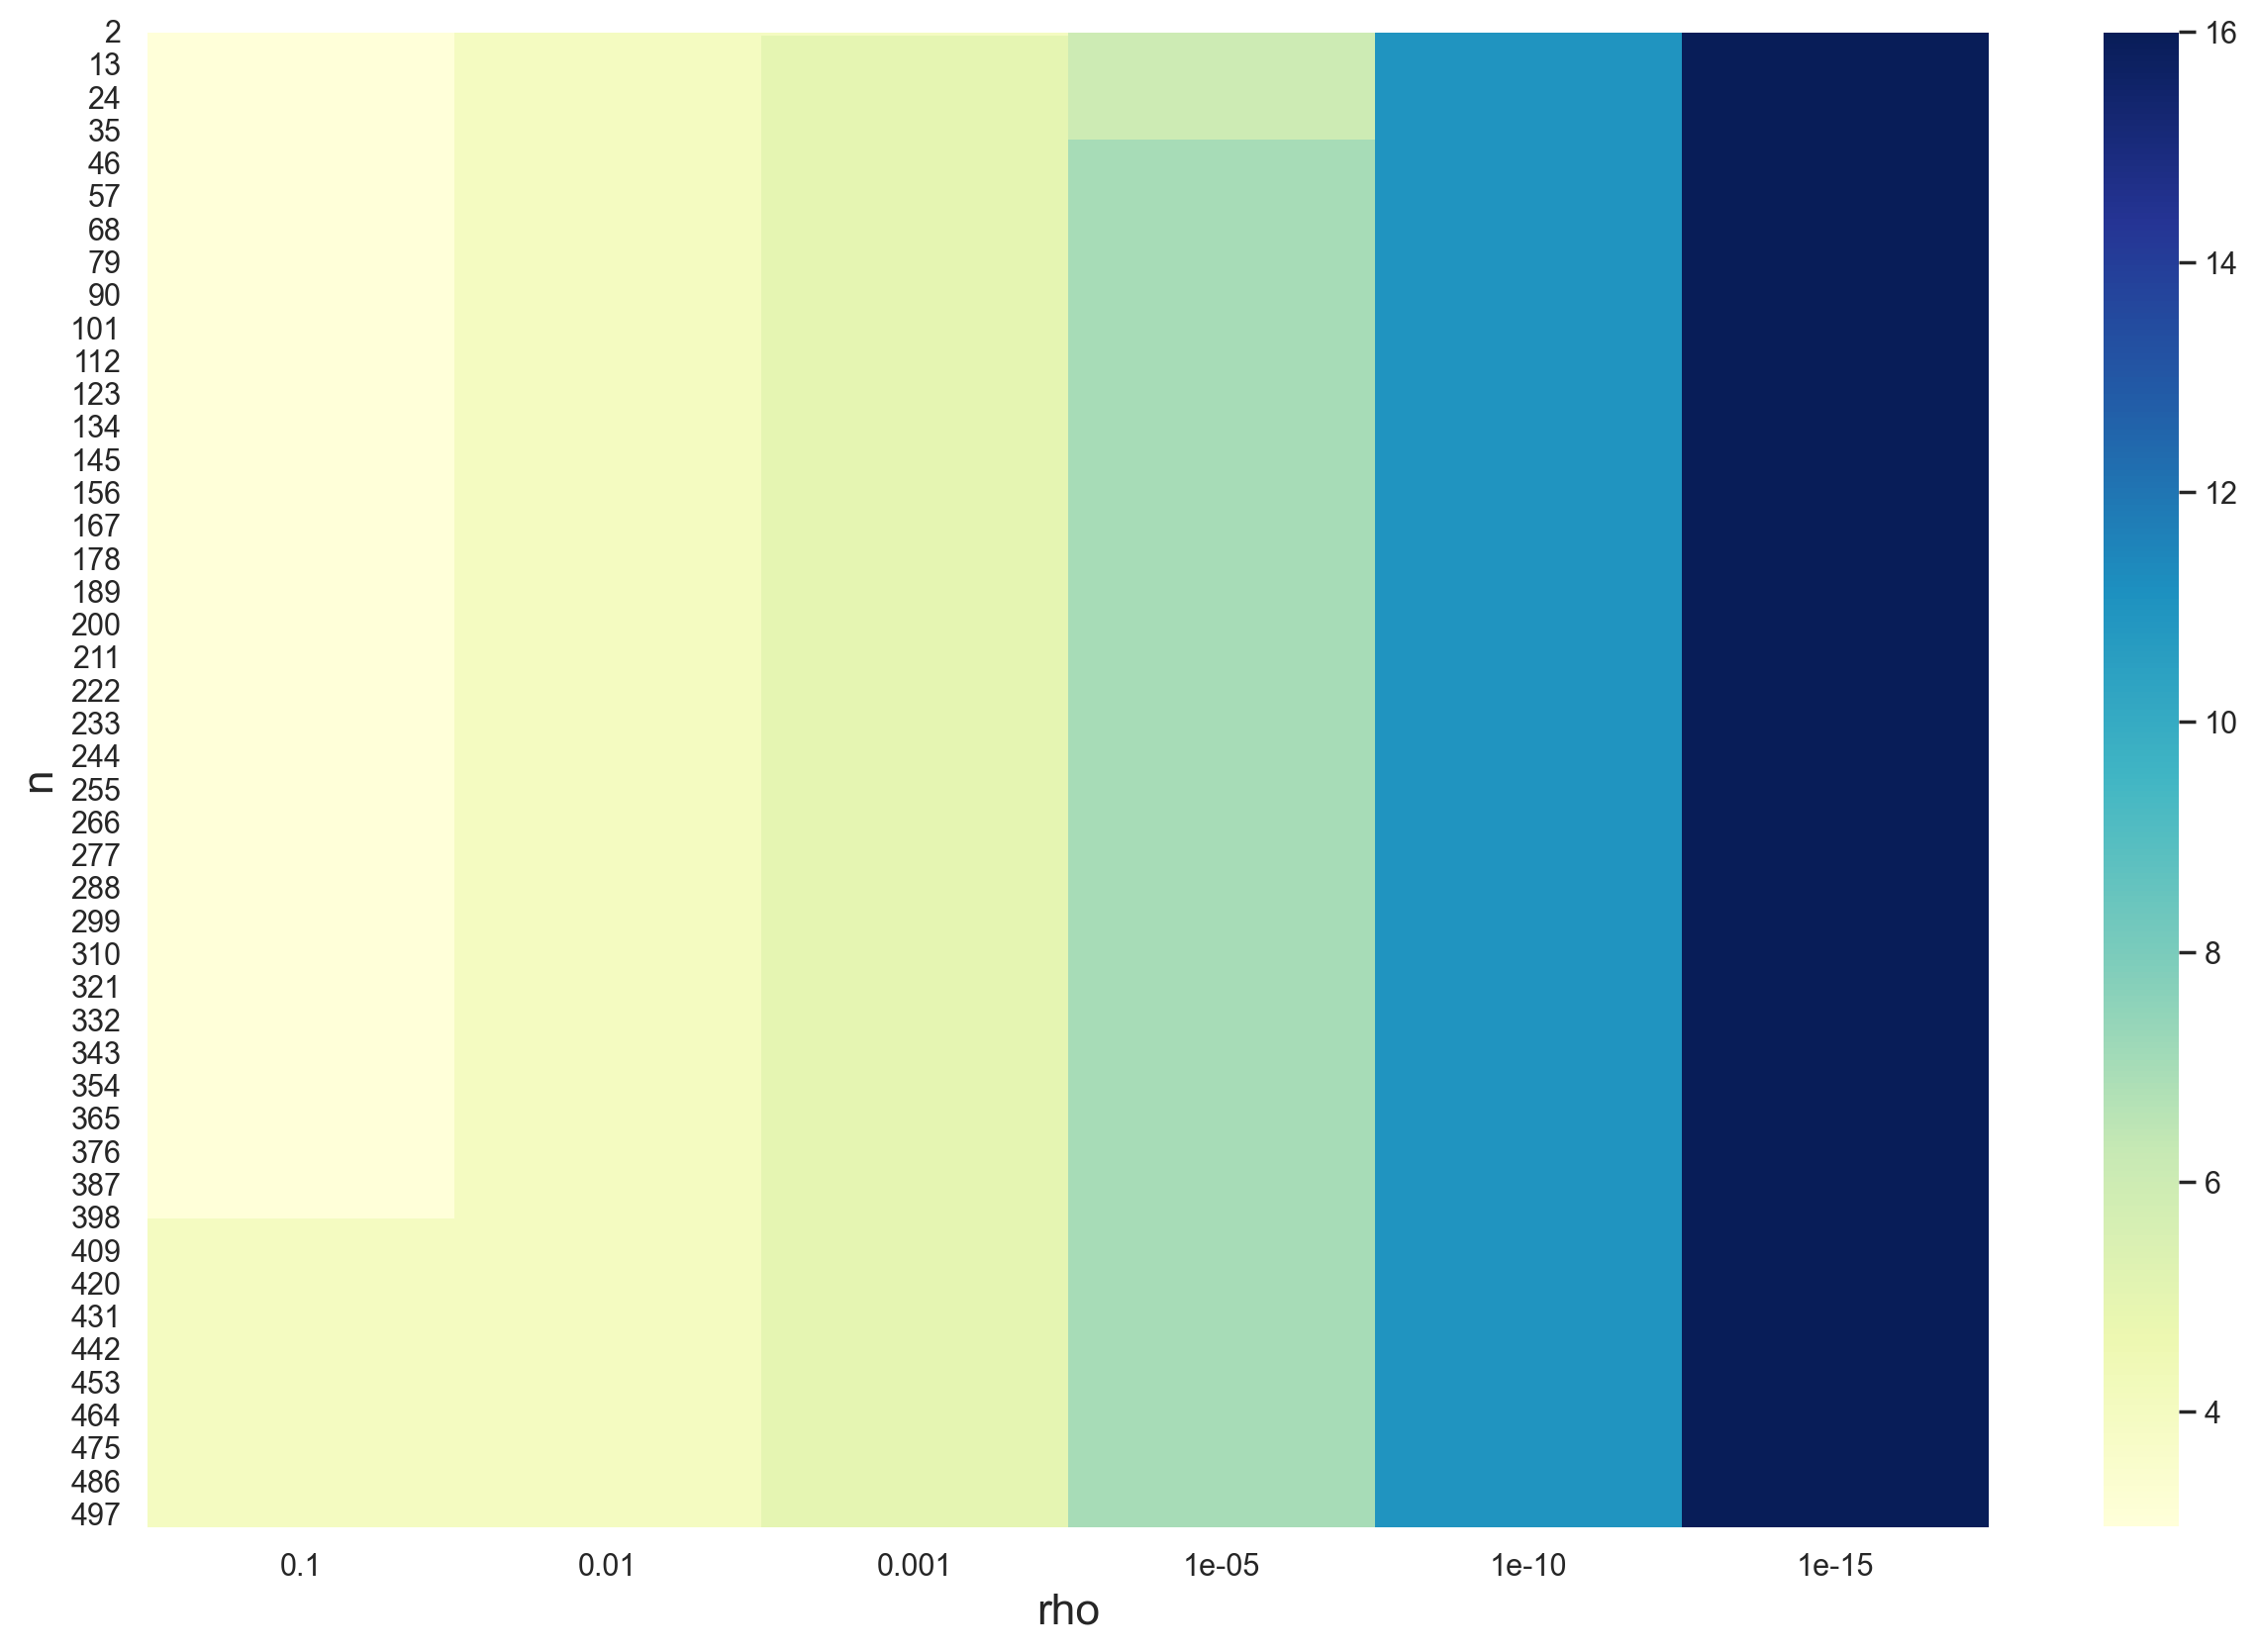

In [33]:
show_heatmap(df_iters1, xlabel='rho', ylabel='n', annot=False)

##### Czasy oblicze≈Ñ

W tym przypadku widzimy, ≈ºe czas oblicze≈Ñ zwiƒôksza siƒô zar√≥wno podczas zwiƒôkszania warto≈õci $n$, jak i podczas zmniejszania warto≈õci $\rho$.

In [34]:
df_times1 = results1['times']
df_times1

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000138      0.000084      0.000079      0.000104      0.000235   
3        0.000103      0.000085      0.000100      0.000109      0.000186   
4        0.000075      0.000084      0.000096      0.000113      0.000184   
5        0.000073      0.000083      0.000096      0.000110      0.000179   
6        0.000192      0.000100      0.000095      0.000165      0.000388   
..            ...           ...           ...           ...           ...   
496      0.002053      0.002184      0.002729      0.002879      0.003700   
497      0.002637      0.002046      0.002430      0.002671      0.002703   
498      0.002362      0.002156      0.002406      0.002826      0.003198   
499      0.002311      0.002064      0.002281      0.003056      0.002712   
500      0.002736      0.002093      0.002090      0.002867      0.002774   

     1.000000e-15  
2        0.000525  
3        0.000248  
4        0.000249  
5        0.000253  
6        0.000530  
..            ...  
496      0.003347  
497      0.004403  
498      0.004212  
499      0.004403  
500      0.003842  

[499 rows x 6 columns]

In [35]:
df_times1_part = df_times1.iloc[ns]
df_times1_part.to_excel('zad1-times1-part.xlsx')
df_times1_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000138      0.000084      0.000079      0.000104      0.000235   
15       0.000074      0.000066      0.000079      0.000085      0.000140   
30       0.000125      0.000065      0.000074      0.000091      0.000136   
45       0.000064      0.000073      0.000075      0.000098      0.000140   
60       0.000137      0.000067      0.000093      0.000105      0.000132   
75       0.000096      0.000069      0.000077      0.000098      0.000159   
90       0.000115      0.000072      0.000082      0.000117      0.000157   
105      0.000409      0.000459      0.000619      0.000747      0.001336   
120      0.000480      0.000430      0.000523      0.000760      0.001155   
135      0.000587      0.000671      0.000633      0.000983      0.001411   
150      0.000660      0.000754      0.000637      0.000683      0.001521   
165      0.000742      0.001123      0.000961      0.001077      0.001531   
180      0.000722      0.000955      0.000872      0.000980      0.001966   
195      0.001497      0.000961      0.000758      0.000903      0.002522   
210      0.001733      0.000840      0.000923      0.001460      0.001670   
225      0.000731      0.000732      0.001086      0.001076      0.001679   
240      0.000922      0.000840      0.000952      0.001244      0.001938   
255      0.001340      0.000926      0.000970      0.001400      0.001884   
270      0.001122      0.001593      0.001861      0.002451      0.002624   
285      0.001355      0.001415      0.001450      0.002492      0.002555   
300      0.001732      0.001451      0.001543      0.002319      0.002788   
315      0.001471      0.001582      0.001347      0.001486      0.001828   
330      0.002280      0.001889      0.001772      0.001762      0.002776   
345      0.001337      0.001135      0.001402      0.001771      0.002507   
360      0.002195      0.001189      0.000985      0.001386      0.002358   
375      0.001518      0.001903      0.001977      0.002682      0.002513   
390      0.001715      0.001764      0.002052      0.002516      0.002669   
405      0.002227      0.002042      0.002313      0.002123      0.002748   
420      0.001531      0.002217      0.001877      0.001887      0.002422   
435      0.002062      0.002339      0.001970      0.002578      0.002995   
450      0.001855      0.001549      0.002048      0.002529      0.002510   
465      0.002261      0.001906      0.002299      0.002611      0.002176   
480      0.002114      0.002233      0.002670      0.003124      0.004273   
495      0.002436      0.002737      0.002630      0.002582      0.003899   
500      0.002736      0.002093      0.002090      0.002867      0.002774   

     1.000000e-15  
2        0.000525  
15       0.000197  
30       0.000186  
45       0.000189  
60       0.000196  
75       0.000198  
90       0.000214  
105      0.001853  
120      0.002028  
135      0.001687  
150      0.001904  
165      0.002206  
180      0.002264  
195      0.002289  
210      0.002246  
225      0.002338  
240      0.002712  
255      0.002868  
270      0.002932  
285      0.002568  
300      0.003070  
315      0.002209  
330      0.003161  
345      0.003222  
360      0.002739  
375      0.003639  
390      0.003607  
405      0.003215  
420      0.003123  
435      0.003339  
450      0.003790  
465      0.003673  
480      0.006163  
495      0.003961  
500      0.003842

###### Wykres czas√≥w w skali liniowej

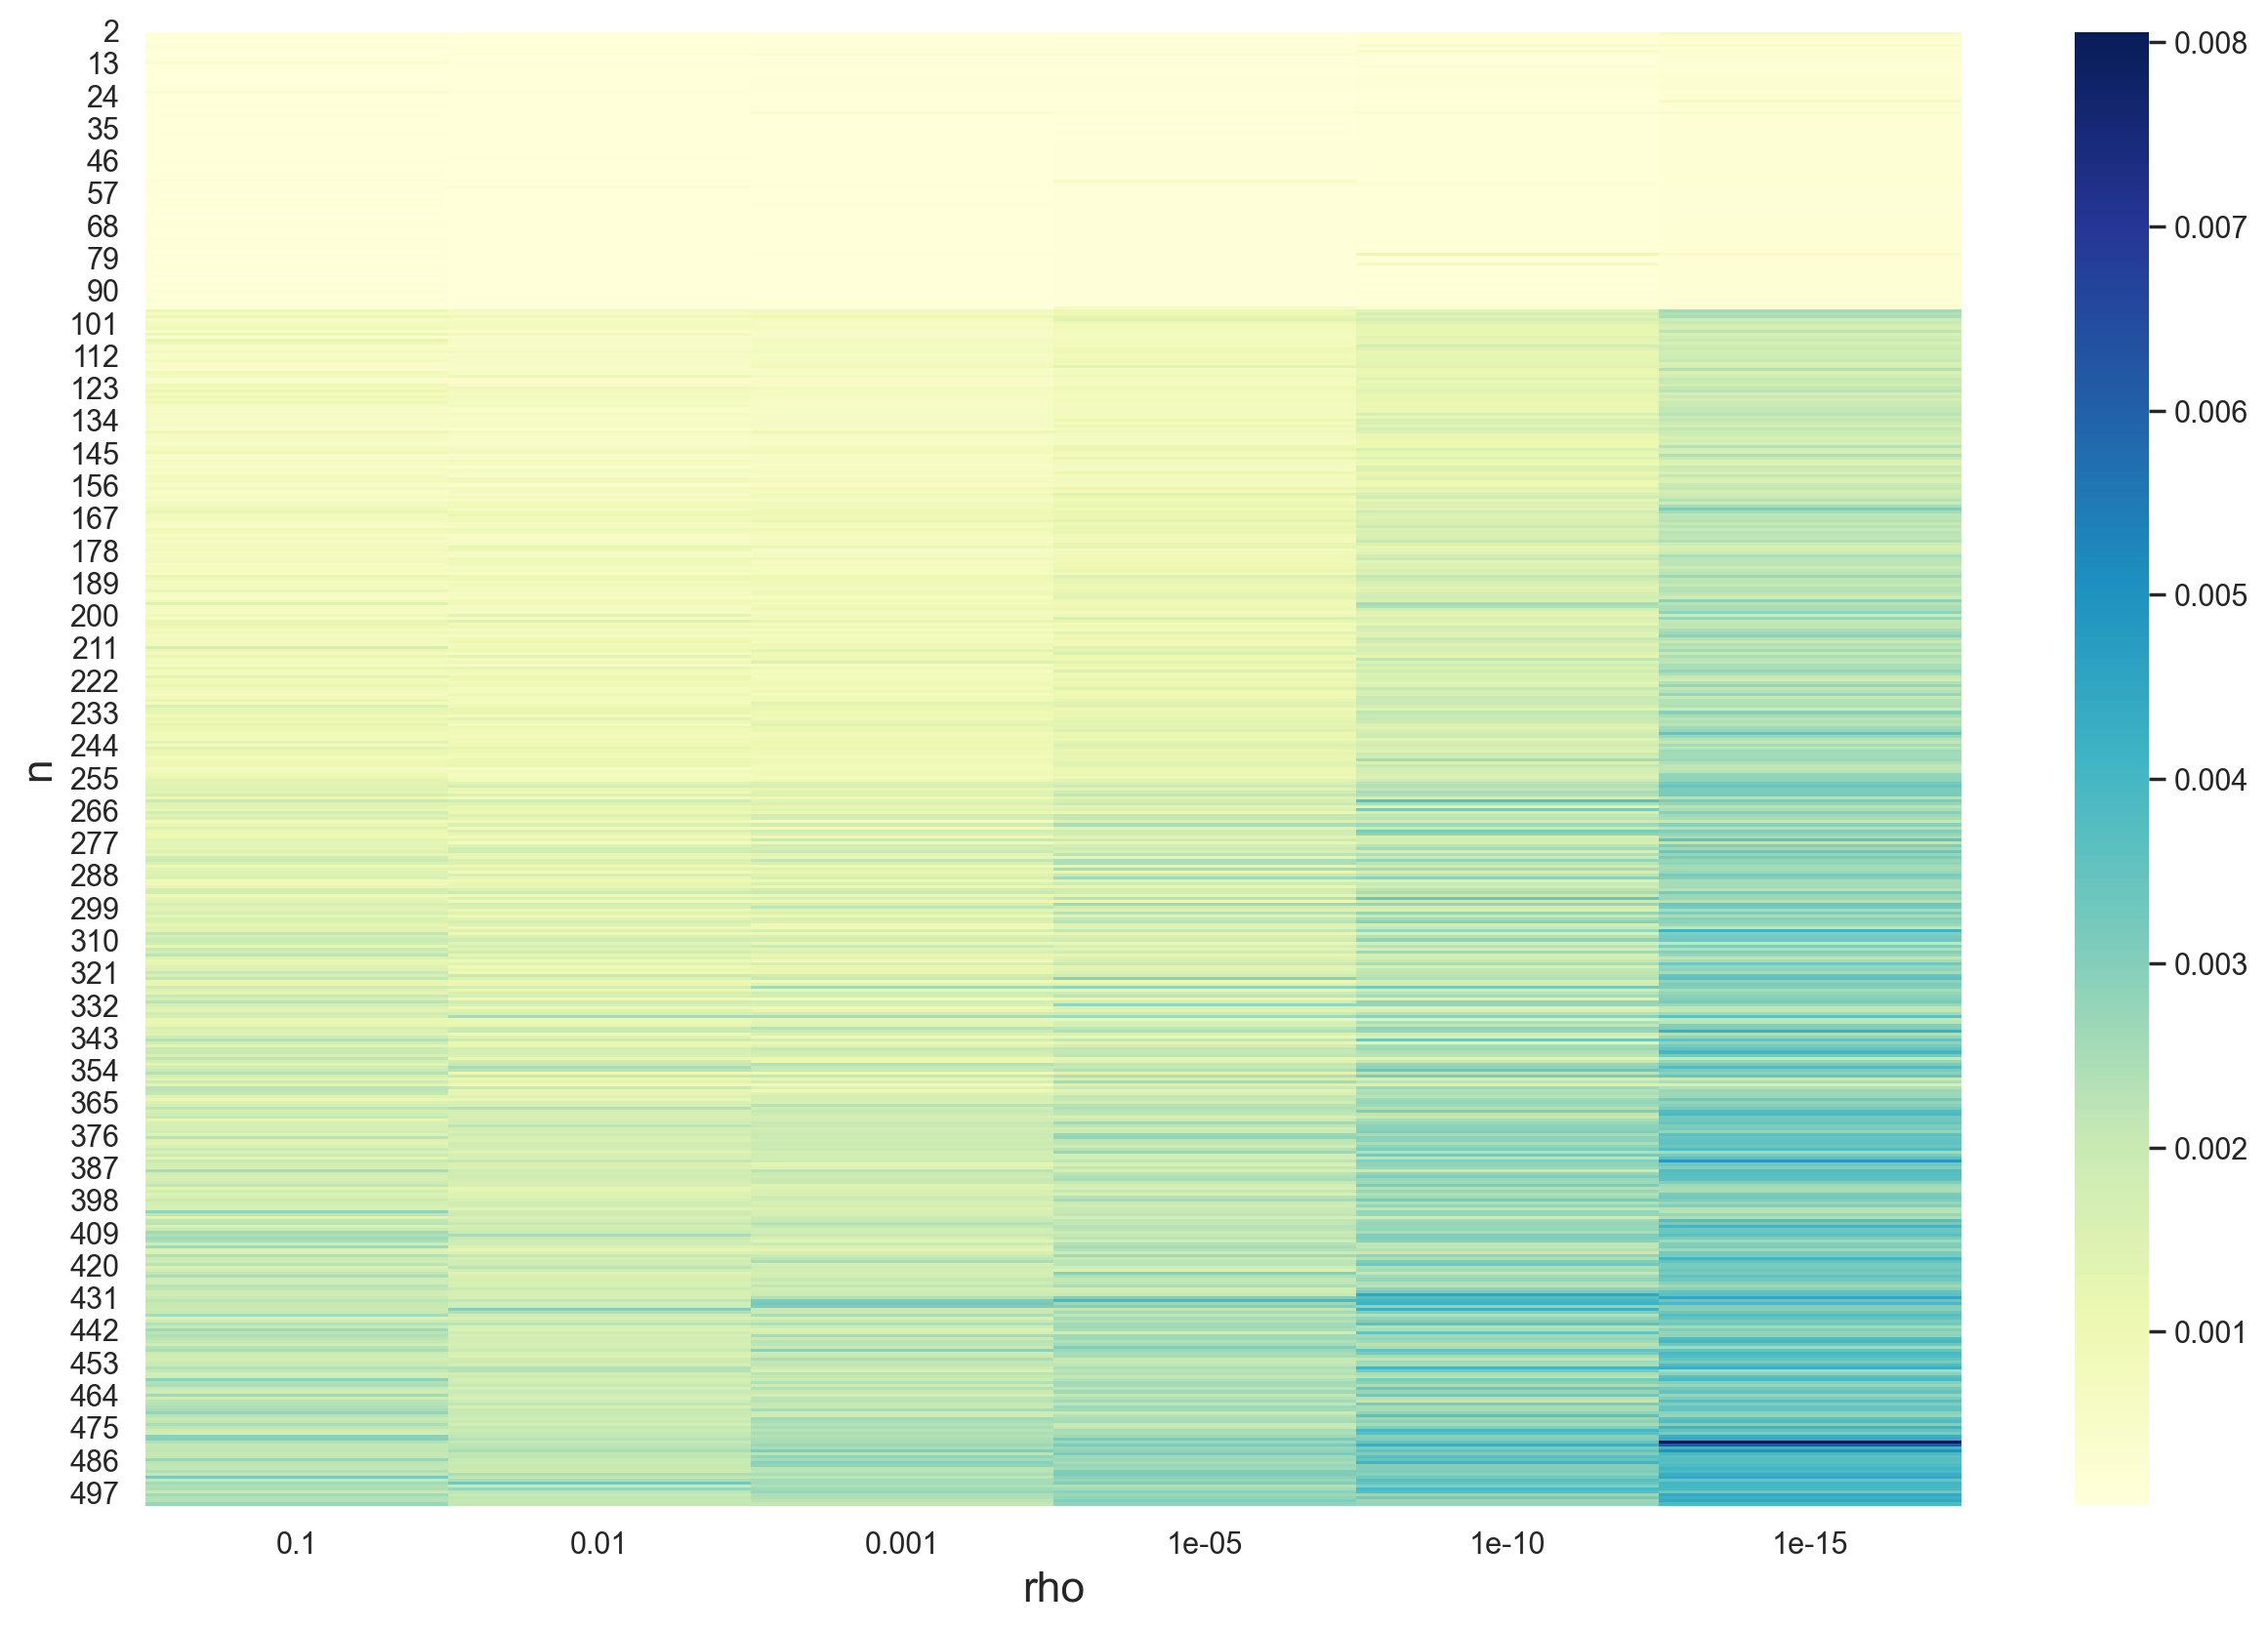

In [36]:
show_heatmap(df_times1, xlabel='rho', ylabel='n', annot=False)

###### Wykres czas√≥w w skali logarytmicznej

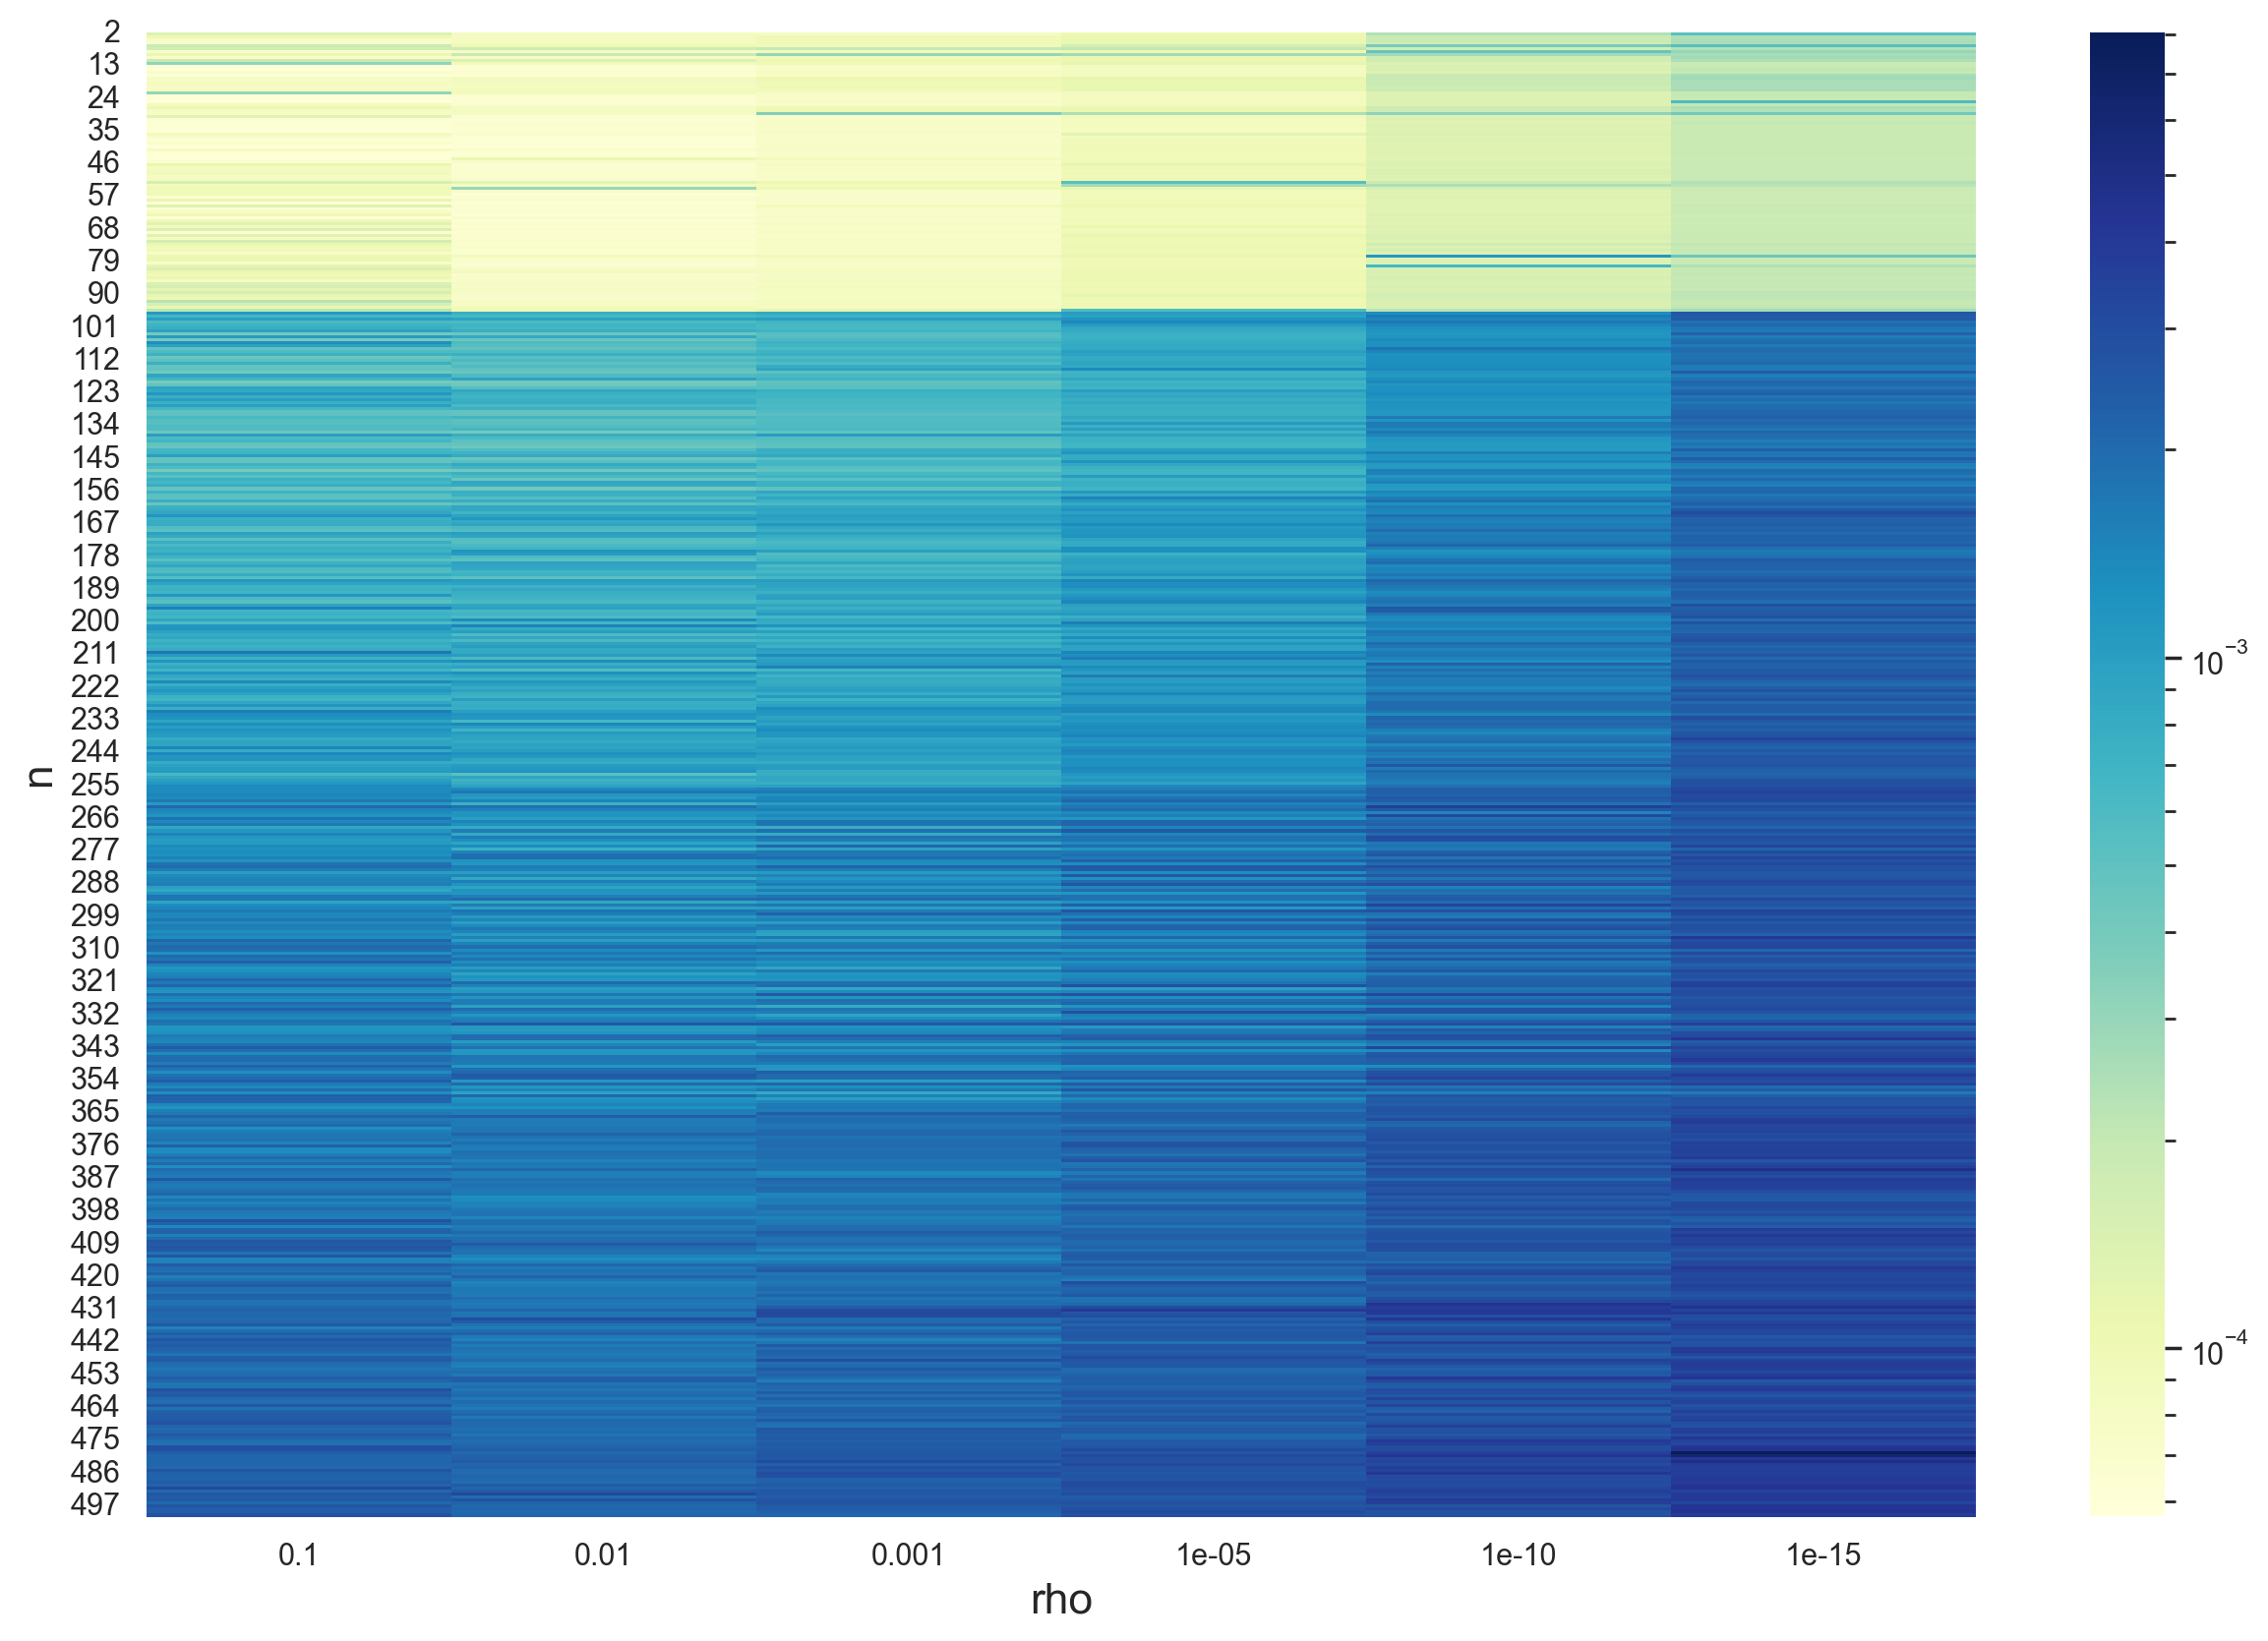

In [37]:
show_heatmap(df_times1, xlabel='rho', ylabel='n', annot=False, norm=LogNorm())

##### B≈Çƒôdy oblicze≈Ñ

Jak mo≈ºemy zauwa≈ºyƒá, zmniejszanie warto≈õci $\rho$ powoduje znaczny wzrost dok≈Çadno≈õci oblicze≈Ñ. Mo≈ºemy r√≥wnie≈º zaobserwowaƒá, ≈ºe zwiƒôkszanie warto≈õci $n$ nie powoduje jednoznacznie pogorszenia dok≈Çadno≈õci oblicze≈Ñ. Wyja≈õnienie tego zjawiska jest proste, a dzieje siƒô tak, dlatego, ≈ºe wykonujemy r√≥≈ºnƒÖ liczbƒô iteracji (tyle, ile potrzeba, aby spe≈Çnione zosta≈Ço kryterium stopu). Mo≈ºe siƒô wiƒôc zdarzyƒá, ≈ºe warto≈õƒá, dla kt√≥rej uzyskujemy bardzo du≈ºy b≈ÇƒÖd (w por√≥wnaniu do pozosta≈Çych warto≈õci) zostanie uznana za wystarczajƒÖco dok≈ÇadnƒÖ, poniewa≈º spe≈Çnione bƒôdzie kryterium stopu. W√≥wczas, dalsze zwiƒôkszanie warto≈õci $n$ powoduje, ≈ºe b≈ÇƒÖd oblicze≈Ñ jest wiƒôkszy (przy ustalonej liczbie iteracji), wiƒôc mo≈ºe siƒô okazaƒá, ≈ºe tym razem, dla tej samej liczby iteracji, co poprzednio, wynik nie jest wystarczajƒÖco dok≈Çadny, wiƒôc konieczne jest wykonanie jeszcze jednej iteracji. Wykonanie dodatkowej iteracji powoduje, ≈ºe otrzymujemy znacznie wy≈ºszƒÖ dok≈Çadno≈õƒá wyniku ni≈º wcze≈õniej, a wiƒôc na poni≈ºszym wykresie, obserwujemy gwa≈ÇtownƒÖ zmianƒô barwy podczas zwiƒôkszania warto≈õci $n$.

In [38]:
df_errors1 = results1['errors']
df_errors1

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.001063      0.000097      0.000097  7.982867e-07  4.956625e-12   
3        0.001288      0.000102      0.000009  8.907753e-07  5.409114e-12   
4        0.001437      0.000108      0.000010  9.255833e-07  5.702960e-12   
5        0.001517      0.000110      0.000010  9.926783e-07  5.805440e-12   
6        0.001545      0.000111      0.000010  9.992201e-07  5.803612e-12   
..            ...           ...           ...           ...           ...   
496      0.000351      0.000351      0.000016  8.954752e-08  6.461528e-12   
497      0.000351      0.000351      0.000016  8.956096e-08  6.461783e-12   
498      0.000351      0.000351      0.000016  8.957430e-08  6.462211e-12   
499      0.000351      0.000351      0.000016  8.958770e-08  6.462691e-12   
500      0.000351      0.000351      0.000016  8.960100e-08  6.462712e-12   

     1.000000e-15  
2    0.000000e+00  
3    0.000000e+00  
4    0.000000e+00  
5    0.000000e+00  
6    3.330669e-16  
..            ...  
496  7.849677e-15  
497  8.409161e-15  
498  8.484312e-15  
499  7.581287e-15  
500  8.147857e-15  

[499 rows x 6 columns]

In [39]:
min_n = 2
interval = 20
df_errors1_part = df_errors1.iloc[ns]
df_errors1_part.to_excel('zad1-errors1-part.xlsx')
df_errors1_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.001063      0.000097      0.000097  7.982867e-07  4.956625e-12   
15       0.001607      0.000131      0.000010  1.146522e-06  5.920699e-12   
30       0.001689      0.000160      0.000010  1.271480e-06  6.013302e-12   
45       0.001823      0.000182      0.000011  7.895538e-08  6.071603e-12   
60       0.001962      0.000200      0.000011  7.958686e-08  6.114352e-12   
75       0.002094      0.000214      0.000012  8.020834e-08  6.148420e-12   
90       0.002217      0.000226      0.000012  8.079694e-08  6.176780e-12   
105      0.002330      0.000236      0.000012  8.135214e-08  6.200934e-12   
120      0.002435      0.000246      0.000013  8.187300e-08  6.222034e-12   
135      0.002532      0.000254      0.000013  8.236410e-08  6.241207e-12   
150      0.002622      0.000261      0.000013  8.282679e-08  6.258038e-12   
165      0.002705      0.000268      0.000013  8.326517e-08  6.273866e-12   
180      0.002784      0.000274      0.000014  8.368057e-08  6.288262e-12   
195      0.002858      0.000280      0.000014  8.407617e-08  6.301372e-12   
210      0.002927      0.000286      0.000014  8.445302e-08  6.314013e-12   
225      0.002993      0.000291      0.000014  8.481356e-08  6.325266e-12   
240      0.003056      0.000296      0.000014  8.515856e-08  6.336243e-12   
255      0.003115      0.000300      0.000015  8.548992e-08  6.346474e-12   
270      0.003172      0.000304      0.000015  8.580823e-08  6.355787e-12   
285      0.003226      0.000308      0.000015  8.611497e-08  6.364966e-12   
300      0.003278      0.000312      0.000015  8.641059e-08  6.373699e-12   
315      0.003327      0.000316      0.000015  8.669628e-08  6.381784e-12   
330      0.003375      0.000320      0.000015  8.697237e-08  6.390136e-12   
345      0.003421      0.000323      0.000015  8.723985e-08  6.397957e-12   
360      0.003465      0.000326      0.000015  8.749897e-08  6.405289e-12   
375      0.003508      0.000329      0.000016  8.775054e-08  6.412392e-12   
390      0.003549      0.000332      0.000016  8.799475e-08  6.418963e-12   
405      0.000335      0.000335      0.000016  8.823230e-08  6.426009e-12   
420      0.000338      0.000338      0.000016  8.846331e-08  6.432360e-12   
435      0.000341      0.000341      0.000016  8.868839e-08  6.438488e-12   
450      0.000343      0.000343      0.000016  8.890764e-08  6.444242e-12   
465      0.000346      0.000346      0.000016  8.912157e-08  6.450027e-12   
480      0.000348      0.000348      0.000016  8.933025e-08  6.455768e-12   
495      0.000350      0.000350      0.000016  8.953414e-08  6.461101e-12   
500      0.000351      0.000351      0.000016  8.960100e-08  6.462712e-12   

     1.000000e-15  
2    0.000000e+00  
15   3.330669e-16  
30   5.978734e-16  
45   6.473657e-16  
60   1.174950e-15  
75   1.430422e-15  
90   1.612692e-15  
105  1.870981e-15  
120  2.519497e-15  
135  2.373386e-15  
150  3.575194e-15  
165  2.808667e-15  
180  3.332519e-15  
195  3.202373e-15  
210  3.629937e-15  
225  3.557914e-15  
240  3.607798e-15  
255  4.551914e-15  
270  4.458897e-15  
285  4.205680e-15  
300  3.810508e-15  
315  4.931440e-15  
330  5.409419e-15  
345  5.482973e-15  
360  4.958858e-15  
375  5.801911e-15  
390  6.329245e-15  
405  6.766898e-15  
420  8.309632e-15  
435  7.951088e-15  
450  8.945394e-15  
465  8.626940e-15  
480  9.569195e-15  
495  8.563124e-15  
500  8.147857e-15

###### Wykres b≈Çƒôd√≥w oblicze≈Ñ w skali liniowej

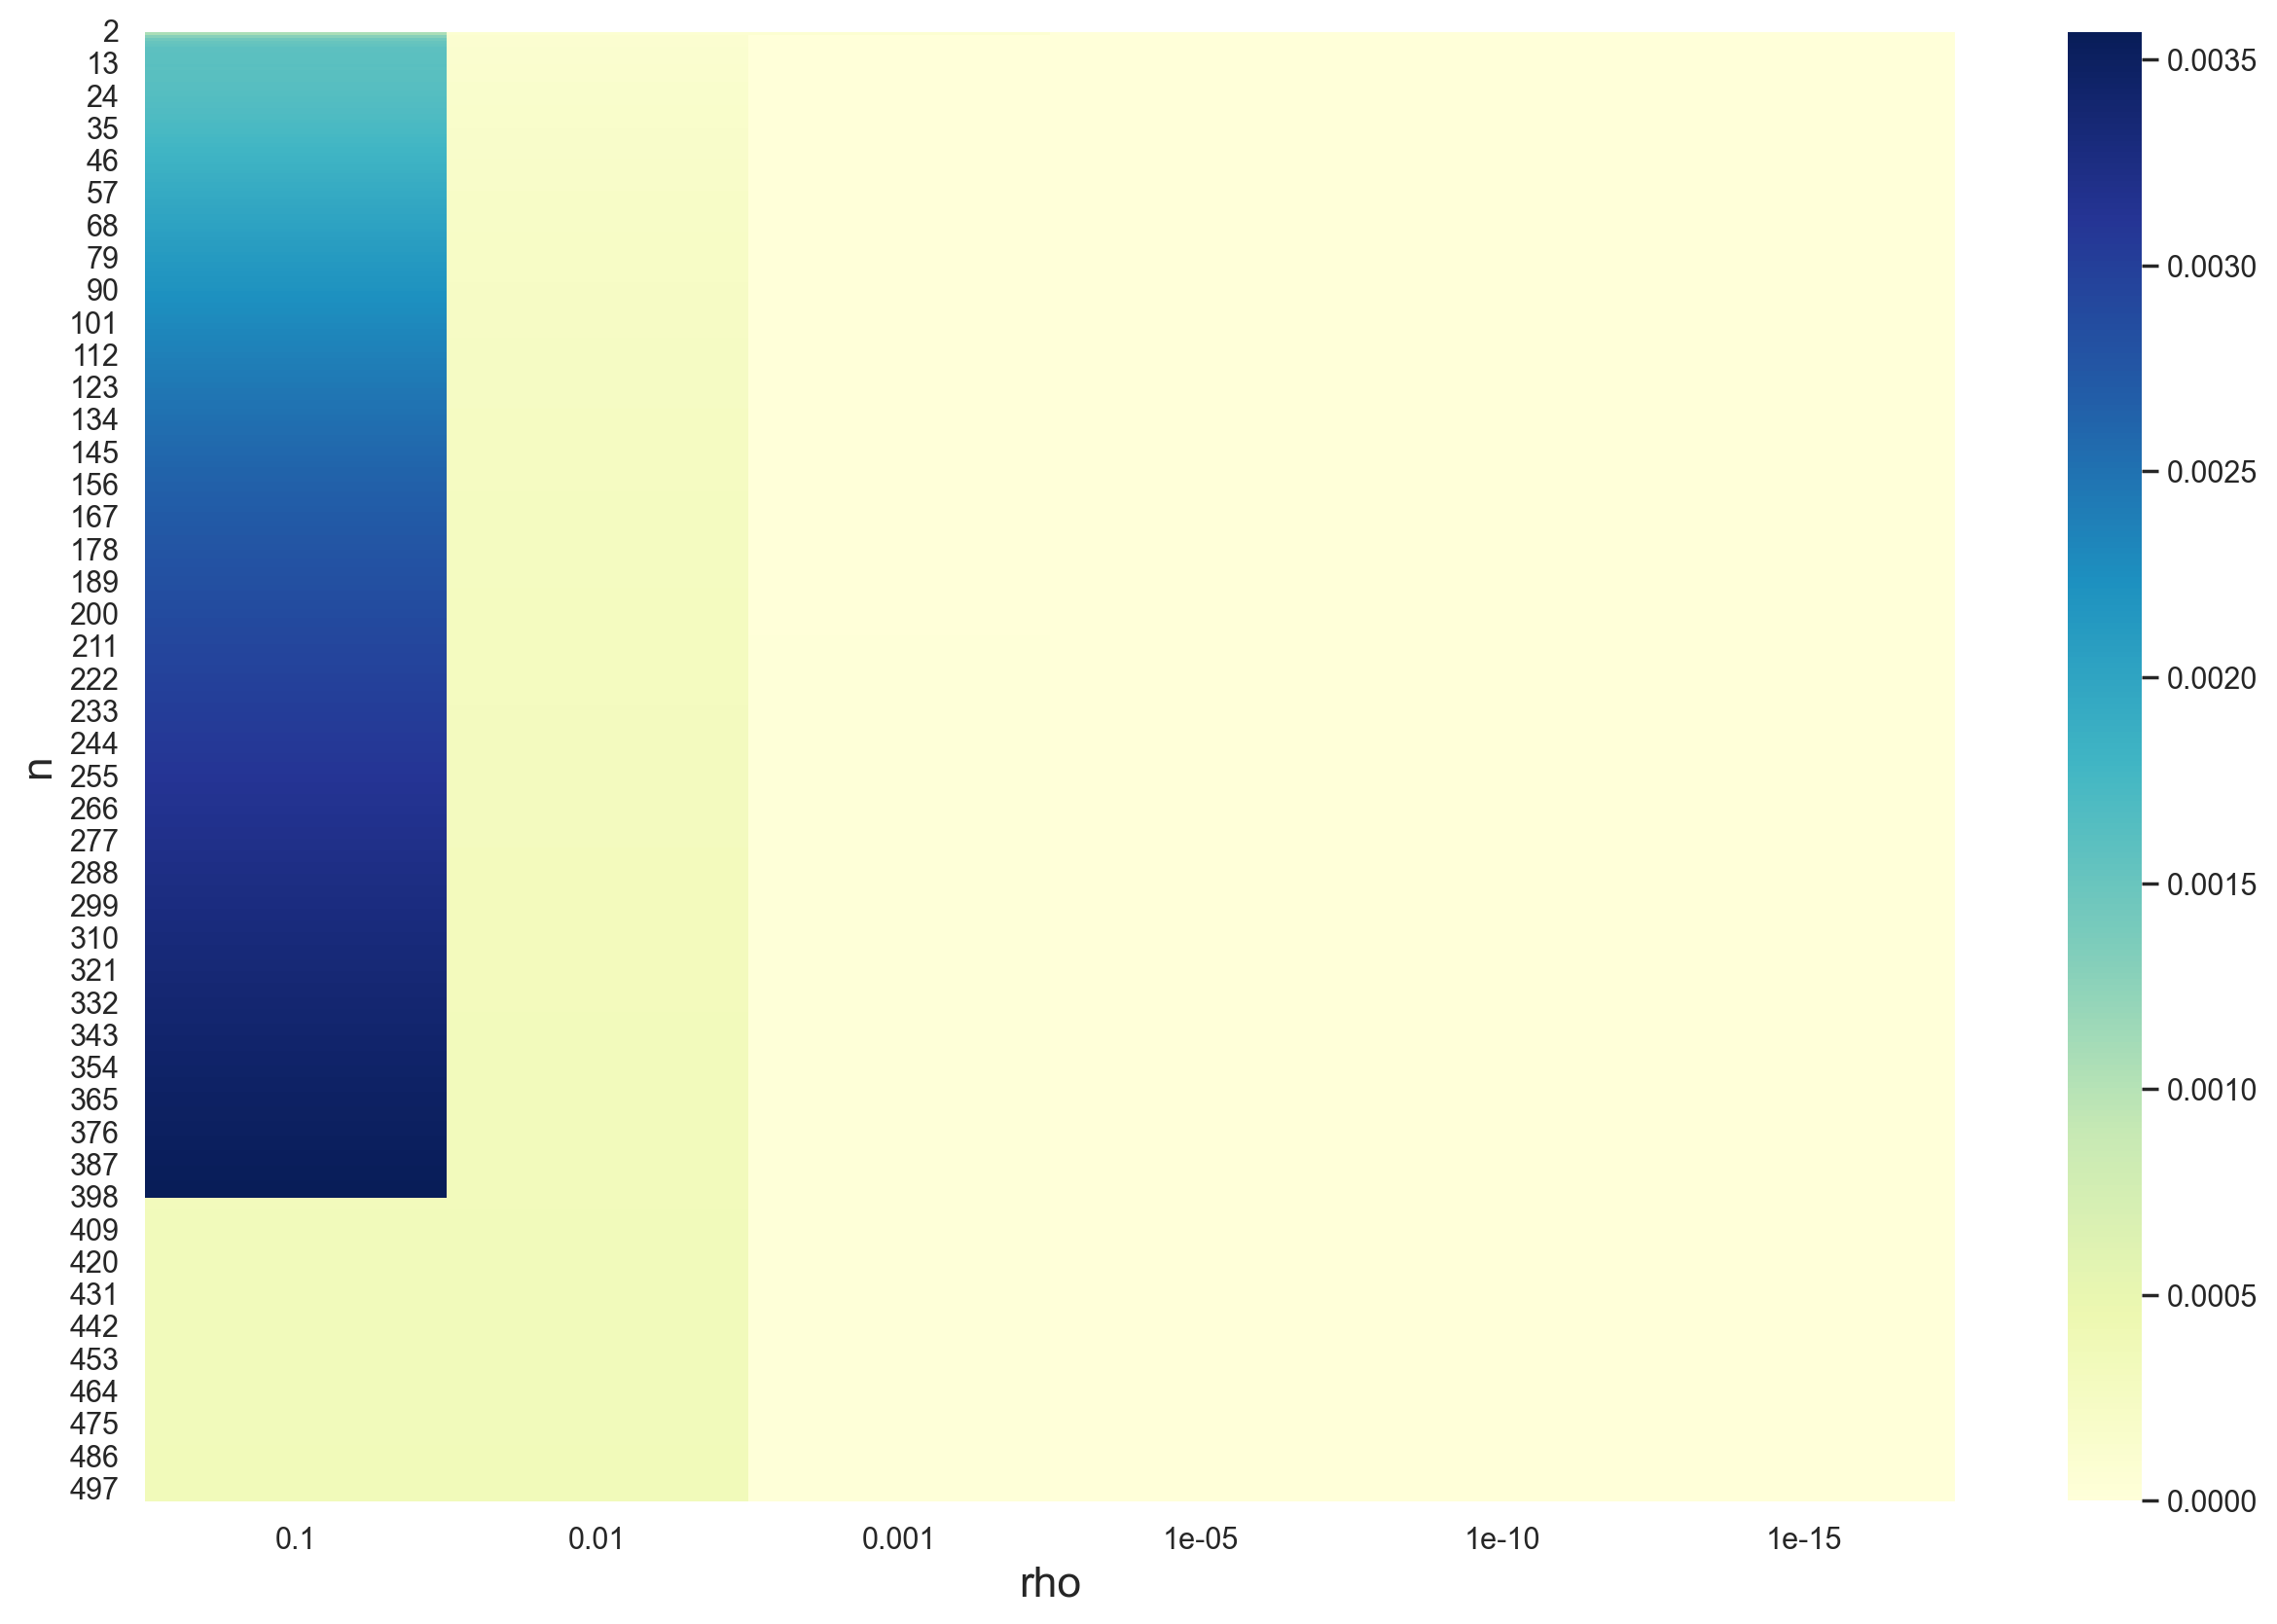

In [40]:
show_heatmap(df_errors1, xlabel='rho', ylabel='n', annot=False)

###### Wykres b≈Çƒôd√≥w oblicze≈Ñ w skali logarytmicznej

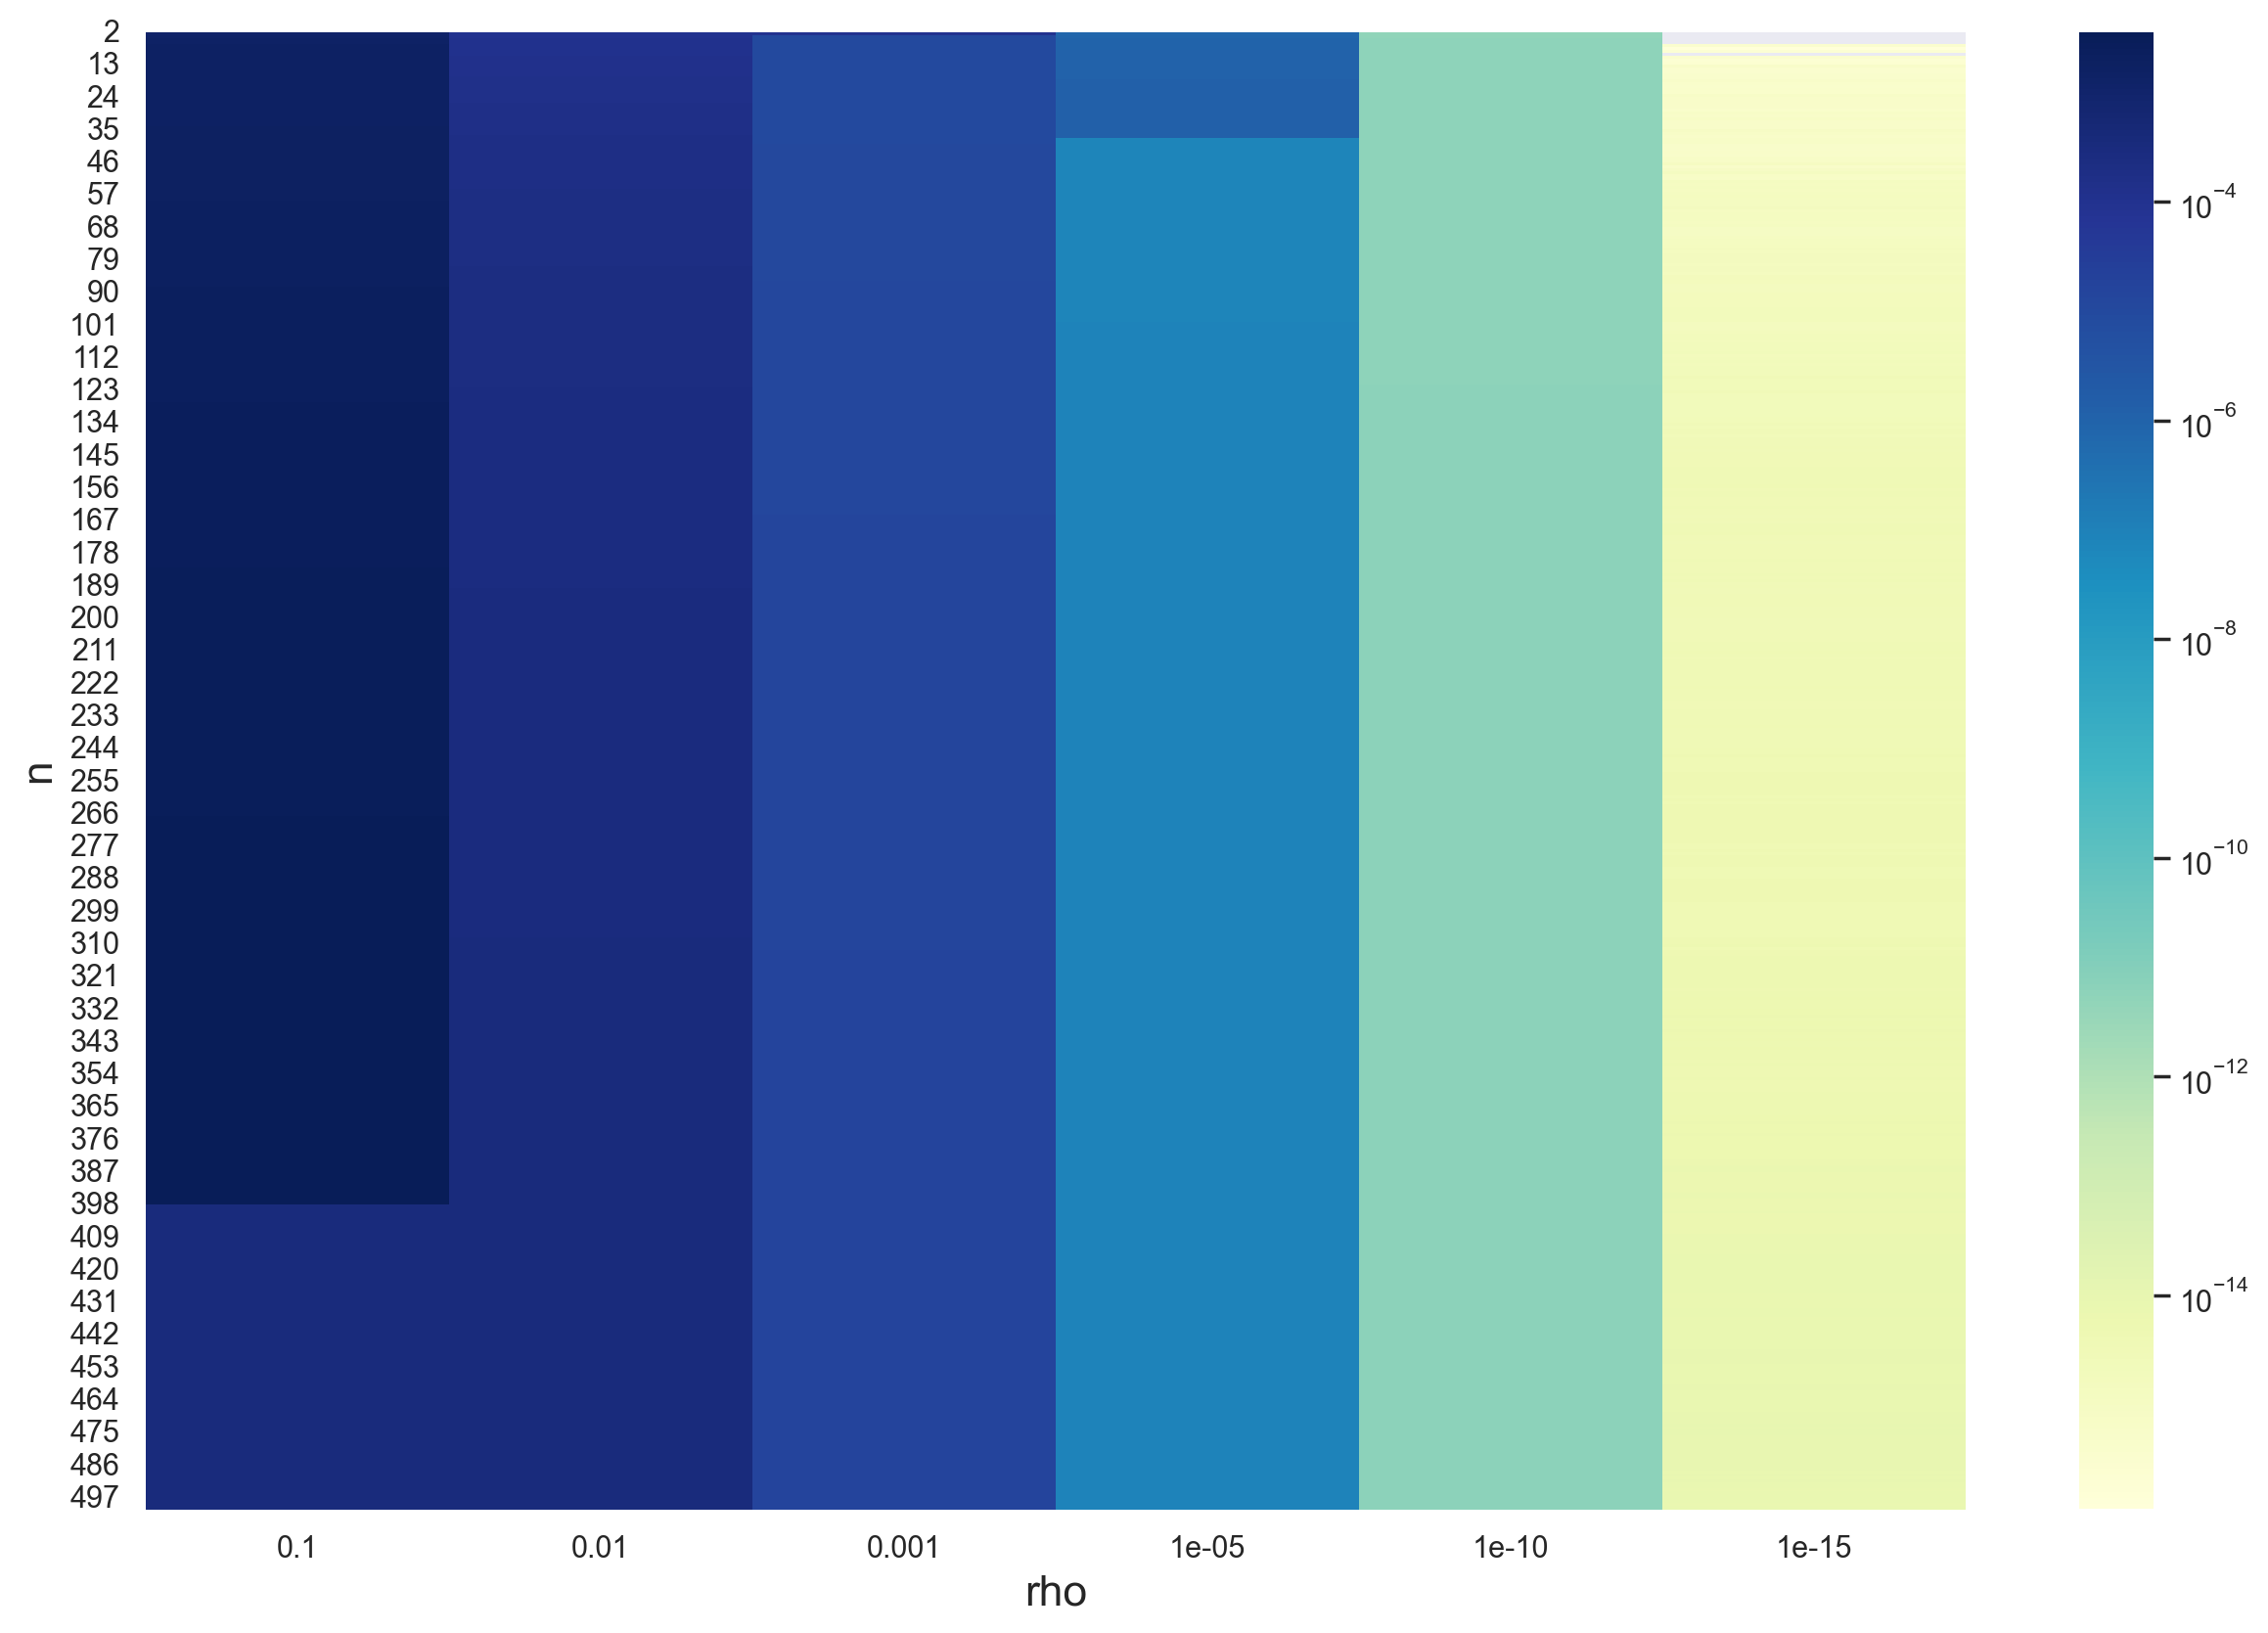

In [41]:
show_heatmap(df_errors1, xlabel='rho', ylabel='n', annot=False, norm=LogNorm())

###### Wp≈Çyw liczby iteracji na b≈ÇƒÖd oblicze≈Ñ

Zamieszczone ni≈ºej fragmenty tabel przedtawiajƒÖ liczbƒô iteracji oraz b≈Çƒôdy dla $\rho=0.1$ w zale≈ºno≈õci od warto≈õci $n$. Tak jak pisa≈Çem wcze≈õniej, dok≈Çadnie widaƒá, ≈ºe w momencie, w kt√≥rym liczba iteracji zwiƒôkszy≈Ça siƒô z $3$ do $4$, dok≈Çadno≈õƒá oblicze≈Ñ uleg≈Ça natychmiastowej poprawie.

In [42]:
df_iters1.iloc[390:400, 0]

392    3
393    3
394    3
395    3
396    3
397    3
398    4
399    4
400    4
401    4
Name: 0.1, dtype: int32

In [43]:
df_errors1.iloc[390:400, 0]

392    0.003555
393    0.003557
394    0.003560
395    0.003563
396    0.003565
397    0.003568
398    0.000334
399    0.000334
400    0.000334
401    0.000334
Name: 0.1, dtype: float64

#### Dla 2. kryterium stopu

In [44]:
n_list = list(range(2, 501))
start_vector_fn = lambda _: 0
ùúå_list = [
    1e-1,
    1e-2,
    1e-3,
    1e-5,
    1e-10,
    1e-15
]
stop_criterion = solution_difference

results2 = calculate(n_list, ùúå_list, start_vector_fn, stop_criterion)
print_duration(times['total'])

Obliczono uk≈Çady r√≥wna≈Ñ dla 25 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 50 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 75 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 100 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 125 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 150 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 175 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 200 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 225 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 250 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 275 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 300 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 325 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 350 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 375 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 400 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 425 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 450 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 475 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 499 warto≈õci n
≈ÅƒÖczny czas wykonania: 00:02:07.864


##### Liczby iteracji

Jak widzimy, nie da siƒô wyznaczyƒá rozwiƒÖza≈Ñ dla niekt√≥rych warto≈õci $n$, gdy $\rho = 10^{-15}$. Dzieje siƒô tak prawdopodobnie wskutek pojawienia siƒô du≈ºego b≈Çƒôdu zaokrƒôgle≈Ñ, przez co kryterium stopu nigdy nie jest spe≈Çnione.

In [45]:
df_iters2 = results2['iters']
df_iters2

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2               4             5             5             7            12   
3               4             5             6             7            12   
4               4             5             6             7            12   
5               4             5             6             8            12   
6               4             5             6             8            12   
..            ...           ...           ...           ...           ...   
496             4             5             6             8            12   
497             4             5             6             8            12   
498             4             5             6             8            12   
499             4             5             6             8            12   
500             4             5             6             8            12   

     1.000000e-15  
2              17  
3              17  
4              17  
5              17  
6              17  
..            ...  
496            -1  
497            -1  
498            -1  
499            -1  
500            -1  

[499 rows x 6 columns]

In [46]:
df_iters2_part = df_iters2.iloc[ns]
df_iters2_part.replace(-1, '-').to_excel('zad1-iters2-part.xlsx')
df_iters2_part.replace(-1, '-')

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2               4             5             5             7            12   
15              4             5             6             8            12   
30              4             5             6             8            12   
45              4             5             6             8            12   
60              4             5             6             8            12   
75              4             5             6             8            12   
90              4             5             6             8            12   
105             4             5             6             8            12   
120             4             5             6             8            12   
135             4             5             6             8            12   
150             4             5             6             8            12   
165             4             5             6             8            12   
180             4             5             6             8            12   
195             4             5             6             8            12   
210             4             5             6             8            12   
225             4             5             6             8            12   
240             4             5             6             8            12   
255             4             5             6             8            12   
270             4             5             6             8            12   
285             4             5             6             8            12   
300             4             5             6             8            12   
315             4             5             6             8            12   
330             4             5             6             8            12   
345             4             5             6             8            12   
360             4             5             6             8            12   
375             4             5             6             8            12   
390             4             5             6             8            12   
405             4             5             6             8            12   
420             4             5             6             8            12   
435             4             5             6             8            12   
450             4             5             6             8            12   
465             4             5             6             8            12   
480             4             5             6             8            12   
495             4             5             6             8            12   
500             4             5             6             8            12   

    1.000000e-15  
2             17  
15             -  
30             -  
45             -  
60             -  
75             -  
90             -  
105            -  
120            -  
135            -  
150            -  
165            -  
180            -  
195            -  
210            -  
225            -  
240            -  
255            -  
270            -  
285            -  
300            -  
315            -  
330            -  
345            -  
360            -  
375            -  
390            -  
405            -  
420            -  
435            -  
450            -  
465            -  
480            -  
495            -  
500            -

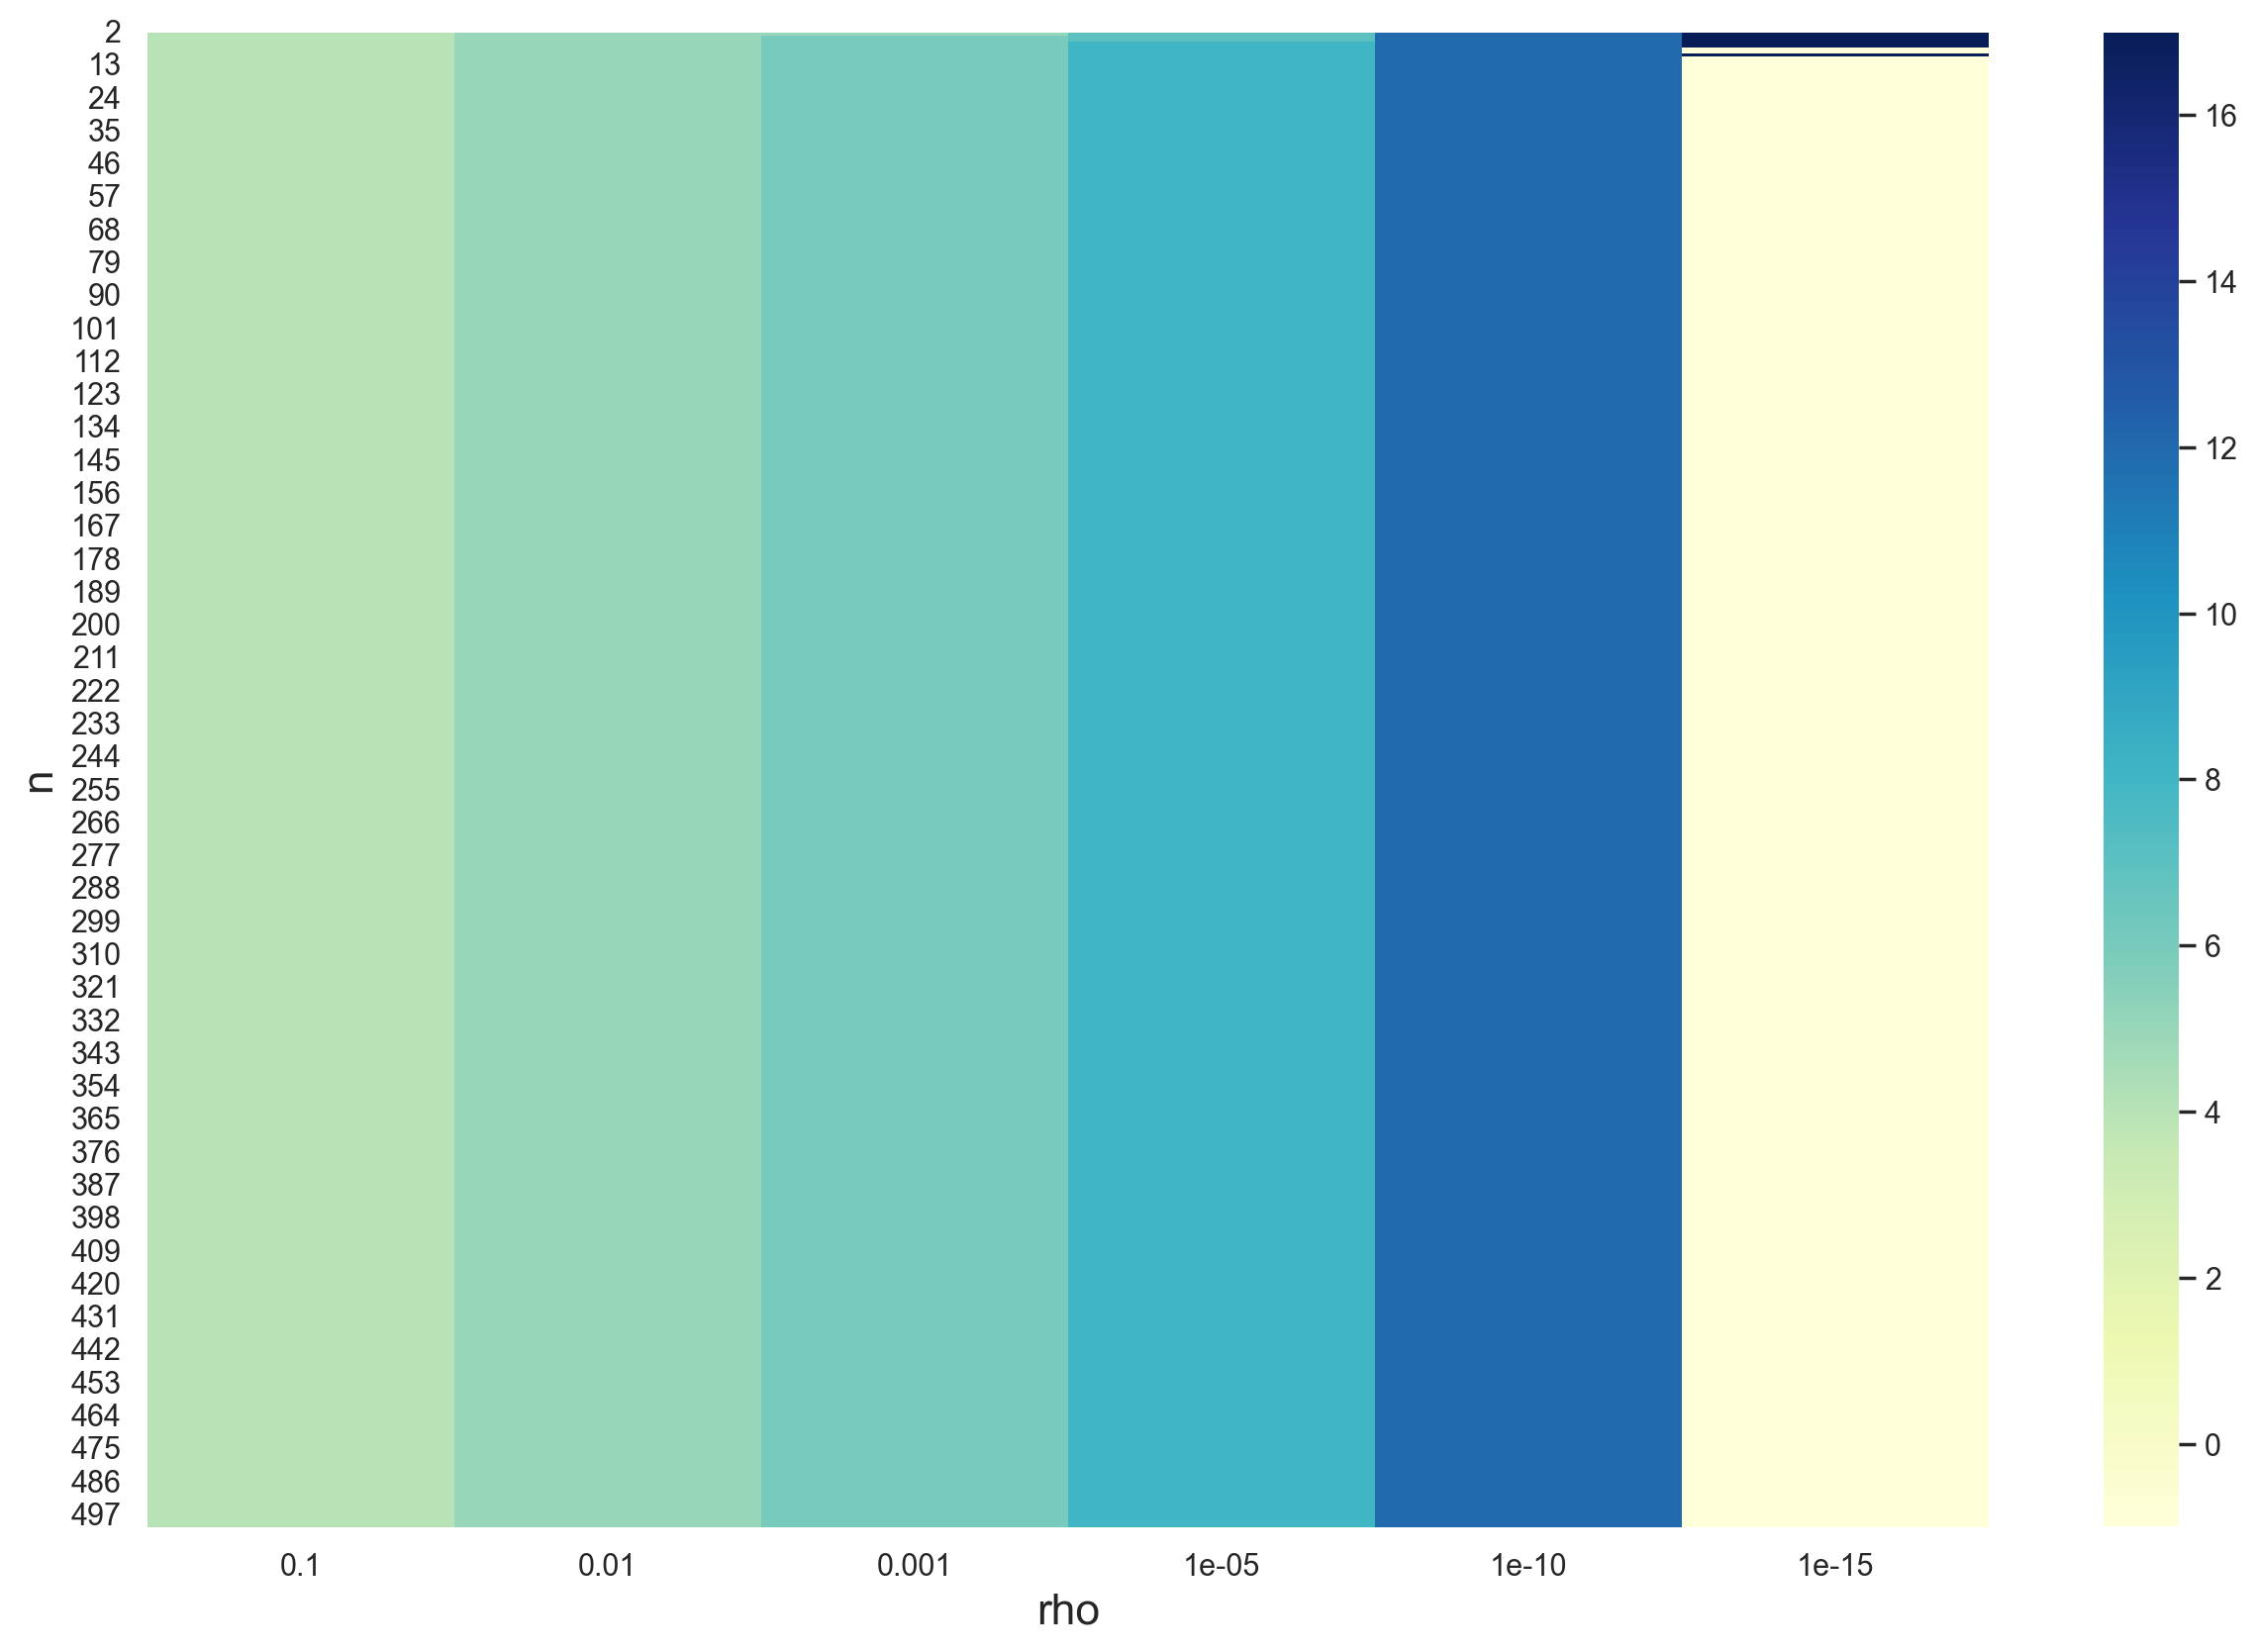

In [47]:
show_heatmap(df_iters2, xlabel='rho', ylabel='n', annot=False)

##### Czasy oblicze≈Ñ

In [48]:
df_times2 = results2['times']
df_times2.replace(np.nan, '-')

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000162      0.000103      0.000095      0.000393      0.000196   
3        0.000195      0.000101      0.000530      0.000297      0.000217   
4        0.000430      0.000095      0.000090      0.000222      0.000178   
5        0.000073      0.000077      0.000090      0.000111      0.000168   
6        0.000074      0.000078      0.000090      0.000114      0.000171   
..            ...           ...           ...           ...           ...   
496      0.003195      0.002734      0.003058      0.004030      0.005196   
497      0.003014      0.003400      0.003260      0.003545      0.004006   
498      0.002994      0.002879      0.002899      0.003480      0.004866   
499      0.002784      0.003394      0.003810      0.003669      0.006215   
500      0.003185      0.003182      0.002996      0.003967      0.004551   

    1.000000e-15  
2       0.000267  
3       0.000269  
4       0.000224  
5       0.000235  
6       0.000224  
..           ...  
496            -  
497            -  
498            -  
499            -  
500            -  

[499 rows x 6 columns]

In [49]:
df_times2_part = df_times2.iloc[ns]
df_times2_part.replace(np.nan, '-').to_excel('zad1-times2-part.xlsx')
df_times2_part.replace(np.nan, '-')

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000162      0.000103      0.000095      0.000393      0.000196   
15       0.000099      0.000082      0.000111      0.000116      0.000163   
30       0.000121      0.000078      0.000096      0.000108      0.000157   
45       0.000131      0.000097      0.000099      0.000123      0.000172   
60       0.000123      0.000081      0.000090      0.000113      0.000159   
75       0.000161      0.000103      0.000110      0.000133      0.000207   
90       0.000144      0.000108      0.000140      0.000161      0.000223   
105      0.001367      0.001797      0.001319      0.001500      0.002125   
120      0.001150      0.001425      0.001669      0.002036      0.003488   
135      0.001429      0.001450      0.001877      0.002445      0.003020   
150      0.000943      0.001391      0.001722      0.002264      0.002603   
165      0.001920      0.001367      0.001354      0.001649      0.002700   
180      0.001251      0.001517      0.001801      0.002021      0.003090   
195      0.000972      0.001149      0.001319      0.002493      0.002995   
210      0.002082      0.001200      0.001201      0.001396      0.002735   
225      0.002003      0.001845      0.001586      0.001899      0.002533   
240      0.001135      0.001350      0.001535      0.001809      0.003886   
255      0.001094      0.001058      0.001260      0.002211      0.002591   
270      0.001108      0.001234      0.001341      0.001910      0.002413   
285      0.001636      0.001674      0.001250      0.001555      0.002299   
300      0.001474      0.002094      0.001937      0.002118      0.003086   
315      0.002159      0.001912      0.001834      0.002064      0.002787   
330      0.001807      0.002606      0.002741      0.002403      0.003701   
345      0.002428      0.002681      0.002909      0.003168      0.004198   
360      0.002536      0.001917      0.001326      0.002192      0.002716   
375      0.002495      0.002377      0.001787      0.002614      0.003765   
390      0.001942      0.002507      0.002750      0.002531      0.004461   
405      0.002796      0.002306      0.002117      0.003221      0.003352   
420      0.003145      0.002142      0.001992      0.003569      0.003571   
435      0.002244      0.002648      0.002867      0.004205      0.004367   
450      0.002458      0.002558      0.003036      0.002818      0.004629   
465      0.002495      0.002384      0.003065      0.003323      0.004370   
480      0.002693      0.003238      0.003254      0.003686      0.004710   
495      0.003442      0.003701      0.003412      0.003509      0.005268   
500      0.003185      0.003182      0.002996      0.003967      0.004551   

    1.000000e-15  
2       0.000267  
15             -  
30             -  
45             -  
60             -  
75             -  
90             -  
105            -  
120            -  
135            -  
150            -  
165            -  
180            -  
195            -  
210            -  
225            -  
240            -  
255            -  
270            -  
285            -  
300            -  
315            -  
330            -  
345            -  
360            -  
375            -  
390            -  
405            -  
420            -  
435            -  
450            -  
465            -  
480            -  
495            -  
500            -

###### Wykres czas√≥w w skali liniowej

In [50]:
df_times2.max()

1.000000e-01    0.003679
1.000000e-02    0.004020
1.000000e-03    0.004164
1.000000e-05    0.004842
1.000000e-10    0.006807
1.000000e-15    0.000269
dtype: float64

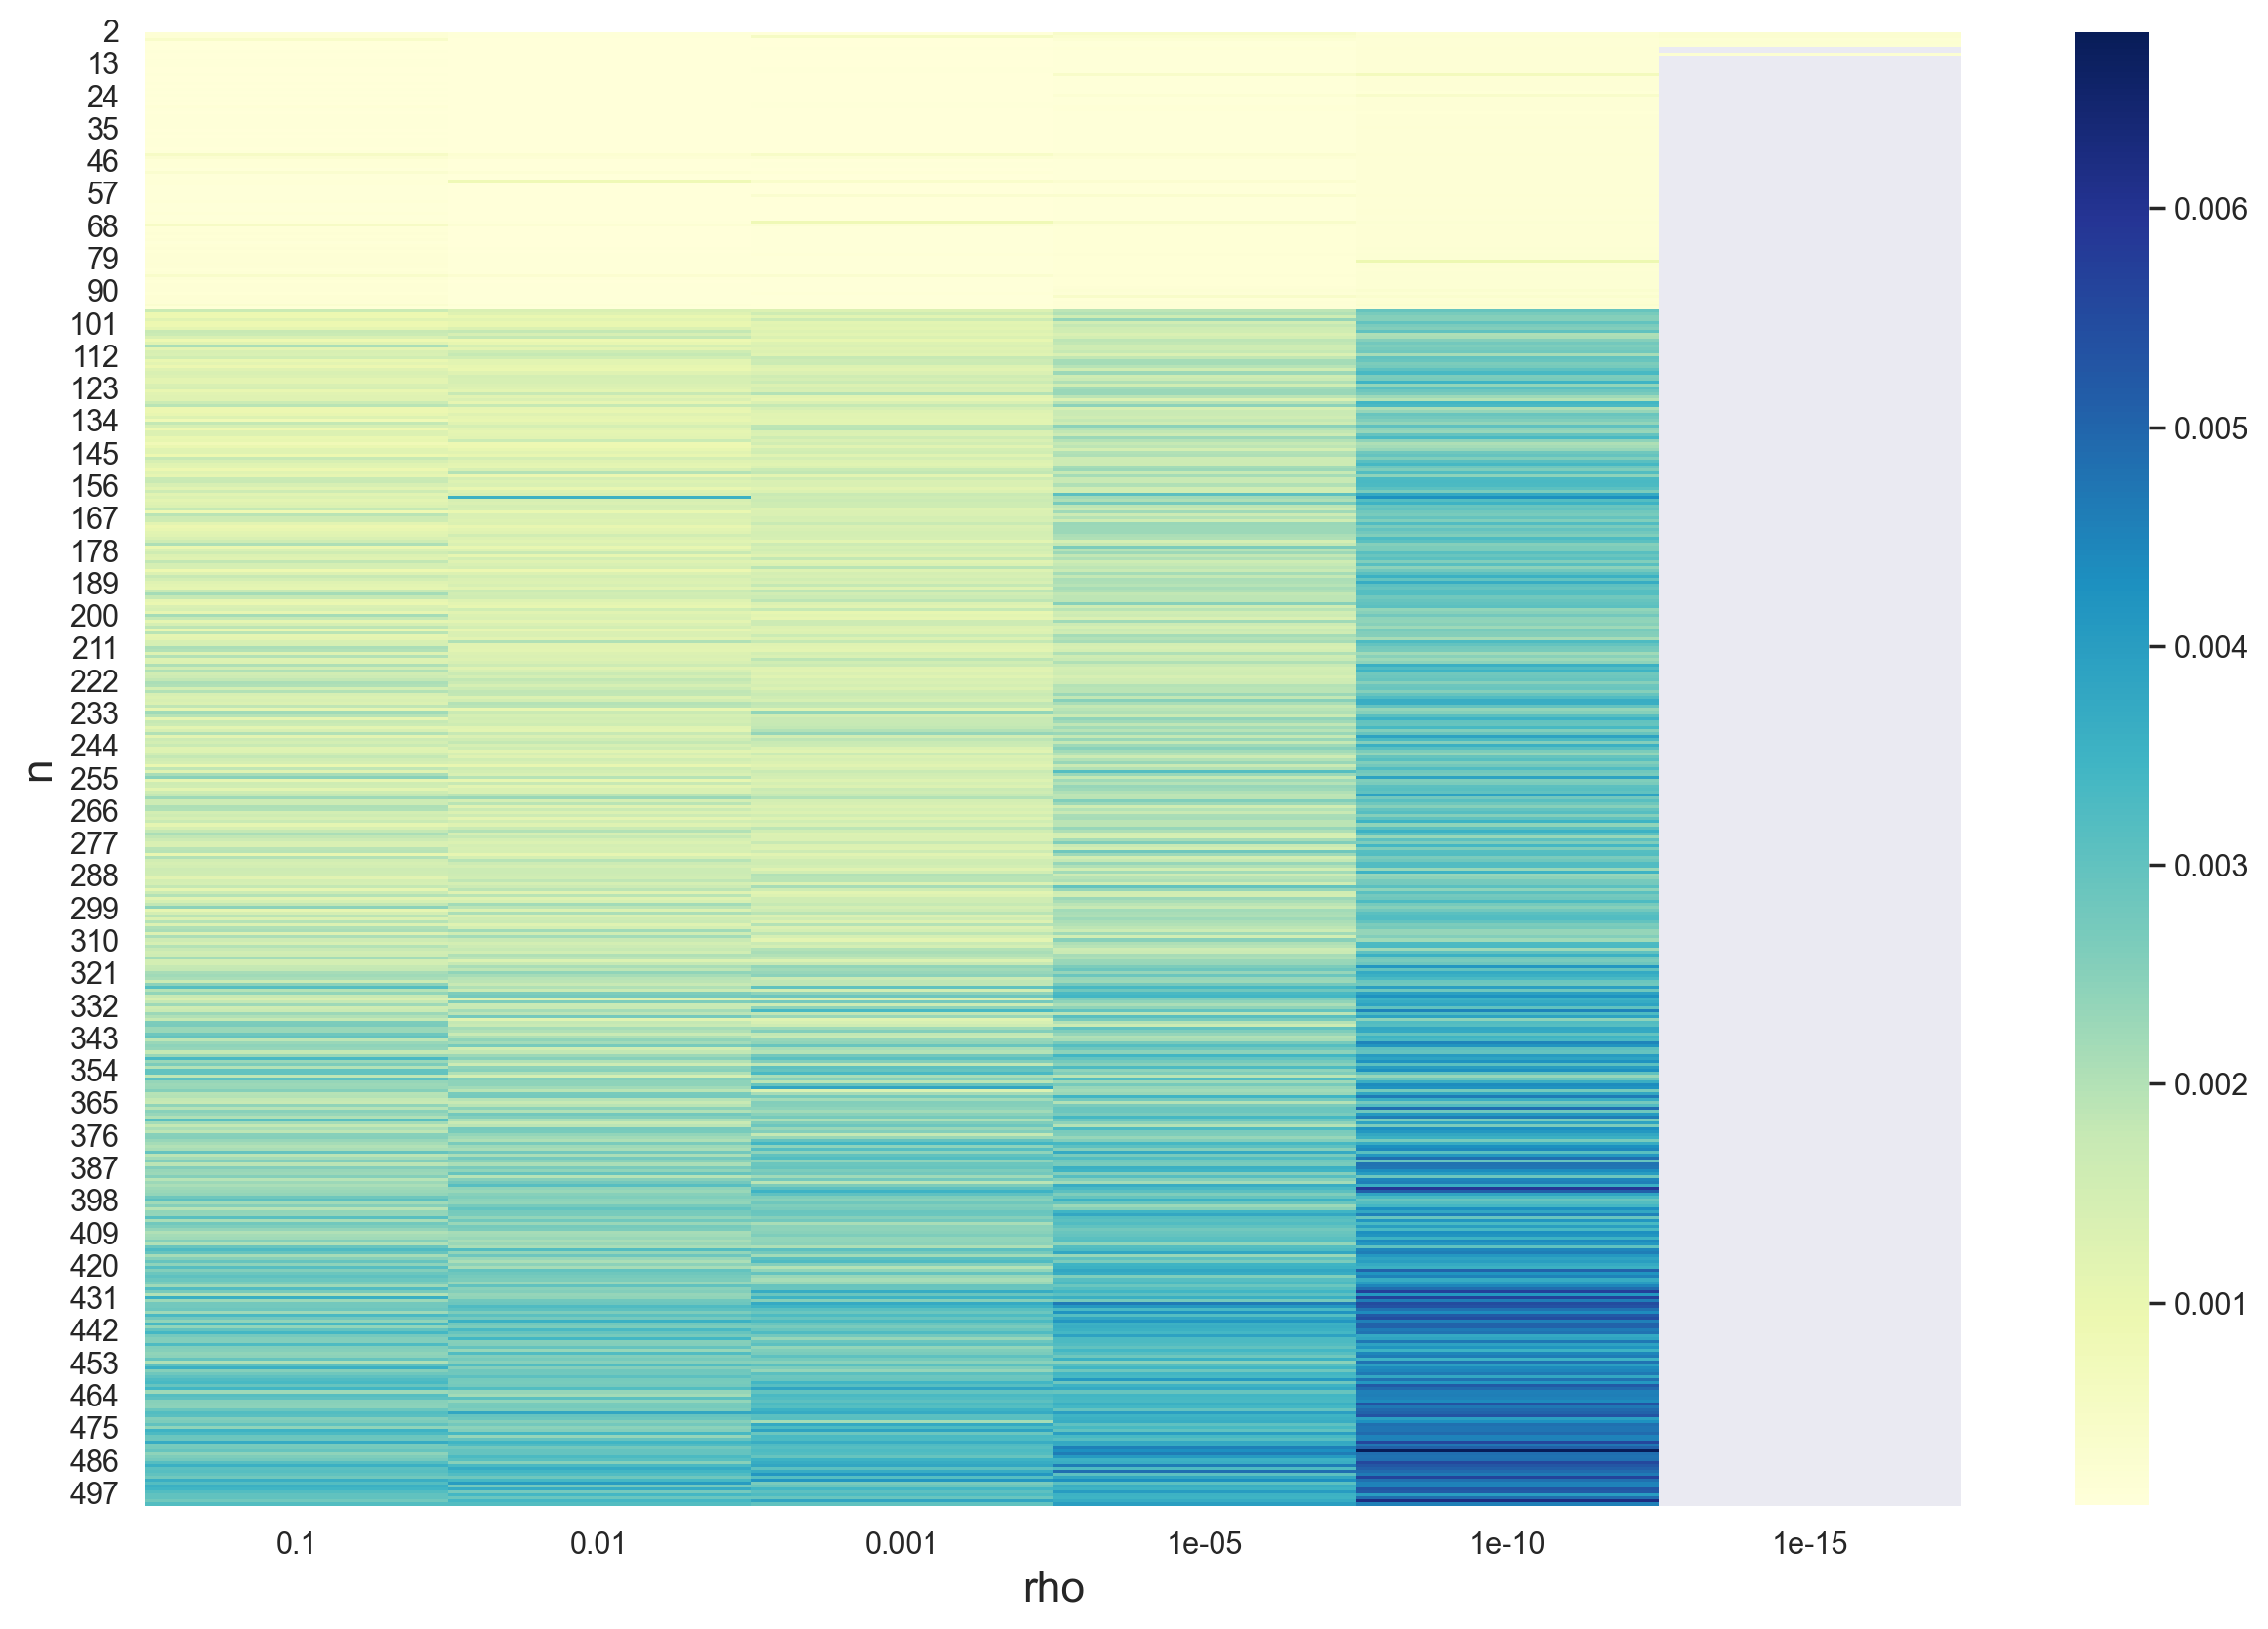

In [51]:
show_heatmap(df_times2, xlabel='rho', ylabel='n', annot=False)

###### Wykres czas√≥w w skali logarytmicznej

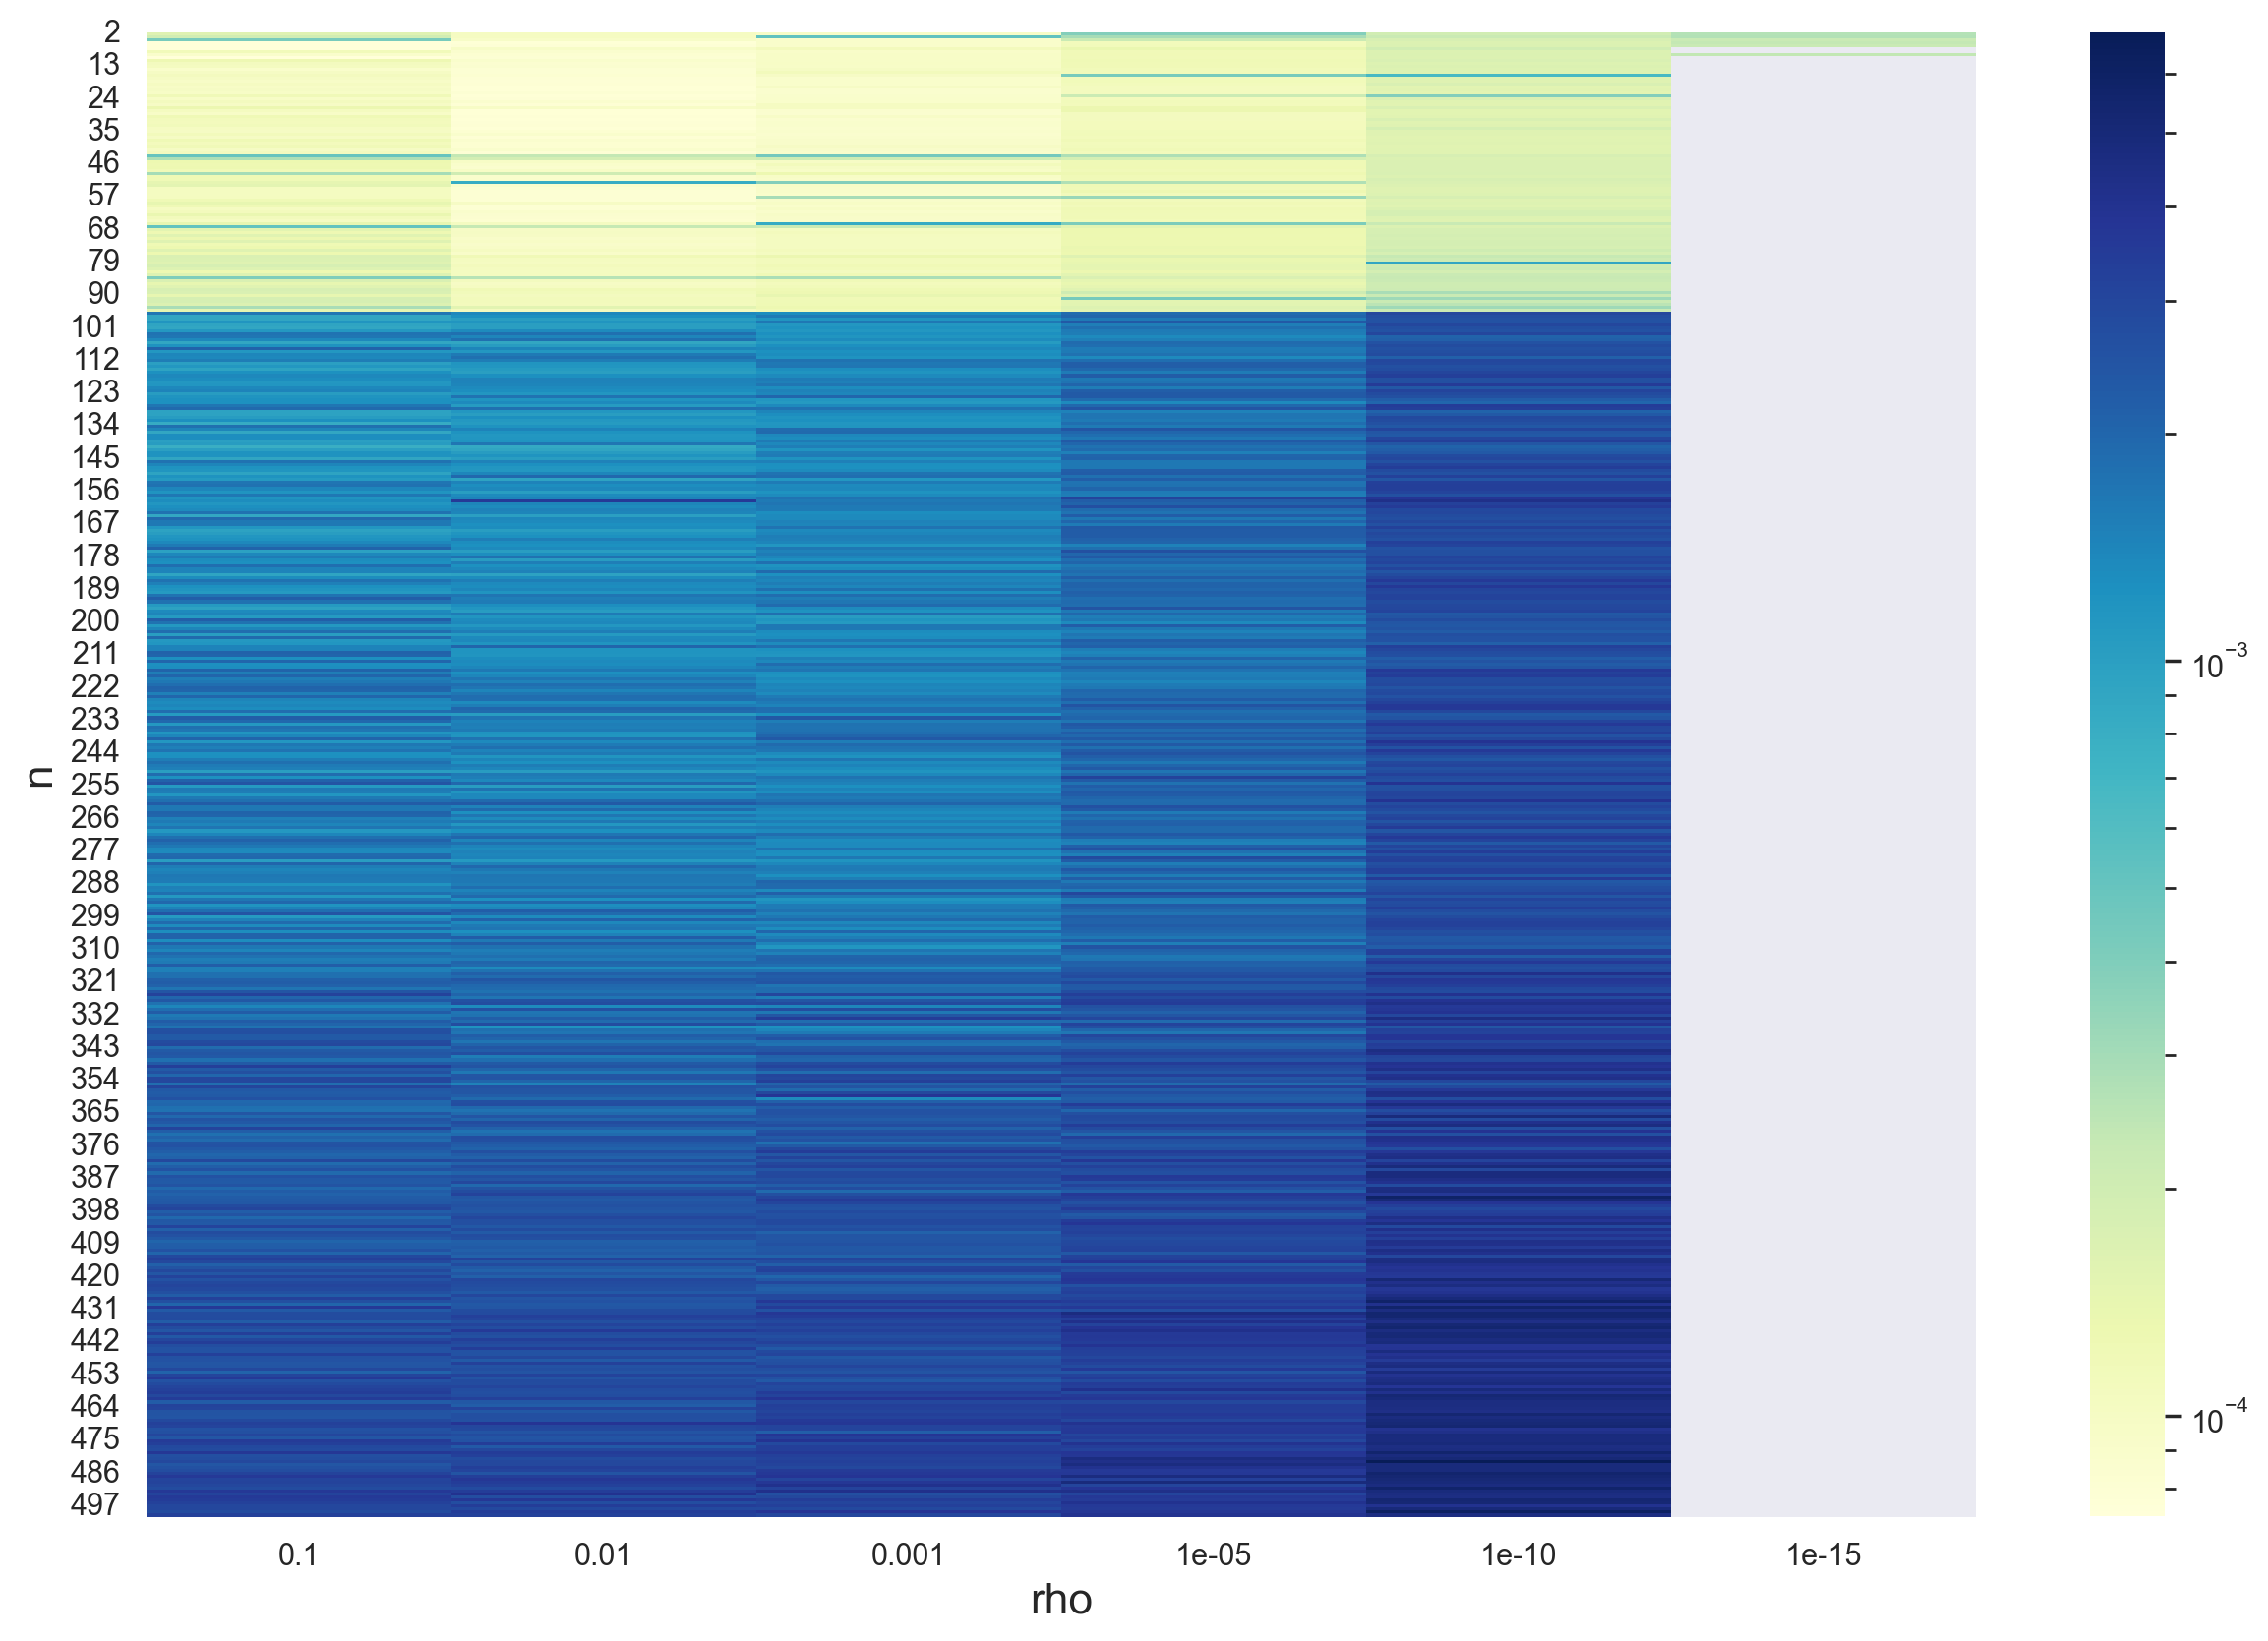

In [52]:
show_heatmap(df_times2, xlabel='rho', ylabel='n', annot=False, norm=LogNorm())

###### B≈Çƒôdy oblicze≈Ñ

In [53]:
df_errors2 = results2['errors']
df_errors2.replace(np.nan, '-')

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000097      0.000009  8.781154e-06  7.257152e-08  4.506165e-13   
3        0.000102      0.000009  8.907753e-07  7.748681e-08  4.887428e-13   
4        0.000108      0.000010  9.255833e-07  8.300271e-08  5.209427e-13   
5        0.000110      0.000010  9.926783e-07  7.976261e-09  5.179087e-13   
6        0.000111      0.000010  9.992201e-07  8.000581e-09  5.196836e-13   
..            ...           ...           ...           ...           ...   
496      0.000351      0.000016  1.858970e-06  8.960966e-09  4.969853e-13   
497      0.000351      0.000016  1.859425e-06  8.961502e-09  4.971956e-13   
498      0.000351      0.000016  1.859877e-06  8.962031e-09  4.973066e-13   
499      0.000351      0.000016  1.860331e-06  8.962565e-09  4.970875e-13   
500      0.000351      0.000016  1.860781e-06  8.963092e-09  4.968354e-13   

    1.000000e-15  
2            0.0  
3            0.0  
4            0.0  
5            0.0  
6            0.0  
..           ...  
496            -  
497            -  
498            -  
499            -  
500            -  

[499 rows x 6 columns]

In [54]:
df_errors2_part = df_errors2.iloc[ns]
df_errors2_part.replace(np.nan, '-').to_excel('zad1-errors2-part.xlsx')
df_errors2_part.replace(np.nan, '-')

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000097      0.000009      0.000009  7.257152e-08  4.506165e-13   
15       0.000131      0.000010      0.000001  8.243482e-09  5.133348e-13   
30       0.000160      0.000010      0.000001  8.364028e-09  5.092709e-13   
45       0.000182      0.000011      0.000001  8.435574e-09  5.072055e-13   
60       0.000200      0.000011      0.000001  8.487832e-09  5.057760e-13   
75       0.000214      0.000012      0.000001  8.530297e-09  5.044959e-13   
90       0.000226      0.000012      0.000001  8.565965e-09  5.037609e-13   
105      0.000236      0.000012      0.000002  8.597169e-09  5.027791e-13   
120      0.000246      0.000013      0.000002  8.624772e-09  5.022372e-13   
135      0.000254      0.000013      0.000002  8.649756e-09  5.018477e-13   
150      0.000261      0.000013      0.000002  8.672473e-09  5.012208e-13   
165      0.000268      0.000013      0.000002  8.693447e-09  5.009126e-13   
180      0.000274      0.000014      0.000002  8.712850e-09  5.003711e-13   
195      0.000280      0.000014      0.000002  8.731000e-09  5.003351e-13   
210      0.000286      0.000014      0.000002  8.747990e-09  5.002644e-13   
225      0.000291      0.000014      0.000002  8.764031e-09  4.996475e-13   
240      0.000296      0.000014      0.000002  8.779178e-09  4.996391e-13   
255      0.000300      0.000015      0.000002  8.793579e-09  4.993007e-13   
270      0.000304      0.000015      0.000002  8.807267e-09  4.989014e-13   
285      0.000308      0.000015      0.000002  8.820353e-09  4.985513e-13   
300      0.000312      0.000015      0.000002  8.832856e-09  4.981485e-13   
315      0.000316      0.000015      0.000002  8.844860e-09  4.979729e-13   
330      0.000320      0.000015      0.000002  8.856379e-09  4.979858e-13   
345      0.000323      0.000015      0.000002  8.867479e-09  4.980160e-13   
360      0.000326      0.000015      0.000002  8.878166e-09  4.978739e-13   
375      0.000329      0.000016      0.000002  8.888495e-09  4.981047e-13   
390      0.000332      0.000016      0.000002  8.898470e-09  4.975252e-13   
405      0.000335      0.000016      0.000002  8.908136e-09  4.975935e-13   
420      0.000338      0.000016      0.000002  8.917493e-09  4.977027e-13   
435      0.000341      0.000016      0.000002  8.926579e-09  4.975126e-13   
450      0.000343      0.000016      0.000002  8.935395e-09  4.974978e-13   
465      0.000346      0.000016      0.000002  8.943972e-09  4.972908e-13   
480      0.000348      0.000016      0.000002  8.952310e-09  4.973773e-13   
495      0.000350      0.000016      0.000002  8.960435e-09  4.971008e-13   
500      0.000351      0.000016      0.000002  8.963092e-09  4.968354e-13   

    1.000000e-15  
2            0.0  
15             -  
30             -  
45             -  
60             -  
75             -  
90             -  
105            -  
120            -  
135            -  
150            -  
165            -  
180            -  
195            -  
210            -  
225            -  
240            -  
255            -  
270            -  
285            -  
300            -  
315            -  
330            -  
345            -  
360            -  
375            -  
390            -  
405            -  
420            -  
435            -  
450            -  
465            -  
480            -  
495            -  
500            -

###### Wykres czas√≥w w skali liniowej

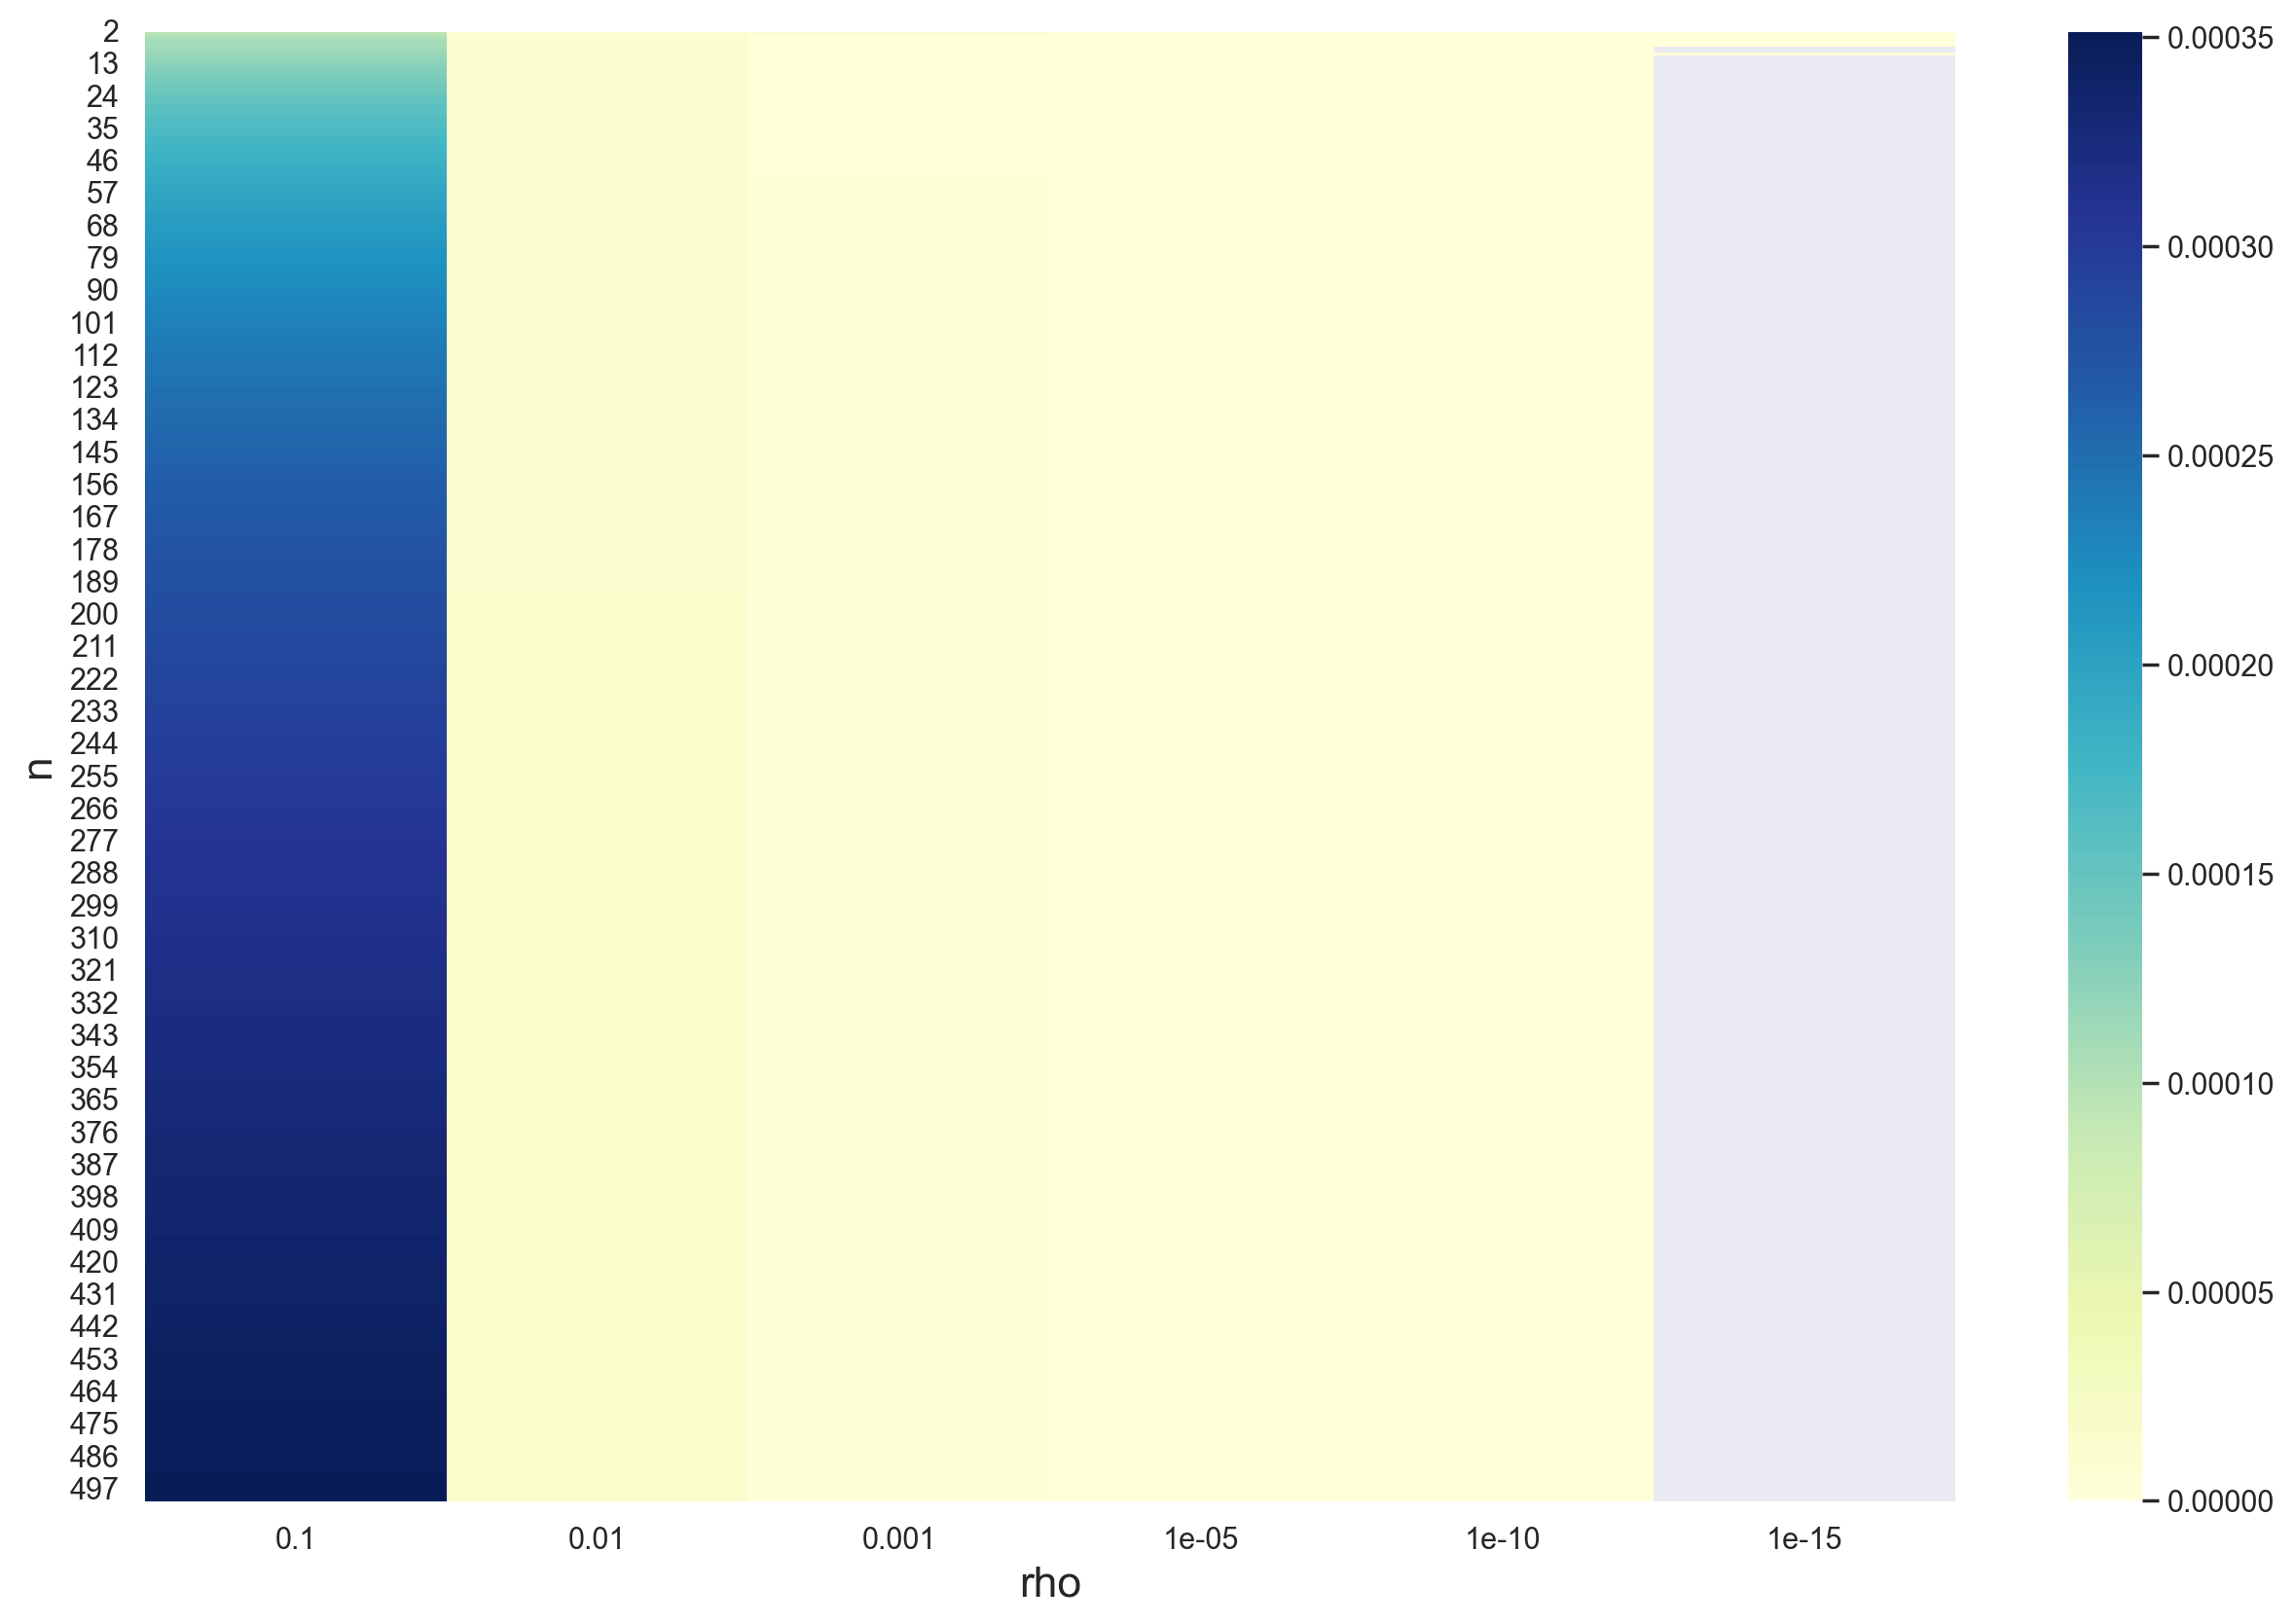

In [55]:
show_heatmap(df_errors2, xlabel='rho', ylabel='n', annot=False)

###### Wykres czas√≥w w skali logarytmicznej

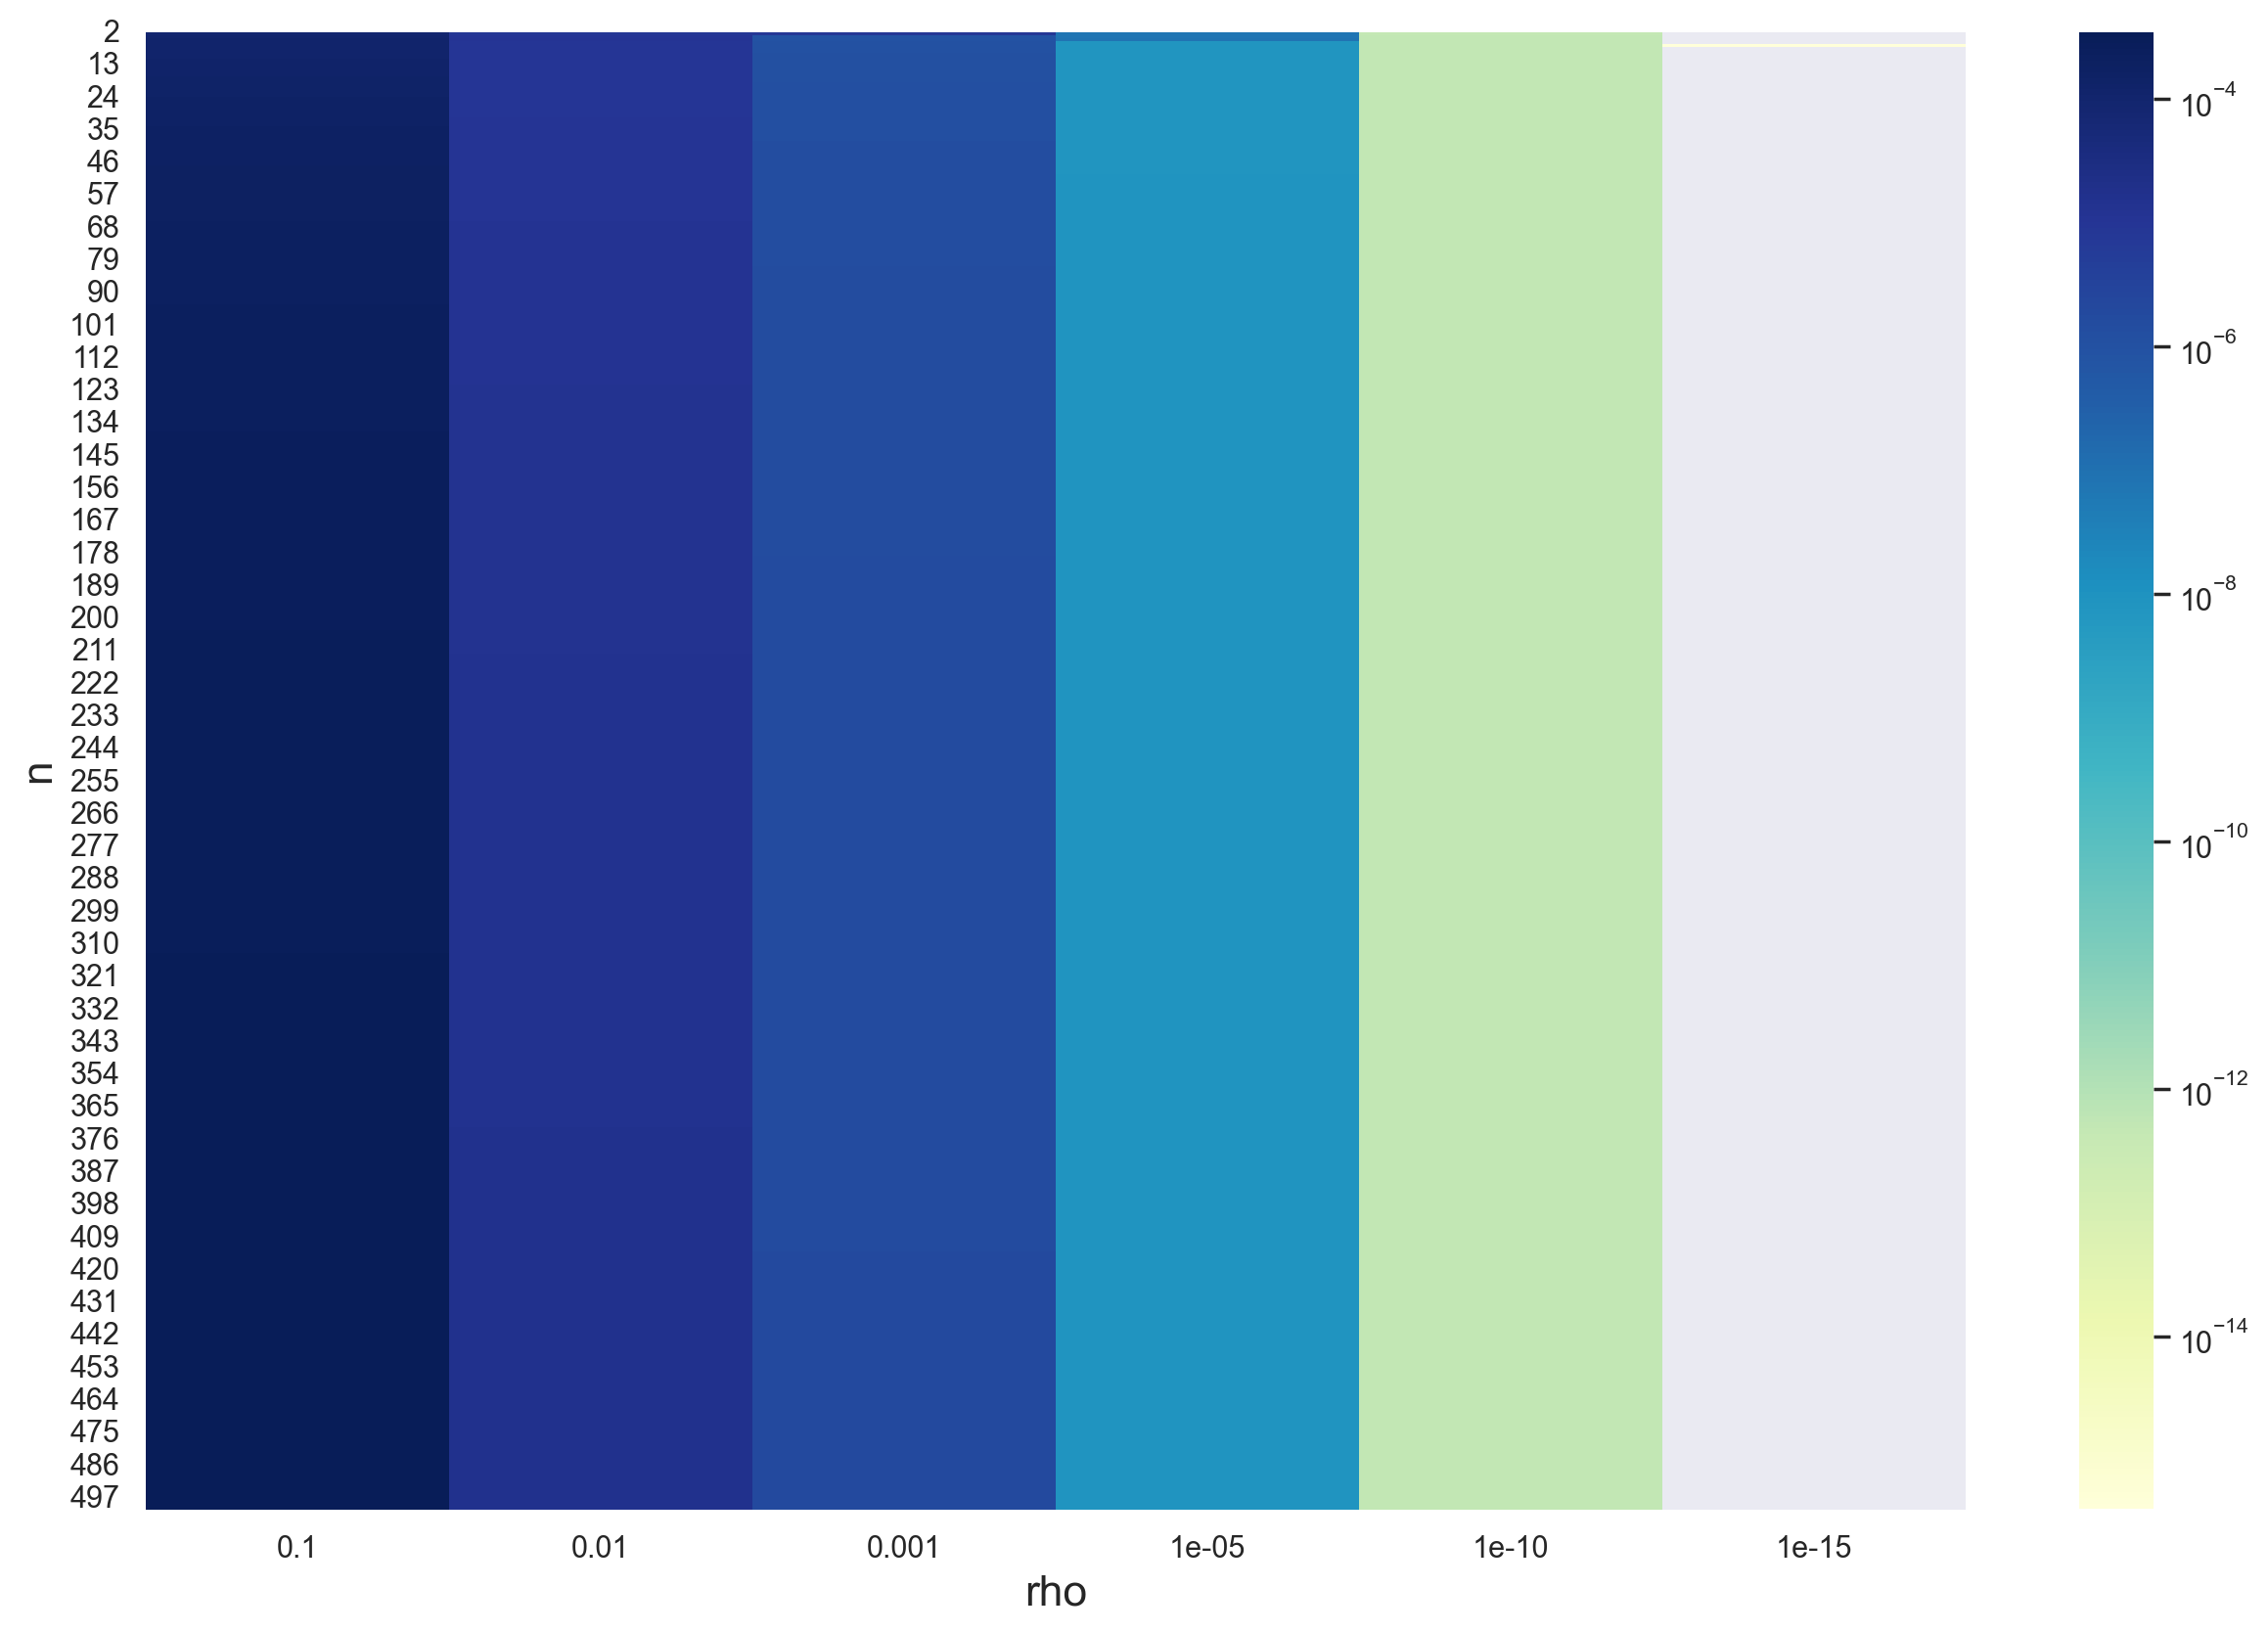

In [56]:
show_heatmap(df_errors2, xlabel='rho', ylabel='n', annot=False, norm=LogNorm())

## Badanie wp≈Çywu wektora poczƒÖtkowego na wyniki oblicze≈Ñ

### Dla 1. kryterium stopu

#### Dla wektora startowego o wsp√≥≈Çrzƒôdnych $10^2$

In [57]:
n_list = list(range(2, 101))
start_vector_fn = lambda _: 10e2
ùúå_list = [1e-1, 1e-2, 1e-3, 1e-5, 1e-10, 1e-15]
stop_criterion = progressive_difference

results = calculate(n_list, ùúå_list, start_vector_fn, stop_criterion)
print_duration(times['total'])

Obliczono uk≈Çady r√≥wna≈Ñ dla 25 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 50 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 75 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 99 warto≈õci n
≈ÅƒÖczny czas wykonania: 00:00:00.280


##### Liczby iteracji

In [58]:
df_iters = results['iters'].applymap(int)
df_iters

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2               6             6             7             9            14   
3               5             6             7             8            12   
4               5             6             7             8            12   
5               5             6             7             8            13   
6               5             6             7             8            13   
..            ...           ...           ...           ...           ...   
96              5             6             7             8            13   
97              5             6             7             8            13   
98              5             6             7             8            13   
99              5             6             7             8            13   
100             5             6             7             8            13   

     1.000000e-15  
2              19  
3              16  
4              16  
5              17  
6              17  
..            ...  
96             17  
97             17  
98             17  
99             17  
100            17  

[99 rows x 6 columns]

In [59]:
min_n = min(n_list)
interval = 10
ns = [0, *range(interval - min_n, len(n_list), interval)]
df_iters_part = df_iters.iloc[ns]
df_iters_part.to_excel('zad1-start-vec-10pow2-iters1.xlsx')
df_iters_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2               6             6             7             9            14   
10              5             6             7             8            13   
20              5             6             7             8            13   
30              5             6             7             8            13   
40              5             6             7             8            13   
50              5             6             7             8            13   
60              5             6             7             8            13   
70              5             6             7             8            13   
80              5             6             7             8            13   
90              5             6             7             8            13   
100             5             6             7             8            13   

     1.000000e-15  
2              19  
10             17  
20             17  
30             17  
40             17  
50             17  
60             17  
70             17  
80             17  
90             17  
100            17

##### Czasy oblicze≈Ñ

In [60]:
df_times = results['times']
df_times

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000150      0.000088      0.000467      0.000119      0.000179   
3        0.000079      0.000088      0.000099      0.000111      0.000157   
4        0.000117      0.000087      0.000092      0.000163      0.000154   
5        0.000077      0.000085      0.000096      0.000105      0.000168   
6        0.000072      0.000081      0.000089      0.000101      0.000158   
..            ...           ...           ...           ...           ...   
96       0.001428      0.000971      0.001071      0.000946      0.001552   
97       0.000958      0.000676      0.000727      0.000806      0.001286   
98       0.001451      0.001094      0.000862      0.000863      0.001877   
99       0.000887      0.000843      0.000985      0.001000      0.001558   
100      0.000753      0.000786      0.000894      0.001168      0.001882   

     1.000000e-15  
2        0.000239  
3        0.000411  
4        0.000193  
5        0.000202  
6        0.000196  
..            ...  
96       0.001960  
97       0.002120  
98       0.002075  
99       0.001925  
100      0.001890  

[99 rows x 6 columns]

In [61]:
df_times_part = df_times.iloc[ns]
df_times_part.to_excel('zad1-start-vec-10pow2-times1.xlsx')
df_times_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000150      0.000088      0.000467      0.000119      0.000179   
10       0.000078      0.000093      0.000106      0.000111      0.000170   
20       0.000066      0.000073      0.000081      0.000096      0.000136   
30       0.000097      0.000135      0.000096      0.000096      0.000145   
40       0.000074      0.000086      0.000087      0.000095      0.000141   
50       0.000073      0.000077      0.000092      0.000096      0.000146   
60       0.000084      0.000072      0.000095      0.000088      0.000140   
70       0.000067      0.000071      0.000078      0.000087      0.000134   
80       0.000106      0.000089      0.000099      0.000103      0.000165   
90       0.000117      0.000093      0.000099      0.000108      0.000162   
100      0.000753      0.000786      0.000894      0.001168      0.001882   

     1.000000e-15  
2        0.000239  
10       0.000215  
20       0.000176  
30       0.000176  
40       0.000180  
50       0.000181  
60       0.000178  
70       0.000166  
80       0.000186  
90       0.000206  
100      0.001890

##### B≈Çƒôdy oblicze≈Ñ

In [62]:
df_errors = results['errors']
df_errors

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000798      0.000798      0.000073  5.997649e-07  3.724026e-12   
3        0.001205      0.000035      0.000003  3.028212e-07  3.524295e-12   
4        0.001289      0.000081      0.000006  3.814340e-07  3.595404e-12   
5        0.001648      0.000094      0.000004  2.399359e-07  2.839823e-13   
6        0.002024      0.000138      0.000008  3.786558e-07  4.819563e-13   
..            ...           ...           ...           ...           ...   
96       0.001498      0.000078      0.000004  2.628884e-07  2.710105e-13   
97       0.001460      0.000075      0.000004  2.586612e-07  2.649094e-13   
98       0.001497      0.000078      0.000004  2.628545e-07  2.708753e-13   
99       0.001459      0.000075      0.000004  2.587139e-07  2.648608e-13   
100      0.001495      0.000078      0.000004  2.628219e-07  2.707491e-13   

     1.000000e-15  
2    0.000000e+00  
3    0.000000e+00  
4    0.000000e+00  
5    0.000000e+00  
6    4.002966e-16  
..            ...  
96   1.820901e-15  
97   1.820901e-15  
98   1.824283e-15  
99   1.897150e-15  
100  1.514142e-15  

[99 rows x 6 columns]

In [63]:
df_errors_part = df_errors.iloc[ns]
df_errors_part.to_excel('zad1-start-vec-10pow2-errors1.xlsx')
df_errors_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000798      0.000798      0.000073  5.997649e-07  3.724026e-12   
10       0.002026      0.000120      0.000006  3.007895e-07  3.991208e-13   
20       0.001771      0.000095      0.000005  2.714497e-07  3.111336e-13   
30       0.001660      0.000088      0.000004  2.670343e-07  2.916252e-13   
40       0.001603      0.000084      0.000004  2.653473e-07  2.831834e-13   
50       0.001567      0.000082      0.000004  2.644524e-07  2.789290e-13   
60       0.001544      0.000080      0.000004  2.638925e-07  2.761898e-13   
70       0.001526      0.000079      0.000004  2.635056e-07  2.740105e-13   
80       0.001514      0.000079      0.000004  2.632200e-07  2.725970e-13   
90       0.001504      0.000078      0.000004  2.629990e-07  2.715393e-13   
100      0.001495      0.000078      0.000004  2.628219e-07  2.707491e-13   

     1.000000e-15  
2    0.000000e+00  
10   3.330669e-16  
20   4.154074e-16  
30   5.978734e-16  
40   5.324443e-16  
50   7.021667e-16  
60   1.174950e-15  
70   9.420555e-16  
80   1.395529e-15  
90   1.612692e-15  
100  1.514142e-15

#### Dla wektora startowego o wsp√≥≈Çrzƒôdnych $10^5$

In [64]:
start_vector_fn = lambda _: 10e5
results = calculate(n_list, ùúå_list, start_vector_fn, stop_criterion)
print_duration(times['total'])

Obliczono uk≈Çady r√≥wna≈Ñ dla 25 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 50 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 75 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 99 warto≈õci n
≈ÅƒÖczny czas wykonania: 00:00:00.336


##### Liczby iteracji

In [65]:
df_iters = results['iters']
df_iters

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2               8             9            10            12            17   
3               7             8             9            11            15   
4               7             8             9            11            15   
5               7             8             9            11            15   
6               8             8             9            11            15   
..            ...           ...           ...           ...           ...   
96              7             8             9            11            15   
97              7             8             9            11            15   
98              7             8             9            11            15   
99              7             8             9            11            15   
100             7             8             9            11            15   

     1.000000e-15  
2              22  
3              19  
4              19  
5              19  
6              19  
..            ...  
96             19  
97             19  
98             19  
99             19  
100            19  

[99 rows x 6 columns]

In [66]:
df_iters_part = df_iters.iloc[ns]
df_iters_part.to_excel('zad1-start-vec-10pow5-iters1.xlsx')
df_iters_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2               8             9            10            12            17   
10              8             8             9            11            15   
20              7             8             9            11            15   
30              7             8             9            11            15   
40              7             8             9            11            15   
50              7             8             9            11            15   
60              7             8             9            11            15   
70              7             8             9            11            15   
80              7             8             9            11            15   
90              7             8             9            11            15   
100             7             8             9            11            15   

     1.000000e-15  
2              22  
10             19  
20             19  
30             19  
40             19  
50             19  
60             19  
70             19  
80             19  
90             19  
100            19

##### Czasy oblicze≈Ñ

In [67]:
df_times = results['times']
df_times

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000311      0.000170      0.000163      0.000452      0.000305   
3        0.000145      0.000322      0.000165      0.000184      0.000226   
4        0.000123      0.000150      0.000120      0.000138      0.000181   
5        0.000142      0.000135      0.000146      0.000289      0.000294   
6        0.000268      0.000175      0.000153      0.000173      0.000427   
..            ...           ...           ...           ...           ...   
96       0.001528      0.001423      0.001237      0.001344      0.001548   
97       0.001043      0.001579      0.001216      0.001283      0.001666   
98       0.001337      0.001367      0.001211      0.001380      0.001643   
99       0.001693      0.001150      0.001277      0.001280      0.001590   
100      0.001313      0.001369      0.001031      0.001180      0.001553   

     1.000000e-15  
2        0.000603  
3        0.000279  
4        0.000306  
5        0.000448  
6        0.000332  
..            ...  
96       0.002176  
97       0.002414  
98       0.002516  
99       0.002370  
100      0.002348  

[99 rows x 6 columns]

In [68]:
df_times_part = df_times.iloc[ns]
df_times_part.to_excel('zad1-start-vec-10pow5-times1.xlsx')
df_times_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000311      0.000170      0.000163      0.000452      0.000305   
10       0.000123      0.000110      0.000121      0.000145      0.000188   
20       0.000111      0.000113      0.000123      0.000145      0.000189   
30       0.000144      0.000186      0.000178      0.000206      0.000269   
40       0.000108      0.000161      0.000177      0.000153      0.000198   
50       0.000187      0.000122      0.000132      0.000155      0.000195   
60       0.000157      0.000119      0.000128      0.000163      0.000196   
70       0.000118      0.000120      0.000133      0.000153      0.000197   
80       0.000117      0.000113      0.000123      0.000145      0.000189   
90       0.000131      0.000111      0.000122      0.000129      0.000174   
100      0.001313      0.001369      0.001031      0.001180      0.001553   

     1.000000e-15  
2        0.000603  
10       0.000300  
20       0.000237  
30       0.000317  
40       0.000375  
50       0.000242  
60       0.000242  
70       0.000559  
80       0.000233  
90       0.000207  
100      0.002348

##### B≈Çƒôdy oblicze≈Ñ

In [69]:
df_errors = results['errors']
df_errors

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.006597      0.000600      0.000055  4.506120e-07  2.798062e-12   
3        0.002954      0.000300      0.000018  2.934443e-08  3.347476e-13   
4        0.005676      0.000384      0.000024  7.005998e-08  9.498587e-13   
5        0.004321      0.000239      0.000023  1.233666e-07  2.107113e-12   
6        0.000381      0.000381      0.000021  1.398729e-07  1.480272e-12   
..            ...           ...           ...           ...           ...   
96       0.003793      0.000261      0.000023  1.063953e-07  1.838563e-12   
97       0.003681      0.000257      0.000023  1.032292e-07  1.802792e-12   
98       0.003789      0.000261      0.000023  1.062986e-07  1.838098e-12   
99       0.003679      0.000257      0.000023  1.031993e-07  1.802822e-12   
100      0.003786      0.000261      0.000023  1.062057e-07  1.837693e-12   

     1.000000e-15  
2    0.000000e+00  
3    0.000000e+00  
4    0.000000e+00  
5    0.000000e+00  
6    4.154074e-16  
..            ...  
96   1.824283e-15  
97   1.820901e-15  
98   1.827658e-15  
99   1.897150e-15  
100  1.514142e-15  

[99 rows x 6 columns]

In [70]:
df_errors_part = df_errors.iloc[ns]
df_errors_part.to_excel('zad1-start-vec-10pow5-errors1.xlsx')
df_errors_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.006597      0.000600      0.000055  4.506120e-07  2.798062e-12   
10       0.000301      0.000301      0.000024  1.463140e-07  1.938397e-12   
20       0.004631      0.000270      0.000024  1.247593e-07  1.926941e-12   
30       0.004238      0.000266      0.000024  1.169768e-07  1.895885e-12   
40       0.004064      0.000264      0.000024  1.130996e-07  1.876749e-12   
50       0.003966      0.000263      0.000024  1.107871e-07  1.864372e-12   
60       0.003904      0.000262      0.000024  1.092529e-07  1.855648e-12   
70       0.003861      0.000262      0.000023  1.081612e-07  1.849536e-12   
80       0.003829      0.000262      0.000023  1.073449e-07  1.844433e-12   
90       0.003805      0.000261      0.000023  1.067115e-07  1.840573e-12   
100      0.003786      0.000261      0.000023  1.062057e-07  1.837693e-12   

     1.000000e-15  
2    0.000000e+00  
10   3.510833e-16  
20   4.154074e-16  
30   5.874748e-16  
40   5.324443e-16  
50   7.364386e-16  
60   1.174950e-15  
70   9.420555e-16  
80   1.395529e-15  
90   1.627907e-15  
100  1.514142e-15

#### Dla wektora startowego o wsp√≥≈Çrzƒôdnych $10^{20}$

In [71]:
start_vector_fn = lambda _: 10e20
results = calculate(n_list, ùúå_list, start_vector_fn, stop_criterion)
print_duration(times['total'])

Obliczono uk≈Çady r√≥wna≈Ñ dla 25 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 50 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 75 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 99 warto≈õci n
≈ÅƒÖczny czas wykonania: 00:00:00.528


##### Liczby iteracji

In [72]:
df_iters = results['iters']
df_iters

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2              23            24            25            27            31   
3              20            20            21            23            27   
4              20            21            21            23            27   
5              20            21            22            24            28   
6              20            21            22            23            28   
..            ...           ...           ...           ...           ...   
96             20            21            22            23            28   
97             20            21            22            23            28   
98             20            21            22            23            28   
99             20            21            22            23            28   
100            20            21            22            23            28   

     1.000000e-15  
2              36  
3              31  
4              31  
5              32  
6              32  
..            ...  
96             32  
97             32  
98             32  
99             32  
100            32  

[99 rows x 6 columns]

In [73]:
df_iters_part = df_iters.iloc[ns]
df_iters_part.to_excel('zad1-start-vec-10pow20-iters1.xlsx')
df_iters_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2              23            24            25            27            31   
10             20            21            22            24            28   
20             20            21            22            24            28   
30             20            21            22            24            28   
40             20            21            22            24            28   
50             20            21            22            24            28   
60             20            21            22            24            28   
70             20            21            22            24            28   
80             20            21            22            23            28   
90             20            21            22            23            28   
100            20            21            22            23            28   

     1.000000e-15  
2              36  
10             32  
20             32  
30             32  
40             32  
50             32  
60             32  
70             32  
80             32  
90             32  
100            32

##### Czasy oblicze≈Ñ

In [74]:
df_times = results['times']
df_times

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.002977      0.000291      0.000310      0.000298      0.000336   
3        0.000234      0.000223      0.000233      0.000261      0.000301   
4        0.000236      0.000239      0.000242      0.000262      0.000310   
5        0.000235      0.000254      0.000254      0.000276      0.000503   
6        0.000235      0.000258      0.000262      0.000263      0.000331   
..            ...           ...           ...           ...           ...   
96       0.002660      0.003229      0.003192      0.003225      0.004228   
97       0.002984      0.003132      0.003011      0.004012      0.003554   
98       0.002586      0.002464      0.002561      0.002680      0.004157   
99       0.002225      0.002341      0.002955      0.002740      0.003828   
100      0.002661      0.002784      0.002649      0.003109      0.003514   

     1.000000e-15  
2        0.000444  
3        0.000339  
4        0.000351  
5        0.000372  
6        0.000364  
..            ...  
96       0.004411  
97       0.003992  
98       0.003801  
99       0.003802  
100      0.003857  

[99 rows x 6 columns]

In [75]:
df_times_part = df_times.iloc[ns]
df_times_part.to_excel('zad1-start-vec-10pow20-times1.xlsx')
df_times_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.002977      0.000291      0.000310      0.000298      0.000336   
10       0.000272      0.000278      0.000267      0.000286      0.000352   
20       0.000245      0.000248      0.000299      0.000283      0.000325   
30       0.000285      0.000262      0.000257      0.000278      0.000329   
40       0.000246      0.000243      0.000253      0.000291      0.000316   
50       0.000268      0.000249      0.000251      0.000273      0.000325   
60       0.000329      0.000270      0.000269      0.000289      0.000346   
70       0.000344      0.000305      0.000288      0.000307      0.000387   
80       0.001109      0.000372      0.000335      0.000337      0.000411   
90       0.000426      0.000344      0.000358      0.000370      0.000439   
100      0.002661      0.002784      0.002649      0.003109      0.003514   

     1.000000e-15  
2        0.000444  
10       0.000491  
20       0.000389  
30       0.000363  
40       0.000362  
50       0.000362  
60       0.000382  
70       0.000408  
80       0.000469  
90       0.000481  
100      0.003857

##### B≈Çƒôdy oblicze≈Ñ

In [76]:
df_errors = results['errors']
df_errors

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.001579      0.000144      0.000013  1.078729e-07  7.367894e-12   
3        0.000425      0.000425      0.000044  1.004800e-07  1.727507e-12   
4        0.000527      0.000033      0.000033  1.563366e-07  1.450529e-12   
5        0.002218      0.000180      0.000011  2.607543e-08  7.880054e-13   
6        0.001479      0.000108      0.000009  6.563340e-07  6.490689e-13   
..            ...           ...           ...           ...           ...   
96       0.001756      0.000142      0.000009  5.036258e-07  6.685069e-13   
97       0.001728      0.000139      0.000009  4.869033e-07  6.491605e-13   
98       0.001756      0.000142      0.000009  5.030691e-07  6.680922e-13   
99       0.001729      0.000139      0.000009  4.867052e-07  6.492119e-13   
100      0.001756      0.000142      0.000009  5.025350e-07  6.673411e-13   

     1.000000e-15  
2    0.000000e+00  
3    0.000000e+00  
4    0.000000e+00  
5    0.000000e+00  
6    4.002966e-16  
..            ...  
96   1.820901e-15  
97   1.820901e-15  
98   1.824283e-15  
99   1.897150e-15  
100  1.514142e-15  

[99 rows x 6 columns]

In [77]:
df_errors = df_errors.iloc[ns]
df_errors.to_excel('zad1-start-vec-10pow20-errors1.xlsx')
df_errors

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.001579      0.000144      0.000013  1.078729e-07  7.367894e-12   
10       0.001765      0.000157      0.000012  3.900750e-08  9.073733e-13   
20       0.001777      0.000152      0.000011  2.936779e-08  7.797374e-13   
30       0.001772      0.000148      0.000010  2.678202e-08  7.328917e-13   
40       0.001768      0.000146      0.000010  2.561790e-08  7.094777e-13   
50       0.001764      0.000145      0.000010  2.496038e-08  6.955093e-13   
60       0.001762      0.000144      0.000010  2.453896e-08  6.861763e-13   
70       0.001760      0.000143      0.000010  2.424619e-08  6.794222e-13   
80       0.001758      0.000143      0.000009  5.091043e-07  6.744833e-13   
90       0.001757      0.000143      0.000009  5.054474e-07  6.706775e-13   
100      0.001756      0.000142      0.000009  5.025350e-07  6.673411e-13   

     1.000000e-15  
2    0.000000e+00  
10   3.330669e-16  
20   4.154074e-16  
30   6.377746e-16  
40   5.324443e-16  
50   7.021667e-16  
60   1.174950e-15  
70   9.420555e-16  
80   1.391105e-15  
90   1.612692e-15  
100  1.514142e-15

#### Dla ustalonej warto≈õci $n$

##### Obliczenia

In [78]:
n = 100
ùúå_list = [1e-1, 1e-2, 1e-3, 1e-5, 1e-10, 1e-15]
stop_criterion = progressive_difference
start_vector_values = list(map(lambda exp: 10 ** exp, range(21)))
results = {
    'iters': [],
    'times': [],
    'errors': [],
    'vectors': []
}

for a in start_vector_values:
    result = calculate([n], ùúå_list, lambda _: a, stop_criterion)
    for key, val in result.items():
        results[key].append(list(val.iloc[0]))

Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n


##### Liczby iteracji w zale≈ºno≈õci od warto≈õci wsp√≥≈Çrzƒôdnych wektora poczƒÖtkowego oraz $\rho$

In [79]:
df_iters = pd.DataFrame(results['iters'], index=start_vector_values, columns=ùúå_list)
df_iters

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  \
1                                 3             4             5             7   
10                                4             4             5             7   
100                               4             5             6             7   
1000                              5             6             7             8   
10000                             6             7             7             9   
100000                            7             7             8            10   
1000000                           7             8             9            11   
10000000                          8             9            10            12   
100000000                         9            10            11            13   
1000000000                       10            11            12            13   
10000000000                      11            12            13            14   
100000000000                     12            13            13            15   
1000000000000                    13            13            14            16   
10000000000000                   13            14            15            17   
100000000000000                  14            15            16            18   
1000000000000000                 15            16            17            18   
10000000000000000                16            17            18            19   
100000000000000000               17            18            18            20   
1000000000000000000              18            18            19            21   
10000000000000000000             18            19            20            22   
100000000000000000000            19            20            21            23   

                       1.000000e-10  1.000000e-15  
1                                11            16  
10                               11            16  
100                              12            16  
1000                             13            17  
10000                            13            18  
100000                           14            18  
1000000                          15            19  
10000000                         16            20  
100000000                        17            21  
1000000000                       18            22  
10000000000                      18            23  
100000000000                     19            23  
1000000000000                    20            24  
10000000000000                   21            25  
100000000000000                  22            26  
1000000000000000                 23            27  
10000000000000000                23            28  
100000000000000000               24            29  
1000000000000000000              25            29  
10000000000000000000             26            30  
100000000000000000000            27            31

In [80]:
df_iters.to_excel('zad1-start-vec-const-n-iters1.xlsx')

##### Czasy oblicze≈Ñ w zale≈ºno≈õci od warto≈õci wsp√≥≈Çrzƒôdnych wektora poczƒÖtkowego oraz $\rho$

In [81]:
df_times = pd.DataFrame(results['times'], index=start_vector_values, columns=ùúå_list)
df_times

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  \
1                          0.000932      0.000715      0.001395      0.001681   
10                         0.001454      0.000637      0.000784      0.000977   
100                        0.000809      0.000715      0.000915      0.000993   
1000                       0.001073      0.001110      0.001128      0.001332   
10000                      0.001354      0.001024      0.001192      0.001567   
100000                     0.001527      0.000946      0.001096      0.001403   
1000000                    0.001491      0.001172      0.001222      0.001587   
10000000                   0.001643      0.001188      0.001434      0.001558   
100000000                  0.001403      0.001236      0.001459      0.001727   
1000000000                 0.001791      0.001809      0.001575      0.001539   
10000000000                0.001805      0.001930      0.001868      0.001995   
100000000000               0.002242      0.001867      0.001636      0.002623   
1000000000000              0.002224      0.002056      0.002450      0.002082   
10000000000000             0.003742      0.002017      0.002306      0.002904   
100000000000000            0.002635      0.002412      0.002153      0.002305   
1000000000000000           0.002742      0.002201      0.002522      0.002594   
10000000000000000          0.002463      0.002307      0.002426      0.002471   
100000000000000000         0.003269      0.002437      0.002599      0.002818   
1000000000000000000        0.002925      0.002443      0.002284      0.002754   
10000000000000000000       0.002292      0.002050      0.002733      0.003018   
100000000000000000000      0.002549      0.002802      0.002200      0.002947   

                       1.000000e-10  1.000000e-15  
1                          0.001900      0.002403  
10                         0.001599      0.002353  
100                        0.001878      0.002271  
1000                       0.001746      0.002299  
10000                      0.002014      0.002655  
100000                     0.002048      0.002763  
1000000                    0.002115      0.002703  
10000000                   0.001893      0.002849  
100000000                  0.001953      0.002398  
1000000000                 0.002522      0.002820  
10000000000                0.002931      0.003509  
100000000000               0.002641      0.003315  
1000000000000              0.002820      0.003514  
10000000000000             0.002947      0.004108  
100000000000000            0.002868      0.003331  
1000000000000000           0.003151      0.003692  
10000000000000000          0.003096      0.003755  
100000000000000000         0.003160      0.003868  
1000000000000000000        0.002847      0.003643  
10000000000000000000       0.003714      0.003606  
100000000000000000000      0.003082      0.003534

In [82]:
df_times.to_excel('zad1-start-vec-const-n-times1.xlsx')

##### B≈Çƒôdy oblicze≈Ñ w zale≈ºno≈õci od warto≈õci wsp√≥≈Çrzƒôdnych wektora poczƒÖtkowego oraz $\rho$

In [83]:
df_errors = pd.DataFrame(results['errors'], index=start_vector_values, columns=ùúå_list)
df_errors

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  \
1                          0.002146      0.000218      0.000011  8.014370e-08   
10                         0.000165      0.000165      0.000014  7.888042e-08   
100                        0.001984      0.000144      0.000007  3.632005e-07   
1000                       0.001495      0.000078      0.000004  2.628219e-07   
10000                      0.000785      0.000038      0.000038  2.331289e-07   
100000                     0.000379      0.000379      0.000026  1.746349e-07   
1000000                    0.003786      0.000261      0.000023  1.062057e-07   
10000000                   0.002613      0.000233      0.000017  5.300473e-08   
100000000                  0.002335      0.000175      0.000011  2.665686e-08   
1000000000                 0.001746      0.000106      0.000005  2.665686e-07   
10000000000                0.001062      0.000053      0.000003  2.150025e-07   
100000000000               0.000530      0.000027      0.000027  1.837601e-07   
1000000000000              0.000267      0.000267      0.000022  1.293015e-07   
10000000000000             0.002666      0.000215      0.000018  7.376449e-08   
100000000000000            0.002150      0.000184      0.000013  3.523722e-08   
1000000000000000           0.001838      0.000129      0.000007  3.523722e-07   
10000000000000000          0.001293      0.000074      0.000004  2.009167e-07   
100000000000000000         0.000738      0.000035      0.000035  1.755722e-07   
1000000000000000000        0.000352      0.000352      0.000020  1.422459e-07   
10000000000000000000       0.003524      0.000201      0.000018  9.381773e-08   
100000000000000000000      0.002009      0.000176      0.000014  5.025350e-08   

                       1.000000e-10  1.000000e-15  
1                      6.143344e-12  1.518207e-15  
10                     5.766105e-12  1.518207e-15  
100                    7.922295e-13  1.518207e-15  
1000                   2.707491e-13  1.514142e-15  
10000                  2.665917e-12  1.514142e-15  
100000                 2.148803e-12  1.514142e-15  
1000000                1.837693e-12  1.514142e-15  
10000000               1.293183e-12  1.514142e-15  
100000000              7.376605e-13  1.514142e-15  
1000000000             3.524571e-13  1.514142e-15  
10000000000            3.523754e-12  1.514142e-15  
100000000000           2.009318e-12  1.514142e-15  
1000000000000          1.755641e-12  1.514142e-15  
10000000000000         1.422554e-12  1.514142e-15  
100000000000000        9.379594e-13  1.514142e-15  
1000000000000000       5.026836e-13  1.514142e-15  
10000000000000000      5.025499e-12  1.514142e-15  
100000000000000000     2.373726e-12  1.514142e-15  
1000000000000000000    1.594429e-12  1.514142e-15  
10000000000000000000   1.416587e-12  1.514142e-15  
100000000000000000000  1.079296e-12  1.514142e-15

In [84]:
df_errors.to_excel('zad1-start-vec-const-n-errors1.xlsx')

### Dla 2. kryterium stopu

#### Dla wektora startowego o wsp√≥≈Çrzƒôdnych $10^2$

In [120]:
n_list = list(range(2, 101))
start_vector_fn = lambda _: 10e2
ùúå_list = [1e-1, 1e-2, 1e-3, 1e-5, 1e-10, 1e-15]
stop_criterion = solution_difference

results = calculate(n_list, ùúå_list, start_vector_fn, stop_criterion)
print_duration(times['total'])

Obliczono uk≈Çady r√≥wna≈Ñ dla 25 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 50 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 75 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 99 warto≈õci n
≈ÅƒÖczny czas wykonania: 00:00:02.304


##### Liczby iteracji

In [124]:
df_iters = results['iters'].replace(-1, '-')
df_iters

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2               7             7             8            10            15   
3               6             7             7             9            13   
4               6             7             7             9            13   
5               6             7             8             9            13   
6               6             7             8             9            14   
..            ...           ...           ...           ...           ...   
96              6             7             7             9            13   
97              6             7             7             9            13   
98              6             7             7             9            13   
99              6             7             7             9            13   
100             6             7             7             9            13   

    1.000000e-15  
2             20  
3             17  
4             17  
5             18  
6             18  
..           ...  
96             -  
97             -  
98             -  
99             -  
100            -  

[99 rows x 6 columns]

In [125]:
min_n = min(n_list)
interval = 10
ns = [0, *range(interval - min_n, len(n_list), interval)]
df_iters_part = df_iters.iloc[ns]
df_iters_part.to_excel('zad1-start-vec-10pow2-iters2.xlsx')
df_iters_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2               7             7             8            10            15   
10              6             7             8             9            13   
20              6             7             8             9            13   
30              6             7             8             9            13   
40              6             7             7             9            13   
50              6             7             7             9            13   
60              6             7             7             9            13   
70              6             7             7             9            13   
80              6             7             7             9            13   
90              6             7             7             9            13   
100             6             7             7             9            13   

    1.000000e-15  
2             20  
10             -  
20             -  
30             -  
40             -  
50             -  
60             -  
70             -  
80             -  
90             -  
100            -

##### Czasy oblicze≈Ñ

In [127]:
df_times = results['times'].replace(np.nan, '-')
df_times

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000325      0.000258      0.000176      0.000254      0.000195   
3        0.000088      0.000092      0.000101      0.000149      0.000172   
4        0.000085      0.000093      0.000094      0.000122      0.000161   
5        0.000087      0.000094      0.000104      0.000115      0.000193   
6        0.000095      0.000103      0.000118      0.000126      0.000194   
..            ...           ...           ...           ...           ...   
96       0.001671      0.001782      0.001739      0.001930      0.002423   
97       0.002439      0.001745      0.001542      0.001919      0.002957   
98       0.001851      0.001928      0.001344      0.001621      0.002732   
99       0.001351      0.001548      0.001547      0.001830      0.002390   
100      0.001584      0.001426      0.001068      0.001357      0.002284   

    1.000000e-15  
2       0.000261  
3       0.000202  
4       0.000237  
5       0.000244  
6       0.000233  
..           ...  
96             -  
97             -  
98             -  
99             -  
100            -  

[99 rows x 6 columns]

In [128]:
df_times_part = df_times.iloc[ns]
df_times_part.to_excel('zad1-start-vec-10pow2-times2.xlsx')
df_times_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000325      0.000258      0.000176      0.000254      0.000195   
10       0.000068      0.000074      0.000083      0.000092      0.000131   
20       0.000086      0.000077      0.000086      0.000095      0.000130   
30       0.000112      0.000086      0.000090      0.000103      0.000135   
40       0.000104      0.000082      0.000082      0.000098      0.000144   
50       0.000157      0.000098      0.000096      0.000117      0.000167   
60       0.000190      0.000112      0.000109      0.000148      0.000189   
70       0.000170      0.000121      0.000107      0.000136      0.000179   
80       0.000191      0.000114      0.000113      0.000138      0.000188   
90       0.000176      0.000108      0.000106      0.000126      0.000173   
100      0.001584      0.001426      0.001068      0.001357      0.002284   

    1.000000e-15  
2       0.000261  
10             -  
20             -  
30             -  
40             -  
50             -  
60             -  
70             -  
80             -  
90             -  
100            -

##### B≈Çƒôdy oblicze≈Ñ

In [129]:
df_errors = results['errors'].replace(np.nan, '-')
df_errors

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000073      0.000073  6.597414e-06  5.452408e-08  3.385907e-13   
3        0.000035      0.000003  2.945191e-06  1.794955e-08  2.768931e-13   
4        0.000081      0.000006  5.705430e-06  2.410124e-08  1.952411e-13   
5        0.000094      0.000004  2.399359e-07  2.257811e-08  2.839823e-13   
6        0.000138      0.000008  3.786558e-07  2.084014e-08  2.442011e-14   
..            ...           ...           ...           ...           ...   
96       0.000078      0.000004  3.770365e-06  2.303632e-08  2.710105e-13   
97       0.000075      0.000004  3.658174e-06  2.262879e-08  2.649094e-13   
98       0.000078      0.000004  3.766524e-06  2.303027e-08  2.708753e-13   
99       0.000075      0.000004  3.656815e-06  2.263084e-08  2.648608e-13   
100      0.000078      0.000004  3.762842e-06  2.302443e-08  2.707491e-13   

    1.000000e-15  
2            0.0  
3            0.0  
4            0.0  
5            0.0  
6            0.0  
..           ...  
96             -  
97             -  
98             -  
99             -  
100            -  

[99 rows x 6 columns]

In [130]:
df_errors_part = df_errors.iloc[ns]
df_errors_part.to_excel('zad1-start-vec-10pow2-errors2.xlsx')
df_errors_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000073      0.000073  6.597414e-06  5.452408e-08  3.385907e-13   
10       0.000120      0.000006  3.007895e-07  2.356492e-08  3.991208e-13   
20       0.000095      0.000005  2.714497e-07  2.379568e-08  3.111336e-13   
30       0.000088      0.000004  2.670343e-07  2.356144e-08  2.916252e-13   
40       0.000084      0.000004  4.050186e-06  2.339702e-08  2.831834e-13   
50       0.000082      0.000004  3.950127e-06  2.328417e-08  2.789290e-13   
60       0.000080      0.000004  3.885945e-06  2.320296e-08  2.761898e-13   
70       0.000079      0.000004  3.841241e-06  2.314185e-08  2.740105e-13   
80       0.000079      0.000004  3.808280e-06  2.309417e-08  2.725970e-13   
90       0.000078      0.000004  3.782945e-06  2.305589e-08  2.715393e-13   
100      0.000078      0.000004  3.762842e-06  2.302443e-08  2.707491e-13   

    1.000000e-15  
2            0.0  
10             -  
20             -  
30             -  
40             -  
50             -  
60             -  
70             -  
80             -  
90             -  
100            -

#### Dla wektora startowego o wsp√≥≈Çrzƒôdnych $10^5$

In [131]:
start_vector_fn = lambda _: 10e5
results = calculate(n_list, ùúå_list, start_vector_fn, stop_criterion)
print_duration(times['total'])

Obliczono uk≈Çady r√≥wna≈Ñ dla 25 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 50 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 75 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 99 warto≈õci n
≈ÅƒÖczny czas wykonania: 00:00:02.198


##### Liczby iteracji

In [132]:
df_iters = results['iters'].replace(-1, '-')
df_iters

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2               9            10            11            13            18   
3               8             9            10            11            16   
4               8             9            10            12            16   
5               8             9            10            12            16   
6               8             9            10            12            16   
..            ...           ...           ...           ...           ...   
96              8             9            10            12            16   
97              8             9            10            12            16   
98              8             9            10            12            16   
99              8             9            10            12            16   
100             8             9            10            12            16   

    1.000000e-15  
2             23  
3             19  
4             20  
5             20  
6             21  
..           ...  
96             -  
97             -  
98             -  
99             -  
100            -  

[99 rows x 6 columns]

In [133]:
df_iters_part = df_iters.iloc[ns]
df_iters_part.to_excel('zad1-start-vec-10pow5-iters2.xlsx')
df_iters_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2               9            10            11            13            18   
10              8             9            10            12            16   
20              8             9            10            12            16   
30              8             9            10            12            16   
40              8             9            10            12            16   
50              8             9            10            12            16   
60              8             9            10            12            16   
70              8             9            10            12            16   
80              8             9            10            12            16   
90              8             9            10            12            16   
100             8             9            10            12            16   

    1.000000e-15  
2             23  
10             -  
20             -  
30             -  
40             -  
50             -  
60             -  
70             -  
80             -  
90             -  
100            -

##### Czasy oblicze≈Ñ

In [134]:
df_times = results['times'].replace(np.nan, '-')
df_times

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000184      0.000256      0.000264      0.000362      0.000536   
3        0.000109      0.000119      0.000111      0.000113      0.000156   
4        0.000085      0.000092      0.000099      0.000117      0.000158   
5        0.000085      0.000093      0.000100      0.000117      0.000152   
6        0.000090      0.000091      0.000100      0.000119      0.000153   
..            ...           ...           ...           ...           ...   
96       0.001991      0.001975      0.001873      0.001912      0.003750   
97       0.001786      0.001637      0.001655      0.002509      0.002649   
98       0.001734      0.001490      0.001698      0.002296      0.003047   
99       0.002428      0.001740      0.001934      0.002146      0.002939   
100      0.002100      0.001596      0.001781      0.002374      0.003116   

    1.000000e-15  
2       0.000282  
3       0.000178  
4       0.000189  
5       0.000197  
6       0.000198  
..           ...  
96             -  
97             -  
98             -  
99             -  
100            -  

[99 rows x 6 columns]

In [135]:
df_times_part = df_times.iloc[ns]
df_times_part.to_excel('zad1-start-vec-10pow5-times2.xlsx')
df_times_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000184      0.000256      0.000264      0.000362      0.000536   
10       0.000097      0.000103      0.000102      0.000118      0.000154   
20       0.000106      0.000104      0.000106      0.000120      0.000154   
30       0.000177      0.000109      0.000116      0.000138      0.000175   
40       0.000127      0.000101      0.000109      0.000126      0.000165   
50       0.000139      0.000103      0.000113      0.000132      0.000169   
60       0.000208      0.000136      0.000163      0.000150      0.000192   
70       0.000181      0.000124      0.000136      0.000151      0.000201   
80       0.000151      0.000116      0.000123      0.000156      0.000184   
90       0.000423      0.000354      0.000368      0.000193      0.000231   
100      0.002100      0.001596      0.001781      0.002374      0.003116   

    1.000000e-15  
2       0.000282  
10             -  
20             -  
30             -  
40             -  
50             -  
60             -  
70             -  
80             -  
90             -  
100            -

##### B≈Çƒôdy oblicze≈Ñ

In [136]:
df_errors = results['errors'].replace(np.nan, '-')
df_errors

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000600      0.000055  4.956732e-06  4.096473e-08  2.543550e-13   
3        0.000300      0.000018  6.529874e-07  2.934443e-08  4.068282e-14   
4        0.000384      0.000024  1.349334e-06  3.541676e-09  6.184052e-14   
5        0.000239      0.000023  1.901799e-06  6.230322e-09  1.530716e-13   
6        0.000381      0.000021  1.745609e-06  9.216521e-09  1.274978e-13   
..            ...           ...           ...           ...           ...   
96       0.000261      0.000023  1.748113e-06  5.312870e-09  1.296638e-13   
97       0.000257      0.000023  1.706451e-06  5.129449e-09  1.263062e-13   
98       0.000261      0.000023  1.747140e-06  5.306582e-09  1.295199e-13   
99       0.000257      0.000023  1.706335e-06  5.127135e-09  1.264357e-13   
100      0.000261      0.000023  1.746206e-06  5.300552e-09  1.293456e-13   

    1.000000e-15  
2            0.0  
3            0.0  
4            0.0  
5            0.0  
6            0.0  
..           ...  
96             -  
97             -  
98             -  
99             -  
100            -  

[99 rows x 6 columns]

In [137]:
df_errors_part = df_errors.iloc[ns]
df_errors_part.to_excel('zad1-start-vec-10pow5-errors2.xlsx')
df_errors_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000600      0.000055      0.000005  4.096473e-08  2.543550e-13   
10       0.000301      0.000024      0.000002  8.478004e-09  1.590784e-13   
20       0.000270      0.000024      0.000002  6.602549e-09  1.452360e-13   
30       0.000266      0.000024      0.000002  6.031557e-09  1.387482e-13   
40       0.000264      0.000024      0.000002  5.760974e-09  1.354417e-13   
50       0.000263      0.000024      0.000002  5.603644e-09  1.336526e-13   
60       0.000262      0.000024      0.000002  5.500888e-09  1.322611e-13   
70       0.000262      0.000023      0.000002  5.428544e-09  1.314047e-13   
80       0.000262      0.000023      0.000002  5.374865e-09  1.302343e-13   
90       0.000261      0.000023      0.000002  5.333459e-09  1.300078e-13   
100      0.000261      0.000023      0.000002  5.300552e-09  1.293456e-13   

    1.000000e-15  
2            0.0  
10             -  
20             -  
30             -  
40             -  
50             -  
60             -  
70             -  
80             -  
90             -  
100            -

#### Dla wektora startowego o wsp√≥≈Çrzƒôdnych $10^{20}$

In [138]:
start_vector_fn = lambda _: 10e20
results = calculate(n_list, ùúå_list, start_vector_fn, stop_criterion)
print_duration(times['total'])

Obliczono uk≈Çady r√≥wna≈Ñ dla 25 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 50 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 75 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 99 warto≈õci n
≈ÅƒÖczny czas wykonania: 00:00:02.481


##### Liczby iteracji

In [140]:
df_iters = results['iters'].replace(-1, '-')
df_iters

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2              24            25            26            28            32   
3              20            21            22            24            28   
4              21            21            22            24            28   
5              21            22            23            24            29   
6              21            22            23            24            28   
..            ...           ...           ...           ...           ...   
96             21            22            23            24            29   
97             21            22            23            24            29   
98             21            22            23            24            29   
99             21            22            23            24            29   
100            21            22            23            24            29   

    1.000000e-15  
2             37  
3             32  
4             32  
5             33  
6             33  
..           ...  
96             -  
97             -  
98             -  
99             -  
100            -  

[99 rows x 6 columns]

In [141]:
df_iters_part = df_iters.iloc[ns]
df_iters_part.to_excel('zad1-start-vec-10pow20-iters2.xlsx')
df_iters_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2              24            25            26            28            32   
10             21            22            23            24            29   
20             21            22            23            24            29   
30             21            22            23            24            29   
40             21            22            23            24            29   
50             21            22            23            24            29   
60             21            22            23            24            29   
70             21            22            23            24            29   
80             21            22            23            24            29   
90             21            22            23            24            29   
100            21            22            23            24            29   

    1.000000e-15  
2             37  
10             -  
20             -  
30             -  
40             -  
50             -  
60             -  
70             -  
80             -  
90             -  
100            -

##### Czasy oblicze≈Ñ

In [142]:
df_times = results['times'].replace(np.nan, '-')
df_times

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000351      0.000557      0.000300      0.000321      0.000355   
3        0.000247      0.000251      0.000262      0.000287      0.000333   
4        0.000246      0.000245      0.000249      0.000279      0.000319   
5        0.000253      0.000262      0.000272      0.000283      0.000340   
6        0.000258      0.000265      0.000362      0.000301      0.000318   
..            ...           ...           ...           ...           ...   
96       0.005460      0.004275      0.004619      0.004768      0.005946   
97       0.004472      0.004222      0.004013      0.004674      0.005415   
98       0.004414      0.005291      0.005089      0.005055      0.005964   
99       0.005230      0.004279      0.004726      0.005241      0.006326   
100      0.005274      0.005382      0.005397      0.005389      0.006592   

    1.000000e-15  
2       0.000411  
3       0.000368  
4       0.000389  
5       0.000395  
6       0.000407  
..           ...  
96             -  
97             -  
98             -  
99             -  
100            -  

[99 rows x 6 columns]

In [143]:
df_times_part = df_times.iloc[ns]
df_times_part.to_excel('zad1-start-vec-10pow20-times2.xlsx')
df_times_part

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000351      0.000557      0.000300      0.000321      0.000355   
10       0.000293      0.000295      0.000357      0.000341      0.000399   
20       0.000237      0.000210      0.000223      0.000234      0.000272   
30       0.000242      0.000220      0.000238      0.000236      0.000284   
40       0.000251      0.000220      0.000227      0.000305      0.000299   
50       0.000255      0.000229      0.000254      0.000266      0.000320   
60       0.000261      0.000492      0.000698      0.000422      0.000449   
70       0.000285      0.000258      0.000252      0.000261      0.000311   
80       0.000531      0.000344      0.000355      0.000320      0.000342   
90       0.000549      0.000540      0.000339      0.000340      0.000619   
100      0.005274      0.005382      0.005397      0.005389      0.006592   

    1.000000e-15  
2       0.000411  
10             -  
20             -  
30             -  
40             -  
50             -  
60             -  
70             -  
80             -  
90             -  
100            -

##### B≈Çƒôdy oblicze≈Ñ

In [144]:
df_errors = results['errors'].replace(np.nan, '-')
df_errors

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000144      0.000013  1.186602e-06  9.806631e-09  6.698014e-13   
3        0.000425      0.000044  2.729969e-06  4.223568e-09  5.001231e-14   
4        0.000033      0.000033  2.303541e-06  9.741809e-09  8.199356e-14   
5        0.000180      0.000011  5.620216e-07  2.607543e-08  3.525723e-14   
6        0.000108      0.000009  6.563340e-07  3.838507e-08  6.490689e-13   
..            ...           ...           ...           ...           ...   
96       0.000142      0.000009  5.036258e-07  2.378500e-08  3.376119e-14   
97       0.000139      0.000009  4.869033e-07  2.302629e-08  3.267849e-14   
98       0.000142      0.000009  5.030691e-07  2.376018e-08  3.373452e-14   
99       0.000139      0.000009  4.867052e-07  2.301820e-08  3.266075e-14   
100      0.000142      0.000009  5.025350e-07  2.373640e-08  3.369723e-14   

    1.000000e-15  
2            0.0  
3            0.0  
4            0.0  
5            0.0  
6            0.0  
..           ...  
96             -  
97             -  
98             -  
99             -  
100            -  

[99 rows x 6 columns]

In [145]:
df_errors = df_errors.iloc[ns]
df_errors.to_excel('zad1-start-vec-10pow20-errors2.xlsx')
df_errors

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  1.000000e-10  \
2        0.000144      0.000013  1.186602e-06  9.806631e-09  6.698014e-13   
10       0.000157      0.000012  7.623214e-07  3.900750e-08  5.354763e-14   
20       0.000152      0.000011  6.140811e-07  2.936779e-08  4.173937e-14   
30       0.000148      0.000010  5.660461e-07  2.678202e-08  3.816907e-14   
40       0.000146      0.000010  5.428153e-07  2.561790e-08  3.644289e-14   
50       0.000145      0.000010  5.291615e-07  2.496038e-08  3.541716e-14   
60       0.000144      0.000010  5.201833e-07  2.453896e-08  3.473614e-14   
70       0.000143      0.000010  5.138326e-07  2.424619e-08  3.443016e-14   
80       0.000143      0.000009  5.091043e-07  2.403110e-08  3.420604e-14   
90       0.000143      0.000009  5.054474e-07  2.386646e-08  3.396031e-14   
100      0.000142      0.000009  5.025350e-07  2.373640e-08  3.369723e-14   

    1.000000e-15  
2            0.0  
10             -  
20             -  
30             -  
40             -  
50             -  
60             -  
70             -  
80             -  
90             -  
100            -

#### Dla ustalonej warto≈õci $n$

##### Obliczenia

In [146]:
n = 100
ùúå_list = [1e-1, 1e-2, 1e-3, 1e-5, 1e-10, 1e-15]
stop_criterion = solution_difference
start_vector_values = list(map(lambda exp: 10 ** exp, range(21)))
results = {
    'iters': [],
    'times': [],
    'errors': [],
    'vectors': []
}

for a in start_vector_values:
    result = calculate([n], ùúå_list, lambda _: a, stop_criterion)
    for key, val in result.items():
        results[key].append(list(val.iloc[0]))

Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n
Obliczono uk≈Çady r√≥wna≈Ñ dla 1 warto≈õci n


##### Liczby iteracji w zale≈ºno≈õci od warto≈õci wsp√≥≈Çrzƒôdnych wektora poczƒÖtkowego oraz $\rho$

In [107]:
df_iters = pd.DataFrame(results['iters'], index=start_vector_values, columns=ùúå_list).replace(-1, '-')
df_iters

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  \
1                                 4             5             6             8   
10                                4             5             6             8   
100                               5             6             7             8   
1000                              6             7             7             9   
10000                             7             7             8            10   
100000                            7             8             9            11   
1000000                           8             9            10            12   
10000000                          9            10            11            13   
100000000                        10            11            12            13   
1000000000                       11            12            13            14   
10000000000                      12            13            13            15   
100000000000                     13            13            14            16   
1000000000000                    13            14            15            17   
10000000000000                   14            15            16            18   
100000000000000                  15            16            17            18   
1000000000000000                 16            17            18            19   
10000000000000000                17            18            18            20   
100000000000000000               18            18            19            21   
1000000000000000000              18            19            20            22   
10000000000000000000             19            20            21            23   
100000000000000000000            20            21            22            24   

                       1.000000e-10 1.000000e-15  
1                                12            -  
10                               12            -  
100                              13            -  
1000                             13            -  
10000                            14            -  
100000                           15            -  
1000000                          16            -  
10000000                         17            -  
100000000                        18            -  
1000000000                       18            -  
10000000000                      19            -  
100000000000                     20            -  
1000000000000                    21            -  
10000000000000                   22            -  
100000000000000                  23            -  
1000000000000000                 24            -  
10000000000000000                24            -  
100000000000000000               25            -  
1000000000000000000              26            -  
10000000000000000000             27            -  
100000000000000000000            28            -

In [108]:
df_iters.to_excel('zad1-start-vec-const-n-iters2.xlsx')

##### Czasy oblicze≈Ñ w zale≈ºno≈õci od warto≈õci wsp√≥≈Çrzƒôdnych wektora poczƒÖtkowego oraz $\rho$

In [109]:
df_times = pd.DataFrame(results['times'], index=start_vector_values, columns=ùúå_list).replace(np.nan, '-')
df_times

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  \
1                          0.001889      0.001737      0.001684      0.002035   
10                         0.001550      0.001559      0.001517      0.002197   
100                        0.001780      0.001591      0.001777      0.001880   
1000                       0.001975      0.001673      0.001818      0.002362   
10000                      0.002311      0.002271      0.001673      0.002827   
100000                     0.001987      0.001556      0.002145      0.002375   
1000000                    0.001792      0.002349      0.002877      0.002518   
10000000                   0.002409      0.002743      0.002546      0.002824   
100000000                  0.002608      0.002398      0.002146      0.003427   
1000000000                 0.002765      0.002465      0.002778      0.002443   
10000000000                0.003533      0.003679      0.003261      0.003829   
100000000000               0.003773      0.003295      0.002670      0.002912   
1000000000000              0.002923      0.002873      0.003049      0.003777   
10000000000000             0.003862      0.005095      0.005296      0.004811   
100000000000000            0.003949      0.003374      0.004366      0.003667   
1000000000000000           0.004536      0.004417      0.004653      0.004555   
10000000000000000          0.004322      0.004085      0.004260      0.004734   
100000000000000000         0.004446      0.004694      0.005259      0.004319   
1000000000000000000        0.003985      0.004183      0.003938      0.004889   
10000000000000000000       0.004968      0.005010      0.005830      0.005633   
100000000000000000000      0.005394      0.004495      0.004832      0.005132   

                       1.000000e-10 1.000000e-15  
1                          0.003186            -  
10                         0.002995            -  
100                        0.003073            -  
1000                       0.002960            -  
10000                      0.003184            -  
100000                     0.002576            -  
1000000                    0.003944            -  
10000000                   0.004437            -  
100000000                  0.003646            -  
1000000000                 0.003650            -  
10000000000                0.004646            -  
100000000000               0.004450            -  
1000000000000              0.003691            -  
10000000000000             0.005893            -  
100000000000000            0.005123            -  
1000000000000000           0.006660            -  
10000000000000000          0.005540            -  
100000000000000000         0.006113            -  
1000000000000000000        0.005999            -  
10000000000000000000       0.006422            -  
100000000000000000000      0.006561            -

In [110]:
df_times.to_excel('zad1-start-vec-const-n-times2.xlsx')

##### B≈Çƒôdy oblicze≈Ñ w zale≈ºno≈õci od warto≈õci wsp√≥≈Çrzƒôdnych wektora poczƒÖtkowego oraz $\rho$

In [111]:
df_errors = pd.DataFrame(results['errors'], index=start_vector_values, columns=ùúå_list).replace(np.nan, '-')
df_errors

1.000000e-01  1.000000e-02  1.000000e-03  1.000000e-05  \
1                          0.000218      0.000011  1.457352e-06  8.632697e-09   
10                         0.000165      0.000014  1.118093e-06  9.366241e-09   
100                        0.000144      0.000007  3.632005e-07  2.877816e-08   
1000                       0.000078      0.000004  3.762842e-06  2.302443e-08   
10000                      0.000038      0.000038  2.614538e-06  1.747789e-08   
100000                     0.000379      0.000026  2.334254e-06  1.061793e-08   
1000000                    0.000261      0.000023  1.746206e-06  5.300552e-09   
10000000                   0.000233      0.000017  1.062084e-06  2.665686e-09   
100000000                  0.000175      0.000011  5.300465e-07  2.665686e-08   
1000000000                 0.000106      0.000005  2.665686e-07  2.150025e-08   
10000000000                0.000053      0.000003  2.665686e-06  1.837601e-08   
100000000000               0.000027      0.000027  2.150025e-06  1.293015e-08   
1000000000000              0.000267      0.000022  1.837601e-06  7.376449e-09   
10000000000000             0.000215      0.000018  1.293015e-06  3.523722e-09   
100000000000000            0.000184      0.000013  7.376449e-07  3.523722e-08   
1000000000000000           0.000129      0.000007  3.523722e-07  2.009167e-08   
10000000000000000          0.000074      0.000004  3.523722e-06  1.755722e-08   
100000000000000000         0.000035      0.000035  2.009167e-06  1.422459e-08   
1000000000000000000        0.000352      0.000020  1.755722e-06  9.381774e-09   
10000000000000000000       0.000201      0.000018  1.422459e-06  5.025350e-09   
100000000000000000000      0.000176      0.000014  9.381773e-07  2.373641e-09   

                       1.000000e-10 1.000000e-15  
1                      5.039670e-13            -  
10                     5.149309e-13            -  
100                    5.555410e-14            -  
1000                   2.707491e-13            -  
10000                  2.136114e-13            -  
100000                 1.838749e-13            -  
1000000                1.293456e-13            -  
10000000               7.365976e-14            -  
100000000              3.531801e-14            -  
1000000000             3.524571e-13            -  
10000000000            2.010360e-13            -  
100000000000           1.755189e-13            -  
1000000000000          1.422355e-13            -  
10000000000000         9.360457e-14            -  
100000000000000        5.028930e-14            -  
1000000000000000       2.382534e-14            -  
10000000000000000      2.374263e-13            -  
100000000000000000     1.594157e-13            -  
1000000000000000000    1.416717e-13            -  
10000000000000000000   1.077406e-13            -  
100000000000000000000  6.668172e-14            -

In [112]:
df_errors.to_excel('zad1-start-vec-const-n-errors2.xlsx')

# Zadanie 2

## Opis zadania

DowolnƒÖ metodƒÖ znajd≈∫ promie≈Ñ spektralny macierzy iteracji (dla r√≥≈ºnych rozmiar√≥w uk≈Çadu ‚Äì 
takich, dla kt√≥rych znajdowane by≈Çy rozwiƒÖzania uk≈Çadu). Sprawd≈∫, czy spe≈Çnione sƒÖ za≈Ço≈ºenia o 
zbie≈ºno≈õci metody dla zadanego uk≈Çadu.

Opisz metodƒô znajdowania promienia spektralnego.

*Promie≈Ñ spektralny macierzy - warto≈õƒá w≈Çasna o maksymalnej warto≈õci bezwzglƒôdnej.*

## Spos√≥b wyznaczania promienia spektralnego macierzy iteracji $M$

1) Mamy do rozwiƒÖzania:

$A \cdot x = b$

gdzie $A$ jest macierzƒÖ $n \times n$,
- $x$ ‚Äì wektor $n$ niewiadomych,
- $b$ ‚Äì wektor danych (≈∫r√≥de≈Ç).

<br>

2) Zapisujemy macierz $A$ w postaci sumy macierzy:

$A = B + R$

gdzie:
- $B$ ‚Äì macierz dla, kt√≥rej ≈Çatwo wyznaczyƒá $B^{-1}$ (np. mo≈ºe to byƒá macierz diagonalna),
- $R$ ‚Äì pozosta≈Ça czƒô≈õƒá macierzy $A$.

Otrzymujemy:

$A \cdot x = (B + R) \cdot x = b$

$B \cdot x = ‚àíR \cdot x + b$

$B \cdot x = ‚àí(A ‚àí B) \cdot x + b$

<br>

3) Wyznaczone w poprzednim punkcie r√≥wnanie mo≈ºemy zapisaƒá w postaci iteracyjnej:

$B \cdot x^{(t + 1)} = -(A - B) \cdot x^{(t)} + b$

$x^{(t + 1)} = -B^{-1} \cdot (A - B) \cdot x^{(t)} + B^{-1} \cdot b$

$x^{(t + 1)} = I - B^{-1} \cdot A \cdot x^{(t)} + B^{-1} \cdot b$

$ I - B^{-1} \cdot A $ jest macierzƒÖ iteracji $M$

4) Promie≈Ñ spektralny wyznaczam jako warto≈õƒá w≈ÇasnƒÖ o maksymalnej warto≈õci bezwzglƒôdnej. Do wyznaczenia warto≈õci w≈Çasnych wykorzystujƒô funkcjƒô `linalg.eig` z biblioteki `numpy`.

### Przyk≈Çad

In [113]:
n = 5
A = create_A_matrix(n)
B = np.diagflat(np.diag(A))
I = np.eye(n)

M = I - np.linalg.inv(B) @ A
M

array([[ 0.        , -0.09090909,  0.06060606, -0.04545455,  0.03636364],
       [-0.09090909,  0.        ,  0.06060606, -0.04545455,  0.03636364],
       [ 0.        , -0.06060606,  0.        , -0.04545455,  0.03636364],
       [ 0.        ,  0.        , -0.04545455,  0.        ,  0.03636364],
       [ 0.        ,  0.        ,  0.        , -0.03636364,  0.        ]])

In [114]:
max(abs(np.linalg.eigvals(M)))

0.09090909090909104

## Rezultaty

##### Pomocnicza funkcja, s≈Çu≈ºƒÖca do wyznaczania promienia spektralnego macierzy iteracji dla zadanego $n$

In [115]:
def spectral_radius(n):
    A = create_A_matrix(n)
    B = np.diagflat(np.diag(A))
    I = np.eye(n)

    M = I - np.linalg.inv(B) @ A
    return max(abs(np.linalg.eigvals(M)))

##### Wyniki

In [116]:
min_n = 2
max_n = 500
sr_list = list(map(spectral_radius, range(min_n, max_n + 1)))

Widzimy, ≈ºe wszystkie promienie spektralne spe≈ÇniajƒÖ warunek zbie≈ºno≈õci.

In [117]:
all(p < 1 for p in sr_list)

True

In [118]:
df_sr = pd.DataFrame(sr_list, index=list(range(min_n, max_n + 1)), columns=['promie≈Ñ spektralny'])
df_sr

promie≈Ñ spektralny
2              0.090909
3              0.090909
4              0.090909
5              0.090909
6              0.090909
..                  ...
496            0.090909
497            0.090909
498            0.090909
499            0.090909
500            0.090909

[499 rows x 1 columns]

In [119]:
interval = 10
df_sr_part = df_sr[interval-min_n::interval]
df_sr_part.to_excel('spectral-radius.xlsx')
df_sr_part

promie≈Ñ spektralny
10             0.090909
20             0.090909
30             0.090909
40             0.090909
50             0.090909
60             0.090909
70             0.090909
80             0.090909
90             0.090909
100            0.090909
110            0.090909
120            0.090909
130            0.090909
140            0.090909
150            0.090909
160            0.090909
170            0.090909
180            0.090909
190            0.090909
200            0.090909
210            0.090909
220            0.090909
230            0.090909
240            0.090909
250            0.090909
260            0.090909
270            0.090909
280            0.090909
290            0.090909
300            0.090909
310            0.090909
320            0.090909
330            0.090909
340            0.090909
350            0.090909
360            0.090909
370            0.090909
380            0.090909
390            0.090909
400            0.090909
410            0.090909
420            0.090909
430            0.090909
440            0.090909
450            0.090909
460            0.090909
470            0.090909
480            0.090909
490            0.090909
500            0.090909